# library for equity derivatives

>[library for equity derivatives](#scrollTo=An2unS036oB1)

>[Stock dynamics](#scrollTo=xVwJ5gtFrQ3B)

>>[Martingales](#scrollTo=W2LH3IIx2CQ7)

>[Black&Scholes Model](#scrollTo=ruWlUuvDk1lT)

>>[black scholes equation](#scrollTo=OedeFLfnk7zD)

>>[black scholes formula](#scrollTo=KKBGjmJZk_QK)

>>[Greeks](#scrollTo=oWw5TBWOlE7A)

>>>[Greeks with Finite Differences](#scrollTo=U-PiOV7mLmlC)

>>>[Greeks with Montecarlo](#scrollTo=7nMbnDcy9cB1)

>>[Empirical findings about Black&Scholes model](#scrollTo=9hO5hdRvaIUB)

>>>[Indipendent Log-Returns](#scrollTo=q612tKlQazHx)

>>>[Normal Log-Returns](#scrollTo=fMhqNV5ua5d1)

>>[Implied volatility and B&S](#scrollTo=D8bBkqs55Jf9)

>>[Numerical Methods for Solving Implied Volatility](#scrollTo=M6lTl_ty9tkG)

>>>[Newton's Method](#scrollTo=JFTUG8wi_aH9)

>>>[Bisection](#scrollTo=I2BRK7RKF4dA)

>>[Binomial Model](#scrollTo=QFFVpvaAi7SZ)

>[Risk Neutral Distribution](#scrollTo=_8N45Ip_-HKQ)

>>[Risk Neutral Distribution with Finite Differences](#scrollTo=6tLqMm3yLN2z)

>[Jump processes](#scrollTo=p8fc9IeL3-1p)

>>[dynamics of the stock price under the risk-neutral measure $Q$](#scrollTo=1ANEHTl90E4N)

>[Stochastic volatility](#scrollTo=qT-meGH2bxq9)

>>[The Heston Model](#scrollTo=_vbBkL6rPklT)

>[Characteristic function](#scrollTo=7UQhgv_KqYsz)

>>[Fourier Transform and Inversion](#scrollTo=cLhc7ETUWWQg)

>>[Fast Fourier Transformation](#scrollTo=Smj-LBnlTMgJ)

>>[Affine Processes](#scrollTo=jl598DGzqerD)

>>[COS method](#scrollTo=RU3JtgPbCtJH)

>>>[Pricing European Options with COS method](#scrollTo=XnF5O8CrCRpw)

>>>[Cash or nothing pricing with COS method](#scrollTo=Pz5BEUR4CpEJ)

>[Monte Carlo](#scrollTo=db4RoLcRX6Ps)

>>[Convergence](#scrollTo=YeupCM_yd3w3)

>>[Monte Carlo Algorithm](#scrollTo=uET25bg9fGZZ)

>>[Euler Discretization](#scrollTo=8dhlzpLPinWS)

>>>[strong convergence for a GBM](#scrollTo=NzNxxBvw3PjZ)

>>>[weak convergence for a GBM](#scrollTo=NzNxxBvw3PjZ)

>>[Milstein Discretization](#scrollTo=Sa_z2m2ciqvx)

>>[Value at Risk](#scrollTo=RauCEPTFWnWu)

>>[Option Pricing with MonteCarlo](#scrollTo=Ym-N_78f0lpo)

>>[Variance reduction](#scrollTo=PN_jsnTLDzTv)

>>>[antithetic variates](#scrollTo=PN_jsnTLDzTv)

>>>[control variates](#scrollTo=PN_jsnTLDzTv)

>[Heston Model with MonteCarlo](#scrollTo=ORX7-BuRB_Zp)

>>[Modified Euler Discretizations](#scrollTo=BXwmH2sgCMv3)

>>[Exact simulation of Cox-Ingersoll-Ross process](#scrollTo=2QRU1LwLWduA)

>>[Heston Model Simulation](#scrollTo=eMapcx_0_tpt)

>[Hedging](#scrollTo=P_7EW0xW7kvG)

>>[Delta Hedging](#scrollTo=eLVIDesYvVv3)

>>>[Hedging with jumps](#scrollTo=d_xIFxc_h0bX)

>>[Gamma Hedging](#scrollTo=HGKCKsOuopBV)

>>[Vega Hedging](#scrollTo=XBfYKrBsnOIs)

>>>[Pathwise Montecarlo Hedging](#scrollTo=D1v7IjXZ_gnB)

>[Exotic Derivatives](#scrollTo=x1y_avMztvfA)

>>[Digital Payoffs](#scrollTo=lolas0FDaFvj)

>>[Barrier Options](#scrollTo=kFLXWfS2aM9T)

>>>[Up / Down](#scrollTo=YKcDEp3waP9J)

>>>[Knock in / Knock out](#scrollTo=PSw6sAi_1HpX)

>>[Asian Options](#scrollTo=-eHX3bgj1UmF)



These notes are based on several courses:
- "Computations in Finance" by Lech A. Grzelak;
- "Equity Derivatives" by Edit Rroji;
- "Derivatives" by Fabio Bellini.

It is a summary of lectures' slides and codes, exclusively used for my personal study. None of the original authors has responsability for this content.

References:
- https://github.com/LechGrzelak/Computational-Finance-Course
- https://elearning.unimib.it/course/info.php?id=51259
- https://elearning.unimib.it/course/info.php?id=51285

In [160]:
!jupyter nbconvert --execute --to html "/content/Derivatives_library.ipynb"

[NbConvertApp] Converting notebook /content/Derivatives_library.ipynb to html
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] WARNING | Alternative text is missing on 46 image(s).
[NbConvertApp] Writing 4403442 bytes to /content/Derivatives_library.html


# Stock dynamics

The Geometric Brownian Motion (GBM) process is given by the following stochastic differential equation (SDE):

$$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t,
$$

Which have a log-normal distribution. Under the log-transformation, we have normal distributed increments:

$$
dX_t = \left( \mu - \frac{1}{2} \sigma^2 \right) dt + \sigma \, dW_t.
$$

the Euler discretized version of $X$ is given by:

$$
X_{t + \Delta t} = X_t + \left( \mu - \frac{1}{2} \sigma^2 \right) \Delta t + \sigma (W_{t + \Delta t} - W_t).
$$

the parameter $µ ∈ R$ represents the instantaneous rate of return and $σ > 0$
represents the volatility parameter.
This model is the continuous time analogue of a discrete time model
in which the logreturns are independent and identically distributed
with a normal distribution.
From an historical point of view, the geometric brownian motion has been introduced in financial modeling by Paul Samuelson in the 60s, in contrast to the standard (arithmetic) brownian motion that was already present in financial models in the seminal work of Bachelier (1900). In contrast to the arithmetic brownian motion, the geometric brownian motion is always positive, so it is more suited for modelling asset prices.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
def Paths_ABMGBM(NoOfPaths, NoOfSteps, T, r, sigma, S_0):

    '''
    This function generate paths of Arithmetic and Geometric Browian Motions
    under the risk neutral measure with Euler Discretization procedure.

    Parameters:
    - NoOfPaths: number of simulated paths;
    - NoOfSteps: number of time steps in each path;
    - T: final time of process;
    - r: risk free rate (constant);
    - sigma: volatility (constant);
    - S_0: initial value of the asset.

    Returns:
    - paths: dictionary containing the simulated paths of the underlying asset.
    '''

    # Empty matrix for discretized brownian motion increments
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])

    # Empty matrix for log-prices
    X = np.zeros([NoOfPaths, NoOfSteps+1])

    # empty matrix for actual prices
    S = np.zeros([NoOfPaths, NoOfSteps+1])

    # time steps
    time = np.zeros([NoOfSteps+1])

    # initialized log price
    X[:,0] = np.log(S_0)

    # time increments
    dt = T / float(NoOfSteps)

    for i in range(0,NoOfSteps):
        # standardize samples at time i for better convergence
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])

        # simulation of log-price
        X[:,i+1] = X[:,i] + (r - 0.5 * sigma **2 ) * dt + sigma * np.power(dt, 0.5)*Z[:,i]

        # time step
        time[i+1] = time[i] +dt

    #Compute exponent of ABM
    S = np.exp(X)

    paths = {"time":time,"X":X,"S":S}

    return paths



Text(0, 0.5, 'S(t)')

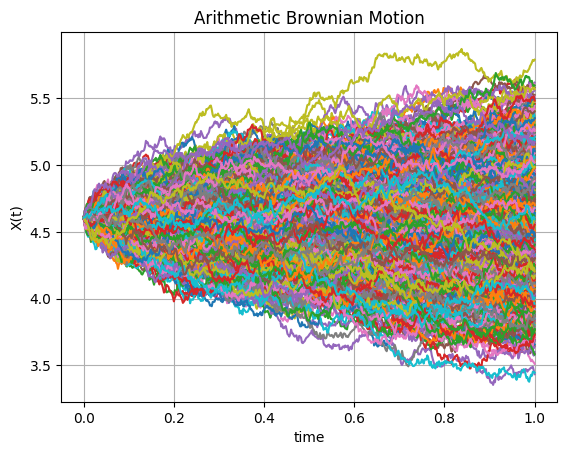

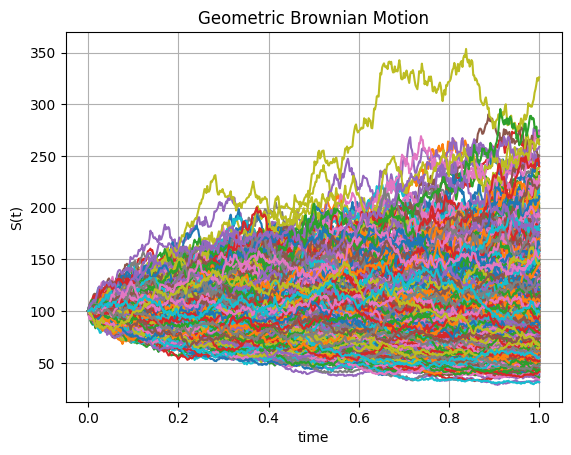

In [ ]:
NoOfPaths = 1000
NoOfSteps = 500
T = 1
r = 0.05
sigma = 0.4
S_0 = 100

Paths = Paths_ABMGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
timeGrid = Paths["time"]
X = Paths["X"]
S = Paths["S"]

plt.figure(1)
plt.plot(timeGrid, np.transpose(X))
plt.grid()
plt.title('Arithmetic Brownian Motion')
plt.xlabel("time")
plt.ylabel("X(t)")

plt.figure(2)
plt.plot(timeGrid, np.transpose(S))
plt.grid()
plt.title('Geometric Brownian Motion')
plt.xlabel("time")
plt.ylabel("S(t)")

## Martingales

A stochastic process $ X = [ X_t; t >0 ] $ is a martingale w.r.t. filtration $ ℱ_t $ if:

1. $ \mathbb{E}[|X_t|] < ∞  \ ∀t$
2. $ \mathbb{E}[X_t | ℱ_s] = X_s, \ t > s $

In [ ]:
NoOfPaths = 1000
NoOfSteps = 500

T = 1
r = 0.05
sigma = 0.4
S_0 = 100

# money market account
M = lambda r,t: np.exp(r*t)

Paths = Paths_ABMGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
timeGrid = Paths["time"]
X = Paths["X"]
S = Paths["S"]

## checking martingale property

# expected value of a GBM under the Q measure
ES = np.mean(S[:,-1])
print('Expected Value of stock process:' + str(ES))

# expected value of a discounted GBM under the Q measure
ESM = np.mean(S[:,-1]/M(r,T))
print('Expected Value of Discounted stock process:' + str(ESM))

Expected Value of stock process:104.89323680043157
Expected Value of Discounted stock process:99.77753327569164


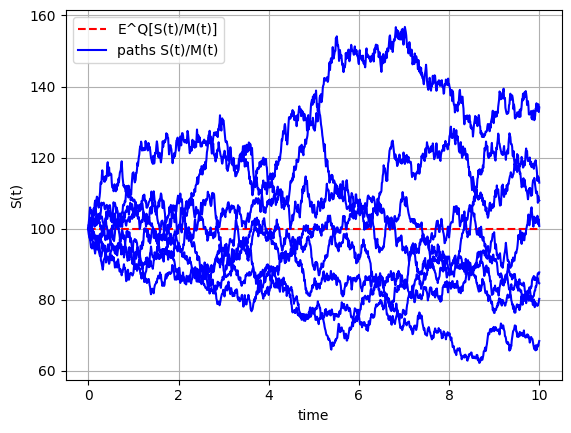

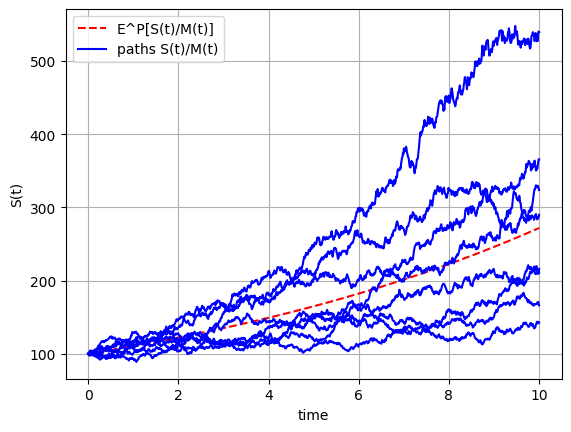

In [ ]:

NoOfPaths = 8
NoOfSteps = 1000
S_0 = 100
r = 0.05
mu = 0.15  # estimated by historical data
sigma = 0.1   # estimated by historical data
T = 10
# Money savings account
M = lambda t: np.exp(r * t)

# Monte Carlo Paths
pathsQ    = Paths_ABMGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
S_Q       = pathsQ["S"]
pathsP = Paths_ABMGBM(NoOfPaths,NoOfSteps,T,mu,sigma,S_0)
S_P = pathsP["S"]

time = pathsQ["time"]

# Discounted Stock paths
S_Qdisc = np.zeros([NoOfPaths,NoOfSteps+1])
S_Pdisc = np.zeros([NoOfPaths,NoOfSteps+1])
i = 0
for i, ti in enumerate(time):
    S_Qdisc[:, i] = S_Q[:,i]/M(ti)
    S_Pdisc[:, i] = S_P[:,i]/M(ti)

# S(T)/M(T) with Stock growing with rate r
plt.figure(1)
plt.grid()
plt.xlabel("time")
plt.ylabel("S(t)")
eSM_Q = lambda t: S_0 * np.exp(r *t) / M(t)
plt.plot(time,eSM_Q(time),'r--')
plt.plot(time, np.transpose(S_Qdisc),'blue')
plt.legend(['E^Q[S(t)/M(t)]','paths S(t)/M(t)'])
plt.show(block= True)

# S(T)/M(T) with Stock growing with rate mu
plt.figure(2)
plt.grid()
plt.xlabel("time")
plt.ylabel("S(t)")
eSM_P = lambda t: S_0 * np.exp(mu *t) / M(t)
plt.plot(time,eSM_P(time),'r--')
plt.plot(time, np.transpose(S_Pdisc),'blue')
plt.legend(['E^P[S(t)/M(t)]','paths S(t)/M(t)'])
plt.show(block = True)

# Black&Scholes Model

The Black-Scholes model has been probably the most important and influential continuous-time financial model.

In this model we have two assets:
1. The price of the stock follows a Geometric Brownian motion
2. a riskless bond with dynamics

$$
dM(t) = rM(t)dt
$$

In the Black&Scholes model asset prices are assumed to vary in a continuous
fashion, trading can take place continuously at every instant, without any friction such as transaction costs or bid-ask spreads.



## black scholes equation

Black and Scholes showed that the price of a call option in their model, when
seen as a two-variable function $ C(S, t) $ of the underlying price $ S $ and time $ t $,
must satisfy the partial differential equation:

$$
\frac{\partial C(S, t)}{\partial t} + rS \frac{\partial C(S, t)}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 C(S, t)}{\partial S^2} = rC(S, t)
$$



To uniquely determine the price of a call option, the equation must be coupled with a terminal condition specifying the final payoff. For a call option, this is given by:

$$
C(S, T) = \max(S_T - K, 0)
$$

where $ K $ is the strike price.

It is important to note that the Black-Scholes differential equation can price **any European derivative**, not just call options, by solving the equation with the appropriate terminal condition.


The starting step needed to derive the Black-Scholes equation is a continuously rebalanced portfolio consisting of:
- **One unit of the call option $ C $**.
- **A variable (negative) quantity of the underlying asset $ S $**.

The value of this portfolio at time $ t $ is:

$$
V_t = C(S_t, t) + \alpha S_t,
$$

where $ \alpha $ is the quantity of the underlying. Since $ S_t $ follows a geometric Brownian motion and $ C(S_t, t) $ is a function of $ S_t $, $ V_t $ also follows an Itô process.

Assuming $ C(S_t, t) $ is two times differentiable, applying Itô's Lemma gives:

$$
dV_t = \frac{\partial C}{\partial t} dt + \frac{\partial C}{\partial S} dS_t + \frac{1}{2} \frac{\partial^2 C}{\partial S^2} (dS_t)^2 + \alpha dS_t.
$$


Since $ S_t $ follows a geometric Brownian motion:

$$
dS_t = \mu S_t dt + \sigma S_t dB_t,
$$

where $ dW_t^2 = dt $, substituting into the above and simplifying gives:

$$
dV_t = \left( \frac{\partial C}{\partial t} + \frac{\partial C}{\partial S} \mu S_t + \frac{1}{2} \frac{\partial^2 C}{\partial S^2} \sigma^2 S_t^2 + \alpha \mu S_t \right) dt
+ \sigma S_t \left( \frac{\partial C}{\partial S} + \alpha \right) dW_t.
$$


Black-Scholes' idea is to make the portfolio **riskless** by choosing:

$
\alpha = -\frac{\partial C}{\partial S}.
$

Substituting $ \alpha $ into the expression for $ dV_t $, we get:

$$
dV_t = \left( \frac{\partial C}{\partial t} + \frac{1}{2} \frac{\partial^2 C}{\partial S^2} \sigma^2 S_t^2 \right) dt.
$$


Since the portfolio is riskless, its rate of return must equal the risk-free rate $ r $. Hence:

$$
dV_t = r V_t dt.
$$

Substituting $ V_t = C_t - S_t \frac{\partial C}{\partial S} $ and rearranging terms, we arrive at the **Black-Scholes differential equation**:

$$
\frac{\partial C}{\partial t} + r S \frac{\partial C}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 C}{\partial S^2} = r C.
$$

The Black-Scholes equation is fundamental in pricing any European derivative $ C(S, t) $. While different derivatives (calls, puts, spreads, etc.) satisfy this equation, they differ in their terminal conditions.


## black scholes formula


The particular solution of the Black&Scholes equation for an european call option, called the **Black-Scholes formula**, is:

$$
C(S, t) = S N(d_1) - K e^{-r(T - t)} N(d_2),
$$

where:

$$
d_1 = \frac{\ln(S/K) + \left( r + \frac{\sigma^2}{2} \right)(T - t)}{\sigma \sqrt{T - t}},
$$

$$
d_2 = d_1 - \sigma \sqrt{T - t} = \frac{\ln(S/K) + \left( r - \frac{\sigma^2}{2} \right)(T - t)}{\sigma \sqrt{T - t}}.
$$

Here:
- $ S $: Current price of the underlying asset
- $ K $: Strike price
- $ r $: Risk-free interest rate
- $ \sigma $: Volatility of the underlying asset
- $ T - t $: Time to maturity
- $ N(x) $: Cumulative distribution function of the standard normal distribution



put and call option Black&Scholes price

In [87]:
import numpy as np
import scipy.stats as st

def BS_Option_Price(CP, S_0, K, sigma, t, T, r, q):
    '''
    This function determines the Black-Scholes call and put option price.

    Parameters:
    - CP (str or int): a flag for Call price ('c' or 1) or Put price ('p' or 0).
    - S_0 (int or float): starting value of the underlying asset.
    - K (int or float): strike price.
    - sigma (int or float): volatility (annualized).
    - t (int or float): current time.
    - T (int or float): maturity.
    - r (int or float): interest rate (annualized).
    - q (int or float): dividend yield (annualized).

    Returns:
    - value (float): option price.
    '''

    K = np.array(K)
    tau = T - t
    d1 = (np.log(S_0 / K) + (r - q + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)

    # Call price
    if CP == "c" or CP == 1:
        value = st.norm.cdf(d1) * S_0 * np.exp(-q * tau) - st.norm.cdf(d2) * K * np.exp(-r * tau)
    # Put price
    elif CP == "p" or CP == 0:
        value = st.norm.cdf(-d2) * K * np.exp(-r * tau) - st.norm.cdf(-d1) * S_0 * np.exp(-q * tau)
    else:
        raise ValueError("Option type must be 'c' for call or 'p' for put.")

    return value



Cash or nothing Black&Scholes price

In [ ]:
def BS_Cash_Or_Nothing_Price(CP,S_0,K,sigma,tau,r):
    '''
    This function compute the price of a cash or nothing option according to
    Black-Scholes model.

    Parameters:
    - CP (str or int): a flag for Call price (c or 1) or Put price (p or -1);
    - S_0 (int or float): starting value of the underlying asset;
    - K (int or float): list of strike prices;
    - sigma (int or float): volatility (annualized);
    - tau (int or float): time to maturity (years);
    - r (int or float): interest rate (annualized);

    Returns:
    - value (float): option price.

    '''
    # sequence of strike prices
    K = np.array(K).reshape([len(K),1])

    # d1 and d2 according to Black&Scholes formula
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0))
    * tau) / float(sigma * np.sqrt(tau))
    d2    = d1 - sigma * np.sqrt(tau)

    # analytical formulas for cash or nothing options
    if str(CP).lower()=="c" or str(CP).lower()=="1":

        # C = K*e^[-r*(T-t)]*N(d2)
        value = K * np.exp(-r * tau) * st.norm.cdf(d2)

    if str(CP).lower()=="p" or str(CP).lower()=="-1":

        # P = K*e^[-r*(T-t)]*N(-d2) = K*e^[-r*(T-t)]*[1-N(d2)]
        value = K * np.exp(-r * tau) *(1.0 - st.norm.cdf(d2))

    return value

## Greeks

We perform a sensitivity analysis of a derivative price with respect to the various parameters upon which it depends. We consider the traditional case with Call ($C$) and Put ($P$) options. Some of these partial derivatives are denoted with greek letters, so they are collectively called “the greeks”.

**DELTA**

Delta is the first derivative of the price of a generic derivative w.r.t. the underlying asset. In the case of Black&Scholes Model, the Delta of an European Call is:

$$
\Delta_C = \frac{\partial C}{\partial S} = N(d_1) > 0
$$

where $N(d_1)$ is the cumulative distribution function of a standard normal random variable.

and from put-call parity:

$$
C - P = S - Ke^{r(T-t)}
$$

we get:

$$
\Delta_P = \frac{\partial P}{\partial S} = \frac{\partial}{\partial S} [C - S + Ke^{r(T-t)}] = N(d_1) - 1 = N(-d_1) < 0
$$

In [85]:
def BS_Delta(CP,S_0,K,sigma,t,T,r):

    '''
    This function computes the Delta of an european option.

    Parameters:
    - CP (str or int): a flag for Call price (c or 1) or Put price (p or -1).
    - S_0 (int or float): starting value of the underlying asset.
    - K (int or float): strike price.
    - sigma (int or float): volatility.
    - t (int or float): current time.
    - T (int or float): maturity (years).
    - r (int or float): interest rate.

    Returns:
    - value (float): Delta of the option.
    '''
    # when defining a time-grid it may happen that the last grid point
    # is slightly after the maturity
    if t-T>10e-20 and T-t<10e-7:
        t=T

    # time to maturity
    tau = T-t

    # d1 of a call option
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * \
             (tau)) / (sigma * np.sqrt(tau))

    if str(CP).lower()=="c" or str(CP).lower()=="1":


        # Delta of a call option
        value = st.norm.cdf(d1)

    if str(CP).lower()=="p" or str(CP).lower()=="-1":

        # Delta of a put option
        value = st.norm.cdf(d1)-1.0

    return value

In [ ]:
S_0_values = np.linspace(50, 150, 100)
K = 100
T = 1
t = 0
sigma = 0.2
r = 0.05

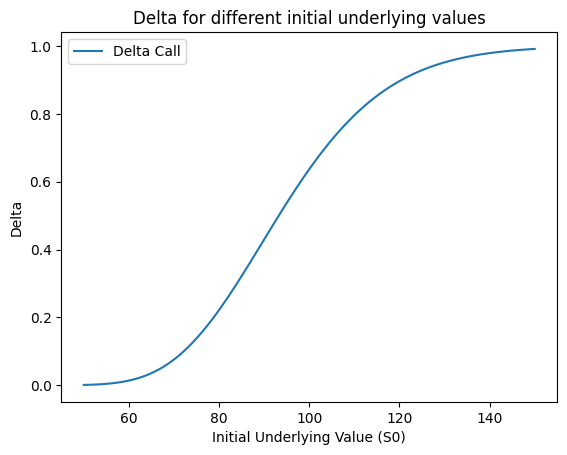

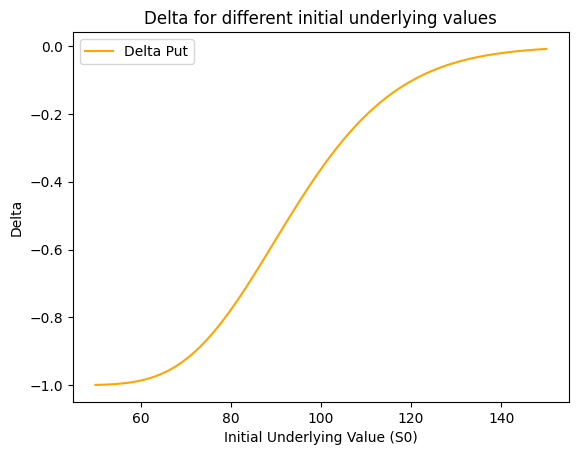

In [ ]:
from IPython.display import HTML

# Vectorize the function to handle array inputs
delta_call = np.vectorize(lambda s: BS_Delta('c', s, K, sigma, t, T, r))
delta_put = np.vectorize(lambda s: BS_Delta('p', s, K, sigma, t, T, r))

# Compute Delta values
results_call = delta_call(S_0_values)
results_puts = delta_put(S_0_values)


# Create two plots
fig1, ax1 = plt.subplots()
ax1.plot(S_0_values, results_call, label='Delta Call')
ax1.set_title('Delta for different initial underlying values')
ax1.set_xlabel('Initial Underlying Value (S0)')
ax1.set_ylabel('Delta')
ax1.legend()

fig2, ax2 = plt.subplots()
ax2.plot(S_0_values, results_puts, label='Delta Put', color='orange')
ax2.set_title('Delta for different initial underlying values')
ax2.set_xlabel('Initial Underlying Value (S0)')
ax2.set_ylabel('Delta')
ax2.legend()

# Display both plots side by side using HTML
plt.subplots_adjust()

# Show the plots
plt.show()

Delta is an increasing function of S for fixed values of $K, r, t \quad \text{and} \quad \sigma$.


The delta represents the variation in the call price for a very small variation
in the underlying price. It is a ratio of variations expressed in absolute
terms. Deep In the Money options have a $Δ$ equal to 1: their price behaves exactly as the price of the underlying. In this case, since exercise at maturity is virtually certain, each variation in the underlying
is reflected in an equal variation in the call price, so the ratio of the variations
is very close to 1.
An extremal case of this situation is when K = 0: clearly, a
call with null strike is the underlying itself, and the delta of the underlyins is exactly equal to 1. Conversely, deep Out Of the Money options have a $Δ$ equal to 0.

**Omega (or Lambda)**

In order to assess the riskiness of an option, $\Delta$ is not an appropriate measure. It is much more sensible to consider the **elasticity** (or leverage), which is defined as a ratio of percentage (infinitesimal) variations. Formally, we define:

$$
\Omega_C = \frac{\partial C / C}{\partial S / S} = \frac{\partial C}{\partial S} \cdot \frac{S}{C} = N(d_1) \cdot \frac{S}{C} > 0
$$

and

$$
\Omega_P = \frac{\partial P / P}{\partial S / S} = \frac{\partial P}{\partial S} \cdot \frac{S}{P} = [1-N(d_1)] \cdot \frac{S}{P} < 0
$$
The elasticity measures the percentage increment in the option’s price for a unitary (small) percentage increment in the underlying’s price. Contrary to the delta, the elasticity is larger for OTM call options, which are therefore considered more risky and volatile.

In [ ]:
def BS_Omega(CP, S_0, K, sigma, t, T, r):
    '''
    This function computes the Omega of a European option.

    Parameters:
    - S_0: starting value of the underlying asset.
    - K: strike price.
    - sigma: volatility.
    - t: current time.
    - T: maturity (years).
    - r: interest rate.
    - CP: 'c' for call option, 'p' for put option.

    Returns:
    - Omega: Omega of the option.
    '''
    # time to maturity
    tau = T - t

    # Calculate d1 and d2
    d1 = (np.log(S_0 / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)

    if CP.lower() == "c":  # Call option
        C = S_0 * st.norm.cdf(d1) - K * np.exp(-r * tau) * st.norm.cdf(d2)
        Omega = st.norm.cdf(d1) * (S_0 / C)

    elif CP.lower() == "p":  # Put option
        P = K * np.exp(-r * tau) * (1 - st.norm.cdf(d2)) - S_0 * (1 - st.norm.cdf(d1))
        Omega = (st.norm.cdf(d1) - 1) * (S_0 / P)

    return Omega

In [ ]:
# Initialize parameters
S_0_values = np.linspace(50, 150, 100)
K = 100
T = 1
t = 0
sigma = 0.2
r = 0.05
CP = 1

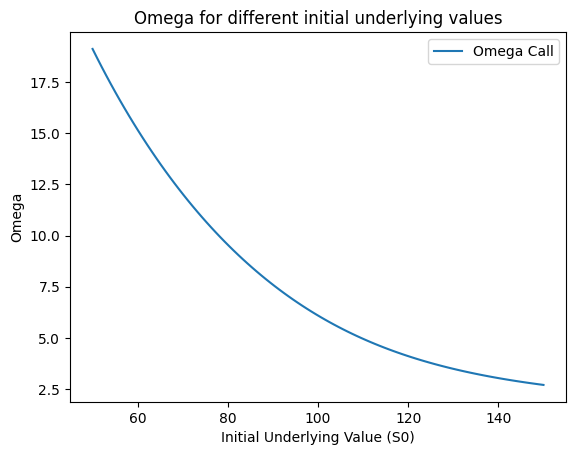

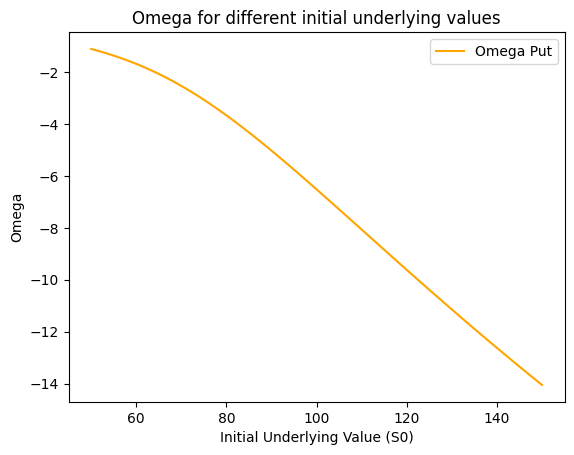

In [ ]:
from IPython.display import HTML

# Vectorize the function to handle array inputs
omega_call = np.vectorize(lambda s: BS_Omega('c', s, K, sigma, t, T, r))
omega_put = np.vectorize(lambda s: BS_Omega('p', s, K, sigma, t, T, r))

# Compute Omega values
results_call = omega_call(S_0_values)
results_puts = omega_put(S_0_values)


# Create two plots
fig1, ax1 = plt.subplots()
ax1.plot(S_0_values, results_call, label='Omega Call')
ax1.set_title('Omega for different initial underlying values')
ax1.set_xlabel('Initial Underlying Value (S0)')
ax1.set_ylabel('Omega')
ax1.legend()

fig2, ax2 = plt.subplots()
ax2.plot(S_0_values, results_puts, label='Omega Put', color='orange')
ax2.set_title('Omega for different initial underlying values')
ax2.set_xlabel('Initial Underlying Value (S0)')
ax2.set_ylabel('Omega')
ax2.legend()

# Display both plots side by side using HTML
plt.subplots_adjust(wspace=0.5)

# Show the plots
plt.show()

**Gamma**

Gamma is the sensitivity of Delta to the price of the underlying asset, or the second order derivative of the price w.r.t. the underlying.
An high gamma implies an high sensitivity of delta to price changes: frequent re-balancing is necessary to perform an effective delta hedging.

Gamma is equal for European Call and Puts:

$$
\Gamma = \frac{\partial \Delta}{\partial S} = \frac{\partial^2 V}{\partial S^2} = \frac{N'(d_1)}{S \sigma \sqrt{T - t}}
$$

or, equivalently:

$$
\Gamma = K e^{-r (T - t)}  \frac{f_{N(0,1)}(d_2)}{S \sqrt{T - t}}
$$

Since the underlying has a $Γ$ equals to zero, we cannot use it to perform Gamma-Hedging. we need to look at instruments with a non-linear payoff.



In [121]:
def BS_Gamma(S_0, K, sigma, t, T, r):
  '''
  This function computes the Gamma of an european option.

  Parameters:
  - S_0: starting value of the underlying asset.
  - K: strike price.
  - sigma: volatility.
  - t: current time.
  - T: maturity (years).
  - r: interest rate.

  Returns:
  - value: Gamma of the option.
  '''

  d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * \
            (T-t)) / (sigma * np.sqrt(T-t))

  return st.norm.pdf(d1) / (S_0 * sigma * np.sqrt(T-t))

In [ ]:
# Initialize parameters
S_0_values = np.linspace(50, 150, 100)
K = 100
T = 1
t = 0
sigma = 0.2
r = 0.05
CP = 1

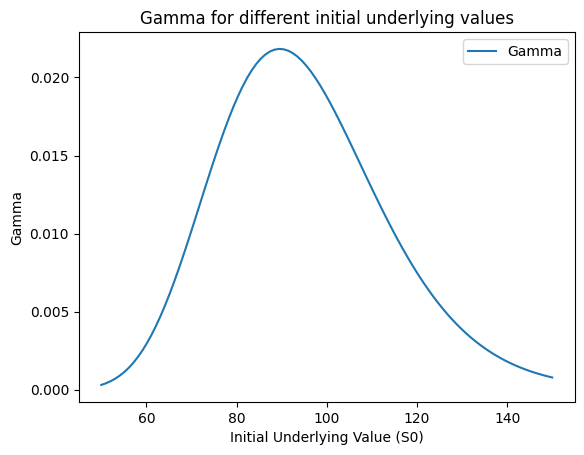

In [ ]:
# Vectorize the function to handle array inputs
gamma = np.vectorize(lambda s: BS_Gamma(s, K, sigma, t, T, r))

# Compute Omega values
results = gamma(S_0_values)


plt.plot(S_0_values, results, label='Gamma')
plt.title('Gamma for different initial underlying values')
plt.xlabel('Initial Underlying Value (S0)')
plt.ylabel('Gamma')
plt.legend()

It follows that $Γ > 0$ and hence the payoff of a Call or Put is convex. Moreover, the gamma is bigger for ATM options
and tends to 0 for $S → 0^+, S → +∞$

**Theta**

The theta of an option is defined as  
$$
\theta = \frac{\partial C}{\partial t},
$$  
and is the partial derivative of the price with respect to today's date $ t $.  
Options (in opposition to stocks) are "perishable goods", in the sense that the mere passage of time tends to lower their value, a phenomenon known as **time decay**, which corresponds to the fact that $ \theta $ is negative (at least for the main traditional derivative products).  

For the classic example of a call option in the Black&Scholes model:
$$
\theta = -Kre^{-r(T - t)}N(d_2) - \frac{\sigma S N'(d_1)}{2\sqrt{T - t}} < 0
$$

For what concerns the $\theta$ of a put option, we can make use of Put-Call parity:

$$
C-P = S - Ke^{r(T-t)} \\
\frac{\partial C}{\partial t}-\frac{\partial P}{\partial t} =  - Kre^{r(T-t)} \\
\frac{\partial P}{\partial t} = \frac{\partial C}{\partial t} + Kre^{r(T-t)} = Kre^{-r(T - t)}(1- N(d_2)) - \frac{\sigma S N'(d_1)}{2\sqrt{T - t}}
$$

**Relationship between delta, gamma, and theta**

The Black-Scholes equation

$$
\frac{\partial C}{\partial t} + rS \frac{\partial C}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 C}{\partial S^2} = rC
$$

can be expressed as a relationship between the Greeks. This can be rewritten as

$$
\theta + rS\Delta + \frac{1}{2} \sigma^2 S^2 \Gamma = rC
$$

This relationship is very important because it holds for a generic derivative, not only for a call option.


**Vega**

Vega is the sensitivity of the value of a derivative with respect to volatility. For European Call and Put option it is defined as:

$$
ν = \frac{\partial V}{\partial \sigma} = Ke^{-r(T - t_0)} f_{N(0,1)}(d_2) \sqrt{T - t_0}.
$$

an alternative expression is

$$
\nu = S f_{N(0,1)}(d1) \sqrt{T-t}
$$

Some details must be taken into account:
- Vega is the same for Call and Put options.
- an increase in volatility always increase the price of a call or put option
- Since under the Black-Scholes model the volatility parameter $\sigma$ is constant, we do not need to vega hedge! In reality, however, $\sigma$ would change.
- Hedging of delta is typically more frequent than hedging of vega (hedging with options is considered to be expensive).
- to hedge vega, one needs to either buy or sell an option, or a derivative which is dependent on volatility.




In [129]:
def BS_Vega(S_0,K,sigma,t,T,r):

    '''
    This function computes the Vega of Call/Put european option.

    parameters:
    - S_0: starting value of the underlying asset.
    - K: strike price.
    - sigma: volatility.
    - t: current time.
    - T: maturity.
    - r: interest rate.

    Returns:
    - value: Vega of the option.

    '''

    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * \
             (T-t)) / (sigma * np.sqrt(T-t))
    return S_0*st.norm.pdf(d1)*np.sqrt(T-t)

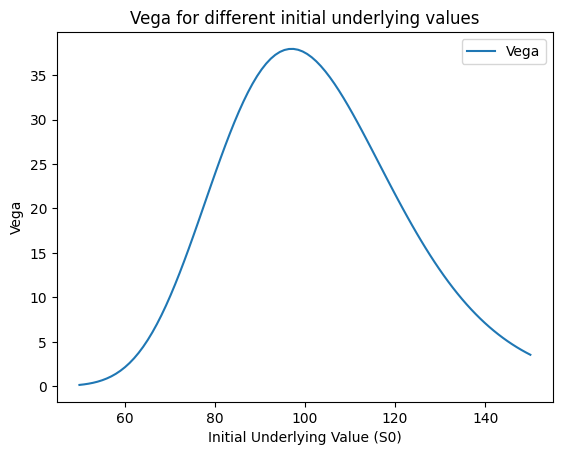

In [ ]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
S_0_values = np.linspace(50, 150, 100)
K = 100
T = 1
t = 0
sigma = 0.2
r = 0.05

# Vectorize the function to handle array inputs
vega = np.vectorize(lambda s: BS_Vega(s, K, sigma, t, T, r))

# Compute Omega values
results = vega(S_0_values)


plt.plot(S_0_values, results, label='Vega')
plt.title('Vega for different initial underlying values')
plt.xlabel('Initial Underlying Value (S0)')
plt.ylabel('Vega')
plt.legend()

In [ ]:
import numpy as np
from scipy.stats import norm

def compute_theta(S, K, r, T, t, sigma, CP):
    """
    Compute the theta of an option using the Black-Scholes model.

    Parameters:
    - S: Current stock price
    - K: Strike price
    - r: Risk-free rate
    - T: Maturity (end time)
    - t: Current time
    - sigma: Volatility
    - CP: 1 for call, -1 for put

    Returns:
    - theta:  theta of the option
    """

    # Compute d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * (T - t)) / (sigma * np.sqrt(T - t))
    d2 = d1 - sigma * np.sqrt(T - t)

    # Compute the components of theta
    N_d2 = norm.cdf(d2)        # CDF of d2
    N_prime_d1 = norm.pdf(d1)  # PDF of d1

    # Compute theta
    if CP == 1:
        theta = -K * np.exp(-r * (T - t)) * N_d2 - (sigma * S * N_prime_d1) / (2 * np.sqrt(T - t))
    elif CP == -1:
        theta = K * r * np.exp(-r * (T - t)) * (1 - N_d2) - (sigma * S * N_prime_d1) / (2 * np.sqrt(T - t))
    return theta


In [ ]:
# Example usage
S = 100       # Current stock price
K = 100       # Strike price
r = 0.05      # Risk-free rate
T = 1         # Time to maturity (in years)
t = 0         # Current time
sigma = 0.2   # Volatility
CP = 1        # Call

theta = compute_theta(S, K, r, T, t, sigma, CP)
print(f"Theta: {theta}")

Theta: -56.984885014545725


**Volga (or Vomma)**

$\sigma$ is the only costant parameter in the Black&Scholes model. This is a severe limitation that will be discussed in following sections.
A first improvement can be made by using a second order approximation of the black&scholes formula. To do that, we define Volga as the sensitivity of vega to volatility

$$
Volga = \frac{\partial^2 C}{\partial \sigma^2} = \frac{\partial^2 P}{\partial \sigma^2} = S f_{N(0,1)}(d_1)\sqrt{T-t}
$$

Assume that $\sigma$ has a certain distribution $F(\mu_{\sigma}, \eta)$. Let $BS(\sigma)$ the Black&Scholes formula as a function of sigma. The taylor expansion of $BS(\sigma)$ in the neighborhood of $mu_{\sigma} $ be

$$
BS(\sigma) ≈ BS(\mu_{\sigma}) + (\sigma - \mu_{\sigma}) \frac{\partial BS(\sigma)}{\partial \sigma} |_{\sigma = \mu_{\sigma}} + \frac{1}{2} (\sigma - \mu_{\sigma})^2 \frac{\partial^2 BS(\sigma)}{\partial \sigma^2} |_{\sigma = \mu_{\sigma}}
$$

for a given value of $\sigma$, such that $\mu_{\sigma}$ the distribution of the underlying asset is Log-normal and the Black&Scholes formula can be computed. With the second order approximation we have

$$
\mathbb{E}[BS(\sigma)] = BS_{price} + \frac{1}{2} (\sigma - \mu_{\sigma})^2 BS_{volga}
$$

This adjustment (usually called trader's adjusted formula) is a correction of the Black&Scholes price to take into account also volatility as a source of risk. The same formula still applies to Put options (same Volga).


**Vanna**

Vanna is the sensitivity of Delta to volatility. It is equal to the sensitivity of vega to the underlying asset, since partial cross derivatives are equal by Schwarz's theorem.

$$
Vanna = \frac{\partial^2 C}{\partial S \partial \sigma} = \frac{\partial \Delta}{\partial \sigma} = f_{N(0,1)}(d_1) \frac{d_2}{\sigma}
$$

 Vanna can be useful to monitor a delta or vega-hedged portfolio as vanna will help the trader to anticipate the effectiveness of the hedge as volatility changes.

**Rho**

The $ρ$ of an option measures the sensitivity with respect to the level of interest rates. From a financial point of view, an increase of $r$ has two effects:
- the discount factor becomes lower;
- the drift of the price under measure $\mathbb{Q}$ increases.

The net effect is still positive for a plain vanilla call option:
$$
\rho = \frac{\partial C}{\partial r} = K(T - t) \exp^{-r(T - t)} N(d_2) > 0
$$


**Charm**

Charm shows the sensitivity of Delta to time (delta decay). Charm is different for Calls and Puts, and it's value is highly influenced by the value of the of the underlying wrt the strike (OTM, ATM, ITM).

$$
Charm = \frac{\partial^2 C}{\partial S \partial t} = \frac{\partial \Delta}{\partial t}
$$

Charm can be useful to analyze how delta will be affected as time passes, especially when we want to evalute the effectivness of delta-hedge.

The accuracy of Charm deteriorates close to expiration, because it changes quickly and it cannot guarantee a good guess for delta behaviour.

**Color**

Color measures the rate of change of gamma over the passage of time (gamma-decay).

$$
\text{Color} = \frac{\partial \Gamma}{\partial \tau} = \frac{\partial^3 C}{\partial S^2 \, \partial \tau}
$$

As we have seen with Charm, Color can be an important sensitivity to monitor when maintaining a gamma-hedged portfolio as it can help the trader to anticipate the effectiveness of the hedge as time passes.

The use of color is fairly accurate when the number of days remaining until option expiration is large. When an option nears expiration, color itself may change quickly, rendering estimates of gamma change inaccurate.


**Derivative w.r.t. Strike K**

A key concept to derivative pricing is Risk-neutral density. This density can be estimated to compute prices without performing computationally intensive montecarlo simulations (when the payoff allow it). Breeden and Litzenberger (1978) laid the foundations for determining the risk-neutral distribution of the underlying asset at maturity $ S_T $ based on the observations of European options prices written on this underlying asset.

If we consider the classical case of Call Option

$$
C = e^{-rT}\int_K^∞ (S_T - K) f_{S_T}^\mathbb{Q}(s_T)ds_T
$$

$$
\frac{\partial C}{\partial K} = e^{-rT} \left\{
\frac{\partial}{\partial K} \int_K^{+\infty} S_T f_{S_T}^\mathbb{Q}(s_T) \, ds_T
- \frac{\partial}{\partial K} \left[ K \int_K^{+\infty} f_{S_T}^\mathbb{Q}(s_T) \, ds_T \right]
\right\}.
$$

Using Leibniz's rule for differentiation under the integral sign, we get:

$$
\frac{\partial C}{\partial K} = e^{-rT} \left\{ -K f_{S_T}^\mathbb{Q}(K) - \int_K^{+\infty} f_{S_T}^\mathbb{Q}(S_T) \, dS_T - K(-f_{S_T}^\mathbb{Q}(K)) \right\}.
$$

Simplifying further

$$
\frac{\partial C}{\partial K} = e^{-rT} \left\{ - \int_K^{+\infty} f_{S_T}^\mathbb{Q}(S_T) \, dS_T \right\}.
$$

Let $F_{S_T}^\mathbb{Q}(K)$ be the cumulative distribution function of the underlying asset under the risk-neutral measure. Then:

$$
\frac{\partial C}{\partial K} = e^{-rT} \left\{ F^\mathbb{Q}_{S_T}(K) -1 \right\}.
$$

From this, we obtain

$$
F^{\mathbb{Q}}_{S_T}(K) = 1 + e^{rT} \frac{\partial C}{\partial K}.
$$

And finally

$$
\frac{\partial F^{\mathbb{Q}}_{S_T}}{\partial K} = e^{rT} \frac{\partial^2 C}{\partial K^2} = f^\mathbb{Q}_{S_T}(s_T)
$$







### Greeks with Finite Differences

In the Black&scholes model, the greeks for a call option have a closed form solution. Anyway, closed form solutions are not always available: the payoff structure or the underlying stochastic model can make the analytical derivation not an easy task.



In these cases, several numerical methods are available to estimate price sensitivities. One of the most famous methods is Finite difference.


From basic calculus, we know that the first derivative of a function $f(x)$ at point $x_0$ coincides with the tangent slope of $f(x_0)$. If we are not able to derive the exact derivative but we know the image of $f$ at $x_0 - \delta$ and $x_0 + \delta$, we can approximate the solution. The approximation error will be identified via Taylor expansion.



$$
f(x_0 + \delta) = f(x_0) + f'(x_0)\delta + \frac{1}{2}f''(x_0) \delta^2 + \dots
$$

which gives (with a first-order approximation):

$$
f'(x_0) \approx \frac{f(x_0 + \delta) - f(x_0)}{\delta}
$$



$$
f(x_0 - \delta) = f(x_0) - f'(x_0)\delta + \frac{1}{2}f''(x_0) \delta^2 + \dots
$$

which gives:

$$
f'(x_0) \approx \frac{f(x_0) - f(x_0 - \delta)}{\delta}
$$


$$
f(x_0 + \delta) - f(x_0 - \delta) = f'(x_0)\delta + f'(x_0)\delta + \frac{1}{2}f''(x_0)\delta^2 - \frac{1}{2}f''(x_0)\delta^2 + \dots
$$

which gives:

$$
f'(x_0) \approx \frac{f(x_0 + \delta) - f(x_0 - \delta)}{2\delta}
$$


- In the **forward** and **backward** approximations, the error is in the order of $O(\delta)$.
- In the **central** approximation, the error is in the order of $O(\delta^2)$.



$$
f(x_0 + \delta) + f(x_0 - \delta) = 2f(x_0) + f''(x_0)\delta^2 - \frac{1}{4!}f^{(4)}(x_0)\delta^4 + \dots
$$

which gives:

$$
f''(x_0) = \frac{f(x_0 + \delta) - 2f(x_0) + f(x_0 - \delta)}{\delta^2}
$$



Delta first order approximation

In [15]:
S_0 = 100
K = 100
sigma = 0.1
t = 0
T = 2
r = 0.02
q = 0
CP = 1

eps = 0.0001

# exact solutions
Delta_exact = BS_Delta(CP,S_0,K,sigma,t,T,r)
C = BS_Option_Price(CP, S_0, K, sigma, t, T, r, q)

# forward approximation
C_forward = BS_Option_Price(CP, S_0 + eps, K, sigma, t, T, r, q)
Delta_forward = (C_forward - C) / eps

# backward approximation
C_backward = BS_Option_Price(CP, S_0 - eps, K, sigma, t, T, r, q)
Delta_backward = (C - C_backward) / eps

# central approximation
Delta_central = (C_forward - C_backward) / (eps*2)


error_forward = Delta_exact - Delta_forward
error_backward = Delta_exact - Delta_backward
error_central = Delta_exact - Delta_central

print(f"Error forward: {error_forward}")
print(f"Error backward: {error_backward}")
print(f"Error central: {error_central}")

Error forward: -1.324970710703255e-06
Error backward: 1.3250694765876148e-06
Error central: 4.938294217993189e-11


In [19]:
# gamma exact solution
gamma_exact = BS_Gamma(S_0, K, sigma, t, T, r)
Gamma_fin_diff = (C_forward - 2*C + C_backward) / (eps**2)

gamma_error = gamma_exact - Gamma_fin_diff

print(f"Gamma exact: {gamma_exact}")
print(f"Gamma finite differences: {Gamma_fin_diff}")
print(f"Error: {gamma_error}")

Gamma exact: 0.02650035323440286
Gamma finite differences: 0.026500401872908697
Error: -4.863850583750051e-08


### Greeks with Montecarlo

The calculation of the Greeks discussed previously relies on knowing the theoretical formula for the option price. For instance, calculating the delta only requires evaluating the call option at two fixed values of the underlying asset, $S_0$ and $S_0 \pm \varepsilon$.

If there is no closed-form formula for the option, we can still calculate the option Greeks using Monte Carlo simulations (More information about Montecarlo simulation can be found in its proper chapter). For example, to calculate the delta of a call option, the procedure is as follows:

1. Simulate $N$ points for the dynamics of the underlying asset at maturity $T$, starting from the value $S_0$, and calculate $N$ price scenarios based on the payoff  
$$
F = \max(S(T) - K, 0)
$$
Compute the Monte Carlo price of the option:  
$$
C_{MC}(S_0) = \frac{1}{N} \sum_{i=1}^N e^{-rT} F(S_i(T)).
$$

2. Simulate $N$ points for the dynamics of the underlying asset at maturity $T$, starting from a perturbed value $S_0^*$ (e.g., $S_0^* = S_0 + \varepsilon$), and calculate $N$ price scenarios:  
$$
C_{MC}(S_0^*) = \frac{1}{N} \sum_{i=1}^N e^{-rT} F(S_i^*(T)).
$$

3. The Greeks are then calculated using finite differences, i.e.,  
   $$
   \Delta \approx \frac{C_{MC}(S_0^*) - C_{MC}(S_0)}{\varepsilon}.
   $$

## Empirical findings about Black&Scholes model


From an empirical perspective, the Black-Scholes model shows deficiencies in its ability to accurately calibrate observed market prices. Let us first discuss the realism of the main assumptions on which the Black-Scholes model is based:

- Independence of log-returns  
- Normality of log-returns  
- $\sigma$ is non-stochastic and constant over time

### Indipendent Log-Returns

If we examine the autocorrelogram of log-returns, we typically do not observe significant serial autocorrelation. However, the autocorrelation function of the squares or absolute values of log-returns reveals significant autocorrelation at all lags.

This demonstrates that the independence (but not the lack of correlation) of log-returns is typically rejected. Specifically, large absolute changes are often followed by other large absolute changes, a phenomenon known as "volatility clustering".

The fact that $\sigma$ is not constant and, in certain situations, must be considered a random variable itself is evidenced by the existence of derivative instruments with volatility as the underlying asset, known as volatility swaps and variance swaps.

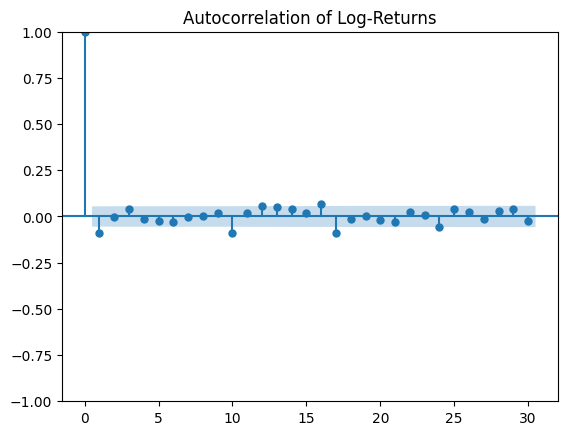

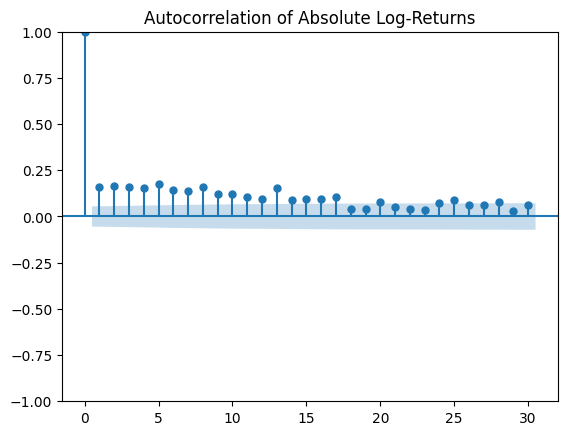

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    CPR   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2437.85
Distribution:                  Normal   AIC:                           4883.70
Method:            Maximum Likelihood   BIC:                           4904.30
                                        No. Observations:                 1272
Date:                Tue, Dec 10 2024   Df Residuals:                     1271
Time:                        15:56:21   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0429  4.279e-02      1.001      0.317 [-4.10

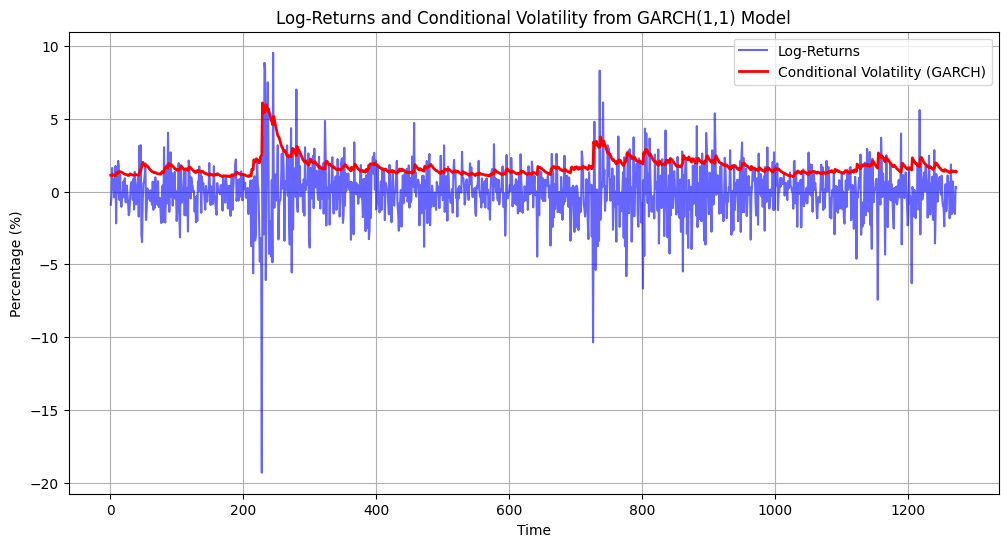

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf


data = pd.read_excel('Prezzi_Assignment1.xlsx')
prices = data['CPR']

log_returns = np.log(prices / prices.shift(1)).dropna()


plot_acf(log_returns, lags=30, title='Autocorrelation of Log-Returns', ax=plt.gca())



# Step 4: Optional - Autocorrelation of absolute log-returns
absolute_log_returns = np.abs(log_returns)
plot_acf(absolute_log_returns, lags=30, title='Autocorrelation of Absolute Log-Returns')
plt.show()

# GARCH modeling
!pip install arch
from arch import arch_model

# Fit a GARCH(1,1) model to the log-returns
# Multiply log-returns by 100 to express in percentage terms
garch_model = arch_model(log_returns * 100, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')
print(garch_result.summary())

# Plot log-returns and conditional volatility on the same graph
plt.figure(figsize=(12, 6))

# Plot log-returns
plt.plot(log_returns.index, log_returns * 100, label='Log-Returns', color='blue', alpha=0.6)

# Plot conditional volatility
plt.plot(garch_result.conditional_volatility.index, garch_result.conditional_volatility,
         label='Conditional Volatility (GARCH)', color='red', linewidth=2)

# Add titles and labels
plt.title("Log-Returns and Conditional Volatility from GARCH(1,1) Model")
plt.xlabel("Time")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(True)

plt.show()



### Normal Log-Returns

The Black-Scholes model is based on geometric Brownian motion, which in turn implies a lognormal distribution for the stock price at maturity $ S_T $, or equivalently, a normal distribution for the log return. Empirically, however, real-world data tend to exhibit "fat tails," meaning the probability of very high or very low log returns is significantly greater than predicted by the normal distribution.

More precisely, financial time series typically exhibit "Pareto tails" meaning:  
$$
\overline{F}(x) \sim c \cdot x^{-\alpha}, \quad \text{for } x \to +\infty,
$$
where $\overline{F}(x) = 1 - F(x) = P(X > x)$ is the survival function or "right tail" of the distribution function $ F $.


Another aspect of financial time series is the presence of Leptokurtosis (kurtosis larger than 3), which is based on the fourth central moment of the distribution.

We can try to capture the distribution properties of returns by changing the underlying assumption of normally distributed returns.
A basic example is given by the Variance-Gamma distribution. The V.G. $Y$ is a **Normal Variance Mean Mixture** where the mixing variable $ V $ follows a Gamma distribution.

$$
Y := \mu_0 + \mu V + \sigma \sqrt{V} Z
$$
with $ \mu_0, \mu \in \mathbb{R} $, $ \sigma \in [0, +\infty) $, $ Z \sim N(0, 1) $, and $ V \sim \Gamma(\alpha, \beta) $, where $ V $ is independent of $ Z $.


The corresponding density is given by:
$$
f_Y(y) = \int_0^{\infty} \frac{1}{\sigma \sqrt{2 \pi v}} \exp\left(-\frac{(y - \mu_0 - \mu)^2}{2 \sigma^2 v}\right) \frac{\beta^\alpha v^{\alpha - 1} \exp(-\beta v)}{\Gamma(\alpha)} \, dv
$$



## Implied volatility and B&S



*Implied Volatility*: "the wrong number in the wrong formula to get the right price." — *Rebonato (1999)*

We have qualitatively discussed to what extent the assumptions of the Black-Scholes model are satisfied by the series of log-returns. Now let us see to what extent Black-Scholes prices corresponds to the actual market prices of options. Let us define a fundamental concept: given an option with a market price $P$, the implied volatility $\sigma_{imp} $ of the option is the volatility for which the Black-Scholes formula would re-produce market price. If the Black-Scholes model were correct, the implied volatility should coincide with the volatility of the geometric Brownian motion, and therefore, in particular, it should not depend on either the strike price or the time to maturity.


In mathematical terms, it can be written as follows:

$$
V_c(t, S) = \text{BS}(\sigma, r, T, K, S_0)
$$

where:
- $V_c$: Option price,
- $\text{BS}$: Black-Scholes formula,
- $\sigma$: Volatility,
- $r$: Risk-free interest rate,
- $T$: Time to maturity,
- $K$: Strike price,
- $S_0$: Initial stock price.

Since the Black-Scholes formula is monotonically increasing in $\sigma$, higher volatility corresponds to higher option prices.

Assuming the existence of an inverse function $g_\sigma(\cdot) = \text{BS}^{-1}(\cdot)$, we can express the implied volatility, $\sigma_{\text{impl}}$, as:

$$
\sigma_{\text{impl}} = g_\sigma(V_c^{\text{mkt}}, r, T, K, S_0)
$$

By computing the implied volatility for traded options with different strikes and maturities, we can test the Black-Scholes model’s accuracy against market data.



Initial parameters and market quotes

In [38]:

V_market = 2  # market call option price
K = 120  # strike
tau = 1 # time-to-maturity
r = 0.05 # interest rate
q = 0
t = 0
T = 1
S_0 = 100  # today's stock price
sigmaInit = 0.25  # Initial implied volatility
CP  ="c" #C is call and P is put


## Numerical Methods for Solving Implied Volatility

To find implied volatility, we must solve for the volatility ($\sigma_{\text{impl}}$) that, when input into the Black-Scholes (BS) pricing function, results in a price that matches the observed market price of the option. Since the BS function does not have a closed-form inverse for volatility, we use numerical methods to solve this equation:

$$
\text{BS}(\sigma_{\text{impl}}, r, T, K, S_0) - V_c^{\text{mkt}} = 0 \tag{1}
$$

Here:
- $\sigma_{\text{impl}}$: Implied volatility to be solved for.
- $V_c^{\text{mkt}}$: Observed market price of the option.

There are several techniques to solve this equation. Two of the most popular methods are:

1. **Newton-Raphson Method**: An iterative method that requires the derivative of the function. It is fast but may converge only if the initial guess is close to the actual solution.

2. **Bisection Method**: A simple and robust method that repeatedly bisects an interval and selects a subinterval where the function changes sign. While the bisection method is slower than Newton-Raphson or Brent’s method, it guarantees convergence as long as the solution lies within the specified interval and the function is continuous. This method is useful when a reliable, straightforward solution is preferred over speed.
   

3. **Brent's Method**: Combines bisection, secant, and inverse quadratic interpolation methods. It is robust and does not require a derivative, making it highly efficient and commonly used in practice.




### Newton's Method

Newton's Method is an iterative approach to finding the root of a function. Starting with an initial guess, the method approximates the function by its tangent line, then computes the x-intercept of this tangent line. This x-intercept often provides a better estimate for the root of the function than the initial guess, allowing the process to be iterated for increasingly accurate solutions.

**Illustration of Newton's Method**

Newton's Method can be visualized as follows:

1. Start with an initial point, $x_n$, which is an approximation to the root of $f(x)$.
2. Draw the tangent to $f(x)$ at $x = x_n$, which intersects the x-axis at $x_{n+1}$.
3. Use $x_{n+1}$ as the next approximation.

The slope of the tangent line to $f(x)$ at $x = x_n$ is given by:

$$
f'(x_n) = \frac{f(x_n)}{x_n - x_{n+1}}
$$

Solving for $x_{n+1}$ yields the Newton-Raphson update formula:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$


in the Black-Scholes (BS) model, we iteratively solve for the volatility, given market data and the observed market option price.

The iterative formula used here is:

$$
σ_{n+1} = σ_n - \frac{BS(σ_n, \cdot) - V_{\text{mkt}}}{\frac{\partial BS(σ_n, \cdot)}{\partial σ_n}}
$$

where:
- $ BS(σ_n, \cdot) $ is the Black-Scholes price given the current estimate of volatility $ σ_n $.
- $ V_{\text{mkt}} $ is the market option price.
- $ \frac{\partial BS(σ_n, \cdot)}{\partial σ_n} $ is the derivative of the Black-Scholes formula with respect to $ σ_n $, also known as the vega of the option.


In [39]:
def dV_dsigma(S_0, K, sigma, t, T, r, q):
    tau = T - t
    d2 = (np.log(S_0 / K) + (r - q - 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    value = K * np.exp(-r * tau) * st.norm.pdf(d2) * np.sqrt(tau)
    return value


In [145]:

def ImpliedVolatility_NR(CP,S_0,K,sigma,t,T,r,q, V_market):
    '''

    This function estimate the implied volatility for a given option,
    using the Newton-Raphson method

    Parameters:
    - CP (str or int): a flag for Call price (c or 1) or Put price (p or -1).
    - S_0 (float): starting value of the underlying asset.
    - K (float): strike price.
    - sigma (float): starting value of volatility (annualized).
    - tau (float): time to maturity (years).
    - r (float): interest rate (annualized).
    - V_market (float): market option price.

    Returns:
    - sigma_imp (float): implied volatility.

    '''

    error    = 1e10; # initial error

    # compute theoretical price and vega
    optPrice = lambda sigma: BS_Option_Price(CP,S_0,K,sigma,t,T,r,q)
    vega= lambda sigma: dV_dsigma(S_0,K,sigma,t,T,r,q)

    # While the difference between the model and the market price is large
    # follow the iteration
    n = 1.0
    while error > 1e-10:
        g = optPrice(sigma) - V_market
        g_prim = vega(sigma)

        if abs(g_prim) < 1e-10:  # Safeguard against division by zero
            raise ValueError("Vega is too small, Newton-Raphson method failed to converge.")

        sigma_new = sigma - g / g_prim
        error = abs(g)
        sigma = sigma_new

        print(f'Iteration {n}, Error: {error:.10f}')
        n += 1
    return sigma

In [41]:
sigma_imp = ImpliedVolatility_NR(CP, S_0, K, sigmaInit, 0, tau, r, q, V_market)
message = '''Implied volatility for CallPrice= {}, strike K={},
      maturity T= {}, interest rate r= {} and initial stock S_0={}
      equals to sigma_imp = {:.7f}'''.format(V_market,K,tau,r,S_0,sigma_imp)

print(message)

Iteration 1.0, Error: 3.0254134818
Iteration 2.0, Error: 0.1913499857
Iteration 3.0, Error: 0.0022254541
Iteration 4.0, Error: 0.0000003353
Iteration 5.0, Error: 0.0000000000
Implied volatility for CallPrice= 2, strike K=120,
      maturity T= 1, interest rate r= 0.05 and initial stock S_0=100
      equals to sigma_imp = 0.1614827


In [42]:
# Check theoretical price consistency
val = BS_Option_Price(CP, S_0, K, sigma_imp, t, T, r, q)
print('Option Price for implied volatility of {0} is equal to {1}'.format(sigma_imp, val))

Option Price for implied volatility of 0.1614827288413938 is equal to 2.0


### Bisection

The theoretical background is very simple: if a function $ f $ is continuous on a closed and bounded interval $[a, b]$ such that $ f(a) \times f(b) < 0 $, then there exists $ x^* \in (a, b) $ such that $ f(x^*) = 0 $.

We can use this theorem to find the root of function $f$ (which is eq. 1 in our case).

Once $ a $ and $ b $ are determined such that $ f(a) \times f(b) < 0 $, we can evaluate $ f $ at the midpoint $ m = \frac{a + b}{2} $. The sign of $ f(m) $ will match either the sign of $ f(a) $ or the sign of $ f(b) $. This implies that one of the intervals $[a, m]$ or $[m, b]$ must contain $ x^* $ (at least one solution).

By repeating this process, we can construct an arbitrarily small interval that contains $ x^* $ (we must set a tolerance level, which is defined as the distance from the "true" point $ x^* $).

Algorithm:
1. find $a$ and $b$ such that $f(a) f(b) > 0$
2. define $ m := \frac{a+b}{2} $:
  - if m = 0 we found the root $x^*$.
  - else:
    - if $f(a)f(m) <0 → b:= m$
    - else: $ a := m$
3. compute $ b-a $:
  - if $ b - a < \epsilon → x^* := m $
  - else: come back to 2.

The bisection method is less sensible to initial guesses of implied volatility, but it is usually less computationally efficient than NR.



In [44]:
def ImpliedVolatility_BIS(CP, S_0, K, r, q, t, T, a, b, price, tol=1e-6, maxiter=100):

    '''
    This function estimate the implied volatility for a given option,
    using the Bisection method.

    Parameters:
    - CP: flag for call or put
    - S_0: initial price of the underlying
    - K: strike price
    - r: risk free rate
    - q: dividend yield
    - t: current time
    - T: maturity
    - a: lower bound implied vol
    - b: upper bound implied vol
    - price: market price
    - tol: tolerance
    - maxiter: maximum number of iterations

    Returns:
    - sigma_imp: implied volatility

    '''

    lo = price - BS_Option_Price(CP, S_0, K, a, t, T, r, q)
    hi = price - BS_Option_Price(CP, S_0, K, b, t, T, r, q)

    if lo * hi > 0:
        return print('a and b bounds are not appropriate: root not included in the interval')

    for _ in range(maxiter):
        m = (a + b) / 2
        mid = price - BS_Option_Price(CP, S_0, K, m, t, T, r, q)

        if abs(mid) < tol:
            return m
        elif mid > 0:
            a = m
        else:
            b = m

    return m

In [45]:
import numpy as np
import scipy.stats as st

# Example parameters
S_0 = 100             # Current stock price
K = np.array([90, 100, 110])  # Array of strike prices
r = 0.05             # Risk-free rate
q = 0.01             # Dividend yield
t = 0                # current time
T = 1.0              # maturity
a = 0.00001             # Initial guess for the lower bound of volatility
b = 2.0              # Initial guess for the upper bound of volatility
price_C = np.array([15, 5, 3])  # Observed market prices for call options
price_P = np.array([3, 5, 8])   # Observed market prices for put options
tol = 1e-6           # Tolerance for the root-finding algorithm
maxiter = 100        # Maximum number of iterations
CP = "c"             # Flag for call options
CP_1 = "p"           # Flag for put options

ivC = np.zeros(len(K))
ivP = np.zeros(len(K))

# Calculate implied volatilities
for i in range(len(K)):
    ivC[i] = ImpliedVolatility_BIS(CP, S_0, K[i], r, q, t, T, a, b, price_C[i], tol=1e-6, maxiter=100)
    ivP[i] = ImpliedVolatility_BIS(CP_1, S_0, K[i], r, q, t, T, a, b, price_P[i], tol=1e-6, maxiter=100)


# Print results
print("Implied volatilities for call options:", ivC)
print("Implied volatilities for put options:", ivP)




Implied volatilities for call options: [0.16618012 0.06750125 0.13184772]
Implied volatilities for put options: [0.21723506 0.17493606 0.11464096]


The empirical evidence of volatility smile does not fit to the Black-Scholes model. A model that is consistent with market price is needed.
Different solutions have been studied in the literature. The main ones are:
- 1) local volatility;
- 2) stochastic volatility;
- 3) jumps.
All these extensions try to better fit market data, and incorporate smile effects.

## Binomial Model

In finance, binomial models are a numerical method that can be generalized (e.g., to the Black-Scholes formula) for option valuation.

The binomial model, also known as the CRR model (Cox, Ross, Rubinstein), was introduced in 1979 and employs a discrete representation of the underlying asset's price over time to price the derivative instrument.

The valuation process is iterative, starting from the final nodes of the tree and working backward to the first node (the valuation date).

The option pricing process using this method involves three steps:
1. **Generation of the tree** for the underlying asset's price.
2. **Calculation of the option's value** at each final node.
3. **Progressive calculation of the option's value** at each preceding node; the value at the first node corresponds to the option's price.


At each step (intermediate time), it is assumed that the underlying asset can either increase (up scenario) or decrease (down scenario) in value, using two multiplicative factors, $u$ (up) and $d$ (down), which satisfy the condition $0 < d < 1 + r < u$, where $r$ is the risk-free rate.


In the standard approach, the up ($u$) and down ($d$) factors are calculated using the volatility ($\sigma$) and the length of the time interval ($\Delta t$), measured in years (based on the day-count convention of the underlying asset). These factors are defined as:

$$
u = e^{\sigma \sqrt{\Delta t}}, \quad d = \frac{1}{u} = e^{-\sigma \sqrt{\Delta t}}.
$$

Given the option’s maturity ($T$) and the number of intermediate steps ($N$) used to "observe" the underlying asset, the time interval is $\Delta t = \frac{T}{N}$.

When $u * d = 1$ the tree is recombinant and it allow us to compute directly the price at a given time t and a given number of k "ups" in the process:

$$
S(t) = S_0 u^k d^{n-k}
$$

where $n$ is the number of time steps between 0 and t.

Under the assumption of risk neutrality, the (fair) price of a derivative is equal to the expected value of its payoff, discounted at the risk-free rate.

The expected value is computed using the option's values at the two subsequent nodes, weighted by their respective probabilities of occurrence. This expected value is then discounted at the risk-free rate $ r $, which corresponds to the option's maturity (e.g., the zero-rate bootstrapped from the FRA or SWAP curve of the relevant currency).

For instance, in a single-period binomial model, the option's price is given by:

$$
f_0 = e^{-r \Delta t} \left( q f_u + (1 - q) f_d \right),
$$

where:

$$
q = \frac{e^{r \Delta t} - d}{u - d}.
$$

Here, $ q $ represents the risk-neutral probability, $ f_u $ and $ f_d $ are the option values in the up and down states, $ u $ and $ d $ are the up and down factors, and $ \Delta t $ is the time interval.

As $N$ becomes very large, this discrete model converges toward the continuous-time models like those used in the Black-Scholes framework.

In [46]:
import numpy as np
import scipy.stats as st



S0 = 100
K = 100
T = 1
r = 0.01
sigma = 0.1
Nsteps = 100
dt = T / Nsteps


u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
q = (np.exp(r * dt) - d) / (u - d)

# Create the tree
Tree = np.zeros((Nsteps + 1, Nsteps + 1))

# Terminal nodes
for i in range(Nsteps + 1):
    Tree[i, Nsteps] = max(S0 * (u**i) * (d**(Nsteps - i)) - K, 0)

# Backward induction
for j in range(Nsteps - 1, -1, -1):
    for i in range(j + 1):
        Tree[i, j] = np.exp(-r * dt) * (q * Tree[i, j + 1] + (1 - q) * Tree[i + 1, j + 1])

# Price of the option
Prezzo = Tree[0, 0]

# Output
print("Call Price (K = 100):", Prezzo)

Call Price (K = 100): 3.938203123733054


# Risk Neutral Distribution

The underlying assumption of the result of Breeden and Litzenberger is the smoothness of $C$ w.r.t. $K$. Some questions must be analyzed:
1. in the market we observe only a limited amount of strikes.
2. Calls' liquidity influence the quality of estimated distribution.
3. an interpolation function must be choosen (there are different alternatives)
4. Market prices are not necessarily consistent with theoretical formulas, and for very small strikes, the prices could violate the no-arbitrage conditions. This could lead to negative values for $ f^Q(S_T) $, and thus we encounter difficulties in constructing a "good" risk-neutral distribution.

No arbitrage conditions

1. Merton boundaries
  
  $$
  C(K) >= max[Se^{-qT} - Ke^{-rT}; 0] \\
  P(K) >= max[Ke^{-rT} - Se^{-qT}; 0] \\
  $$

2. Monotonicity

  $$
  C(K) > C(K+1) \\
  P(K+1) > P(K)
  $$

  $$
  C(K) - C(K+1) >= e^{-rT}[ (K+1) - K]
  P(K+1) - P(K) >= e^{-rT}[ K - (K+1)]
  $$

To estimate the risk neutral distribution, we can start by using prices of traded options (different strikes, same underlying, same maturity).
Note that the Put-Call parity

$$
C(K) - P(K) = -e^{-rT}K + S_0e^{-qT}
$$

constitutes a linear relationship in $K$, with an intercept $S_0e^{-qT}$ and a slope $-e^{-rT}$. A linear regression on the points $(K, C - P)$ provides an estimate of $e^{-rT}$ and $e^{-qT}$, and consequently the implied rates $r$ and $q$.  


By inserting $\hat{q}$ and $\hat{r}$ into the Black-Scholes formula, we obtain the implied volatilities $\hat{\sigma}_{\text{impl}}$ for different $K$. Subsequently, we define:  

$$
V = \hat{\sigma}_{\text{impl}} \sqrt{T}.
$$  

A quadratic interpolation of the points $(K, V)$ is performed, generating a parabolic volatility curve:  

$$
V(K) = A_0 + A_1K + A_2K^2.
$$  

Once the coefficients $\hat{A}_0$, $\hat{A}_1$, $\hat{A}_2$ are estimated from the quadratic regression using only the implied volatilities for the quoted strikes $K$, the remaining points of the volatility curve can then be derived.

With a continous curve of implied volatilities we can create a continous function of call prices. Finally we can apply Breeden and Litzenberger's result to estimate risk neutral density.

## Risk Neutral Distribution with Finite Differences

We need an approximation method to compute derivatives of C(K) function. A classic method is Finite Differences (with central point approximation):


$$
f_Q^S(T, K) \approx e^{rT} \frac{C(K - \delta) - 2C(K) + C(K + \delta)}{\delta^2}.
$$  

The accuracy of this approximation depends on $\delta$, which in our case corresponds to the distance between two consecutive quoted strike prices.  

Implied risk-free rate: 0.06802047616887048, Implied dividend yield: 0.049795300735659576
[[6.65000000e+01 6.54604110e+01 3.12500000e-01 6.54601725e+01]
 [4.60000000e+01 4.56856313e+01 8.75000000e-01 4.56859597e+01]
 [3.30000000e+01 3.08719710e+01 2.00000000e+00 3.08686528e+01]
 [2.77500000e+01 2.59264873e+01 2.62500000e+00 2.59544961e+01]
 [2.01250000e+01 1.63020999e+01 4.25000000e+00 1.63251261e+01]
 [1.35000000e+01 7.91110876e+00 7.12500000e+00 7.82722485e+00]
 [9.62500000e+00 4.30836954e+00 8.75000000e+00 4.43732850e+00]
 [7.25000000e+00 2.10029041e+00 1.10000000e+01 2.10000887e+00]
 [5.37500000e+00 8.70460538e-01 1.37500000e+01 7.81281861e-01]
 [3.37500000e+00 2.19516793e-01 1.70000000e+01 2.17606637e-01]
 [1.87500000e+00 3.07652878e-02 1.97500000e+01 7.63344610e-03]
 [2.50000000e-01 6.47946607e-06 3.40000000e+01 1.78071626e-04]]
Fitted coefficients: A0=1.0797220806359182, A1=-0.004841461023805166, A2=5.694123360830333e-06


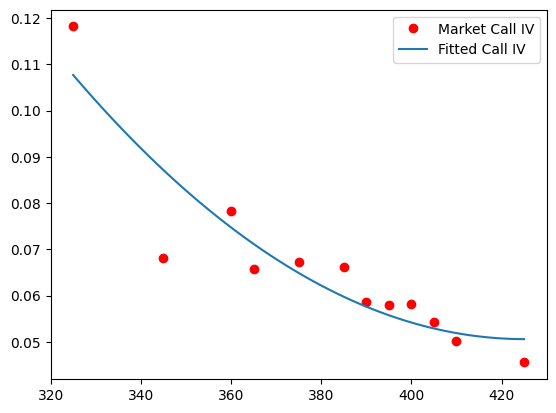

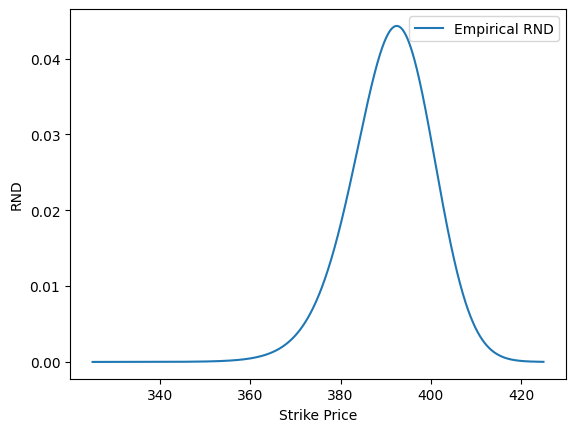

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.api import OLS, add_constant
from scipy.optimize import brentq
import scipy.stats as st

# Data
K = np.array([325, 345, 360, 365, 375, 385, 390, 395, 400, 405, 410, 425])
C = np.array([66.5, 46, 33, 27.75, 20.125, 13.5, 9.625, 7.25, 5.375, 3.375, 1.875, 0.25])
P = np.array([0.3125, 0.875, 2, 2.625, 4.25, 7.125, 8.75, 11, 13.75, 17, 19.75, 34])
T = 60 / 360
S_0 = 390.02
CP = 'c'
CP_P = 'p'

# Regression to get implied dividend yield and risk-free rate
X = add_constant(K)
model = OLS(C - P, X).fit()
intercept, slope = model.params

r = max(-np.log(-slope) / T, 0)
q = max(np.log(S_0 / intercept) / T, 0)
print(f"Implied risk-free rate: {r}, Implied dividend yield: {q}")



ivC = np.zeros(len(K))
ivP = np.zeros(len(K))

# Specify parameters for bisection algorithm
a = 0.01          # valore inferiore di partenza per sigma
b = 1             # valore superiore
maxiter = 1000000     # numero massimo di iterazioni
tol = 0.0000001        # valore di approssimazionen tollerato

# Find implied volatilities
for i in range(len(K)):
    ivC[i] = ImpliedVolatility_BIS(CP, S_0, K[i], r, q, 0, T, a, b, C[i], tol, maxiter)
    ivP[i] = ImpliedVolatility_BIS(CP_P, S_0, K[i], r, q, 0, T, a, b, P[i], tol, maxiter)

# Total implied volatility
IVC = np.array(ivC) * np.sqrt(T)
IVP = np.array(ivP) * np.sqrt(T)

# Check IV recovery of market prices

C2 = np.zeros(len(K))
P2 = np.zeros(len(K))
for i in range(len(K)):
    C2[i] = BS_Option_Price(CP, S_0, K[i], IVC[i], 0, T, r, q)
    P2[i] = BS_Option_Price(CP, S_0, K[i], IVP[i], 0, T, r, q)
print(np.column_stack([C, C2, P, P2]))

# Fit a quadratic function to the implied vols
X = np.column_stack([K, K ** 2])
X = add_constant(X)
model = OLS(IVC, X).fit()
A0, A1, A2 = model.params
print(f"Fitted coefficients: A0={A0}, A1={A1}, A2={A2}")

# Fitted IV for market and continuum of strikes
IVhat = A0 + A1 * K + A2 * K ** 2
Kc = np.arange(K[0], K[-1] + 1, 1)
IVc = A0 + A1 * Kc + A2 * Kc ** 2

# Plot market IV and fitted IV
plt.plot(K, IVC, 'ro', label='Market Call IV')
plt.plot(Kc, IVc, label='Fitted Call IV')
plt.legend()
plt.show()

# Construct the empirical (truncated) RND
dK = 0.01
K2 = np.arange(min(K), max(K) + dK, dK)
BS_Option_Price(CP, S_0, K[i], IVC[i], 0, T, r, q)
Call = [BS_Option_Price(CP, S_0, k, A0 + A1 * k + A2 * k ** 2, 0, T, r, q) for k in K2]

# First and second derivatives
dcdk = np.diff(Call) / dK
RND = np.diff(dcdk) / dK

# Plot empirical RND
plt.plot(K2[:-2], RND, label='Empirical RND')
plt.legend()
plt.xlabel('Strike Price')
plt.ylabel('RND')
plt.show()


Once we have estimated the risk-neutral distribution of the underlying asset price at maturity, we can determine the price of every non path-dependent derivative.
If the payoff is path-dependent, we still need to simulate paths.


# Jump processes

The presence of jumps has been observed in the market, especially in
times of financial turmoil, like in 1987, 2000 or 2008.
Jump-diffusion models and Levy based models are useful extensions of the Black&Sholes model since they explain the jump patterns exhibited by some stocks.  
Jump models are superior to the Black-Scholes model in terms of accuracy in the underlying dynamic of stocks: jump processes model daily log-returns according to empirical evidence, where returns' densities shows heavier tails and higher peaks compared to the normal distribution and, for longer time periods, jump processes approach normality, which is consistent with empirical studies.
With additional parameters we can control kurtosis and asymmetry of the
log-return density and fit the smile in the implied volatility.
It is important to emphatize that Jump models are realistic when pricing options close to maturity time.


## dynamics of the stock price under the risk-neutral measure $Q$

The process is often presented in the literature as the standard jump diffusion model:

$$
\frac{dS(t)}{S(t)} = \left( r - \xi_p \mathbb{E}[e^J - 1] \right) \, dt + \sigma \, dW^Q(t) + (e^J - 1) \, dX^Q_P(t)
$$

where:

- \\( S(t) \\): Stock price at time \\( t \\);
- \\( r \\): Risk-free rate;
- \\( \sigma \\): Volatility of the stock;
- \\( W^Q(t) \\): A Wiener process under the risk-neutral measure \\( Q \\);
- \\( X^Q_P(t) \\): A Poisson process under the risk-neutral measure \\( Q \\);
- \\( \xi_p \\): the intensity of poisson process, which models the frequency of jumps;
- \\( J \\): The jump size, which is a normal random variable ~ $ N(μ_j,σ_j) $;
- \\( \xi_p \mathbb{E}[e^J - 1] \\): The drift correction term, ensuring the process is a martingale.




The standard jump diffusion model is directly connected to the following return $ dX(t) $ dynamics:

$$
dX(t) = \left( r - \xi_p \mathbb{E} \left( e^J - 1 \right) - \frac{1}{2} \sigma^2 \right) dt + \sigma dW^Q(t) + J dX^Q_P(t).
$$



In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
def Jump_processes(NoOfPaths,NoOfSteps,S0, T,xiP,muJ,sigmaJ,r,sigma):

    '''
    This function simulate different paths of a standard jump process.

    Parameters:
    - NoOfPaths (int): number of paths to simulate.
    - NoOfSteps (int): number of time steps.
    - S0 (float): initial value of the underlying asset.
    - T (float): maturity.
    - xiP (float): jump intensity.
    - muJ (float): mean of the jump size distribution.
    - sigmaJ (float): standard deviation of the jump size distribution.

    Returns:
    - paths (dict): dictionary containing the simulated paths of the underlying asset.

    '''

    # Create empty matrices
    # Poisson process
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    # compensated Poisson process
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    # time periods
    time = np.zeros([NoOfSteps+1])
    # time steps
    dt = T / float(NoOfSteps)

    # starting value of processes (returns and stock value)
    X[:,0] = np.log(S0)
    S[:,0] = S0

    # Expectation E(e^J) for J~N(muJ,sigmaJ^2) --> needed for compensator
    EeJ = np.exp(muJ + 0.5*sigmaJ*sigmaJ)

    # generate random increments
    # wiener process (standard diffusion term)
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    # poisson process
    ZPois = np.random.poisson(xiP*dt,[NoOfPaths,NoOfSteps])
    # jump magnitutes
    J = np.random.normal(muJ,sigmaJ,[NoOfPaths,NoOfSteps])

    # simulation of returns under risk-neutral measure
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        X[:,i+1]  = X[:,i] + (r - xiP*(EeJ-1) - 0.5*sigma*sigma)*dt +sigma*np.sqrt(dt)* Z[:,i]\
                    + J[:,i] * ZPois[:,i]
        time[i+1] = time[i] +dt

    # simulation of stock prices
    S = np.exp(X)

    paths = {"time":time,"X":X,"S":S}
    return paths




Text(0, 0.5, 'S(t)')

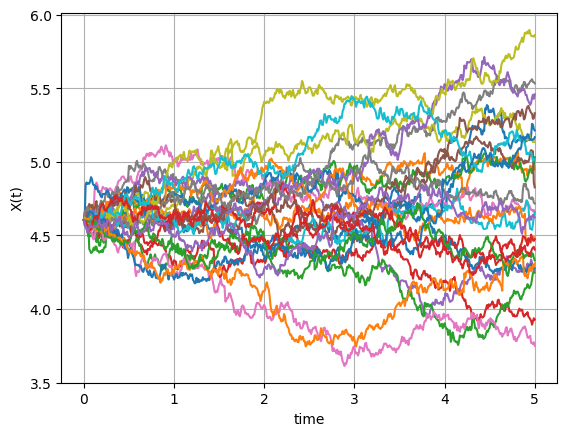

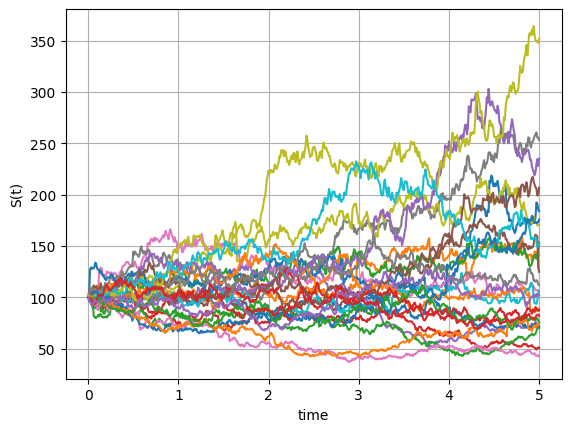

In [ ]:
NoOfPaths = 25
NoOfSteps = 500
T = 5
xiP = 1
muJ = 0
sigmaJ = 0.1
sigma = 0.2

S0 =100
r=0.05
Paths = Jump_processes(NoOfPaths,NoOfSteps,S0, T,xiP,muJ,sigmaJ,r,sigma)
timeGrid = Paths["time"]
X = Paths["X"]
S = Paths["S"]

plt.figure(1)
plt.plot(timeGrid, np.transpose(X))
plt.grid()
plt.xlabel("time")
plt.ylabel("X(t)")

plt.figure(2)
plt.plot(timeGrid, np.transpose(S))
plt.grid()
plt.xlabel("time")
plt.ylabel("S(t)")

A shortcoming of jump models is the difficulty of calibration: it is difficult to asses the effect of the new parameters $ \xi_p $, $ \mu_j $ and $ \sigma_j$ (respectively: intensity of the poisson process, mean of jump size, volatility of jumps).

to give a little intuition on the effect of parameters on implied volatility:
1) high $ \xi_p $ increase implied volatility on the overall curve of strikes;
2) negative $ \mu_j $ determine an higher volatility for lower strikes while positive mean for jump size determine high implied volatility for higher strikes in the curve;
3) high $ σ_j $ increase the volatility smile and vice-versa.

# Stochastic volatility

Modelling volatility as a random variable is confirmed by practical
data that indicate the variable and unpredictable nature of volatility.
(Hull and White, Stein and Stein, Heston, Schobel and Zhu).

Return distributions under stochastic volatility models also typically
exhibit fatter tails than their log-normal counterparts, but the most
significant argument to consider the volatility to be random is the
implied volatility smile/skew, which can be accurately recovered by
stochastic volatility models, especially for medium to long time to
maturity options.


Until now we considered $\sigma$ as a constant, under the B&S framework. We can make an improvement by modeling volatility as a random variable itself. The first simple example is a model where volatility parameter is described by a Bernoulli random variable:

$$
\sigma =
\begin{cases}
\sigma_1 & P(\sigma = \sigma_1) =  p, \\
\sigma_2 & P(\sigma = \sigma_2) =  1-p.
\end{cases}
$$

Under the assumption of log-normal distribution for both levels of volatility, the distribution of the underlying asset is a mixture of lognormals. The call price can be represented as:

$$
C_{mix} = e^{-r(T-t)} \mathbb{E}^\mathbb{Q} [max(S_T - K;0)]
        = e^{-r(T-t)} [ p \mathbb{E}^\mathbb{Q} [max(S_T - K;0) | \sigma = \sigma_1] + (1 - p) \mathbb{E}^\mathbb{Q} [max(S_T - K;0) | \sigma = \sigma_2]]
        = e^{-r(T-t)} [ p C_{\sigma_1}^{BS} + (1 - p) C_{\sigma_2}^{BS}]
$$




In [15]:
def mixlogn_BS_price(CP, S_0, K, t, T, r, q, p, sigma1, sigma2):

    '''
    This function compute the price of a Call/put european option on an
    underlying asset which distribution is a mixture of two lognormals.
    (volatility parameter has two states)

    Parameters:
    - CP: flag for call (1 or 'call') or put (-1 or 'put') option.
    - S (float): current price of the underlying asset.
    - K (float): strike price of the option.
    - T (float): time to maturity of the option.
    - r (float): risk free return
    - q (float): dividend yield
    - p (float): probability of sigma = sigma_1
    - sigma1 (float): volatility of the underlying asset when sigma = sigma_1
    - sigma2 (float): volatility of the underlying asset when sigma = sigma_2

    Returns:
    - mixlogn_bs_price (float): price of the option.
    '''

    comp1 = BS_Option_Price(CP, S_0, K, sigma1, t, T, r, q)
    comp2 = BS_Option_Price(CP, S_0, K, sigma2, t, T, r, q)

    return p * comp1 + (1 - p) * comp2


The construction of the risk-neutral distribution of the underlying at maturity $ S_T $ depends on the parameters $ \sigma_1 $, $ \sigma_2 $, and $ p $, which can be derived from observed (quoted and/or interpolated) call option prices.


The minimization problem:

$$
\min_{\sigma_1, \sigma_2, p} \sum_{i=1}^n \big(C^{\text{obs}}(K_i) - C^{\text{mixLogN}}(K_i)\big)^2
$$

where

$$
C^{\text{mixLogN}}(K_i) = p C^{\text{BS}}(K_i, \sigma_1) + (1 - p) C^{\text{BS}}(K_i, \sigma_2)
$$


In [51]:
def errormlogn(params, price_obs, S_0, K, t, T, r, q, CP):

    '''
    This function computes the error between option market prices and B&S price,
    where the distribution of the underlying asset is a mixture of lognormals
    (sigma is a bernoulli random variable).

    '''
    sigma1, sigma2, p = params
    theoretical_prices = np.array([mixlogn_BS_price(CP,S_0, k, t, T, r, q, p, sigma1, sigma2) for k in K])
    return np.sum((theoretical_prices - price_obs) ** 2)


Calibrated parameters:
Sigma1: 0.0542
Sigma2: 0.0484
p: 0.9519
Optimization was successful.


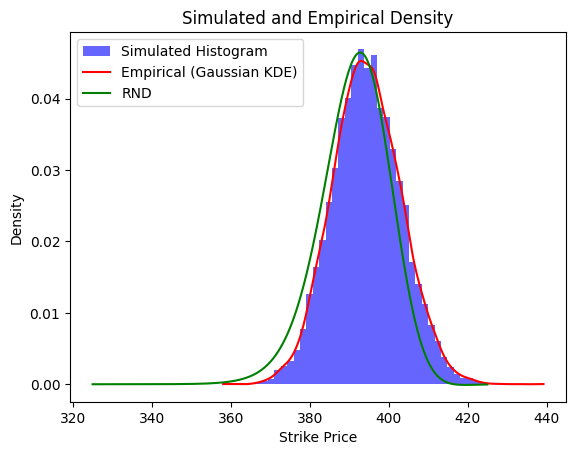

In [59]:
import numpy as np
import scipy.stats as st
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.io import loadmat
import matplotlib.pyplot as plt



# Load data
Call = loadmat('Call.mat')['Call'].flatten()  # Option prices
K = loadmat('K2.mat')['K2'].flatten()        # Strike prices
RND = loadmat('RND.mat')['RND'].flatten()    # Risk-neutral densities

# parameters
S_0 = 390  # Current underlying price
t = 0      # Current time
T = 60/360     # Maturity (1 year)
r = 0.068   # Risk-free rate
q = 0.049   # Dividend yield
CP = 1     # Call option



# Initial guesses for parameters
initial_params = [0.05,    0.03,    0.95]  # Initial guesses for sigma1, sigma2, and p
bounds = [(0, 1), (0, 1), (0, 1)]  # Bounds for sigma1, sigma2, and p

# Optimization
result = minimize(
    errormlogn,
    initial_params,
    args=(Call, S_0, K, t, T, r, q, CP),
    bounds=bounds,
    method='L-BFGS-B'
)

# Extract calibrated parameters
sigma1_calibrated, sigma2_calibrated, p_calibrated = result.x
print("Calibrated parameters:")
print(f"Sigma1: {sigma1_calibrated:.4f}")
print(f"Sigma2: {sigma2_calibrated:.4f}")
print(f"p: {p_calibrated:.4f}")

# Check if optimization was successful
if result.success:
    print("Optimization was successful.")
else:
    print("Optimization failed:", result.message)



# Parameters
nsim = 10000

# Step 1: Generate Bernoulli random variable
Bernoulli = np.random.binomial(n=1, p=p_calibrated, size=nsim)

# Step 2: Simulate the underlying at maturity
S = np.zeros(nsim)
for i in range(nsim):
    if Bernoulli[i] == 1:
        sig = sigma1_calibrated
    else:
        sig = sigma2_calibrated
    mu = np.log(S_0) + (r - 0.5 * sig**2) * (T - t)
    sigma = sig * np.sqrt(T - t)
    S[i] = st.lognorm(s=sigma, scale=np.exp(mu)).rvs()

# Plot histogram of simulated values
plt.hist(S, bins=50, alpha=0.6, color='blue', density=True, label='Simulated Histogram')

# Step 3: Kernel density estimation
density = st.gaussian_kde(S)
x_vals = np.linspace(min(S), max(S), 1000)
plt.plot(x_vals, density(x_vals), color='red', label='Empirical (Gaussian KDE)')

# Example empirical RND data
K2 = np.linspace(80, 120, 9100)  # Example strike price range
#RND = np.sin(np.linspace(0, np.pi, 9100))  # Replace with actual empirical RND data
plt.plot(K[1:-1], RND, color='green', label='RND')

# Add labels, legend, and show plot
plt.xlabel('Strike Price')
plt.ylabel('Density')
plt.legend()
plt.title('Simulated and Empirical Density')
plt.show()




## The Heston Model

The Heston model consists of two stochastic differential equations for the underlying asset price, $ S(t) $, and the variance process, $ v(t) $, described under the risk-neutral measure $ Q $ by:

$$
dS(t) = r S(t) \, dt + \sqrt{v(t)} S(t) \, dW_x (t)
$$

$$
dv(t) = \kappa (\bar{v} - v(t)) \, dt + \gamma \sqrt{v(t)} \, dW_v (t)
$$

where $ dW_v (t),  dW_x (t) $ are correlated standard Brownian motions: $$ dW_v (t) dW_x (t) = \rho_{x,v} \, dt $$.
  
Parameters:
- $ \bar{v} \geq 0 $: long run variance;
- $ \kappa \geq 0 $: the speed of mean reversion. It is the rate at which $v(t)$ reverts to $ \bar{v} $;
- $ \gamma > 0 $: volatility of volatility;
- $ r $: the risk freerate of return;





the variance $ v(t) $ has a non-central chi-squared distribution. In particular, $v(t)$ is distributed as

$$
v(t) \sim \bar{c}(t)\chi^2(d, \bar{\lambda}(t))
$$

where
 - $ \bar{c}(t) $ is a constant;
 - $ \chi^2(d, \bar{\lambda}(t)) $ is a non-central chi-squared random variable with $ d $ degrees of freedom and noncentrality parameter $\bar{\lambda}(t) $.

In detail:

$$
\bar{c}(t) = \frac{1}{4 \kappa} \gamma^2 (1 - e^{-\kappa t})
$$

$$
\bar{d} = \frac{4 \kappa \bar{v}}{\gamma^2}
$$

$$
\bar{\lambda}(t) = \frac{4 \kappa v_0 e^{-\kappa t}}{\gamma^2 (1 - e^{-\kappa t})}
$$


A chi-square distribution is basically a sum of squared indipendent normal random variables. Let $ (X_1, X_2, \dots, X_i, \dots, X_d) $ be $ d $ independent, normally distributed random variables with means $ \mu_i $ and variances $ \sigma_i^2 $. Then the random variable

$$
\sum_{i=1}^d \left( \frac{X_i}{\sigma_i} \right)^2
$$

is distributed according to the noncentral chi-squared distribution. It has two parameters: $ d $, which specifies the number of degrees of freedom (i.e., the number of $ X_i $), and a noncentrality parameter $ \bar{\lambda}(t) $, which is related to the means of the random variables $ X_i $ by:

$$
\bar{\lambda}(t) = \sum_{i=1}^d \left( \frac{\mu_i}{\sigma_i} \right)^2
$$

The square-root process for the variance precludes non-positive values for $ v(t). This property is satisfied by the **Feller condition**

$$
2 \kappa \bar{v} \geq \gamma^2
$$

which guarantees that $ v(t) $ stays positive; otherwise, if the Feller condition is not satisfied, the variance process may reach zero.


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [61]:
def GeneratePathsCorrelatedBM(NoOfPaths,NoOfSteps,T,rho):

    '''
    This function simulate different paths of a correlated Brownian Motions.

    Parameters:
    - NoOfPaths (int): number of paths to simulate.
    - NoOfSteps (int): number of time steps.
    - T (float): time to maturity.
    - rho (float): correlation coefficient.

    Returns:
    - paths (dict): dictionary containing the simulated paths of the underlying asset.

    '''

    # Generate a grid of observations from standard normal random variables
    Z1 = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    Z2 = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])

    # initialize matrices for correlated brownian motions
    W1 = np.zeros([NoOfPaths, NoOfSteps+1])
    W2 = np.zeros([NoOfPaths, NoOfSteps+1])

    # time increments
    dt = T / float(NoOfSteps)

    # times
    time = np.zeros([NoOfSteps+1])

    for i in range(0,NoOfSteps):
        # standardize samples to accurately generate increments from normal
        # random variables and improve convergence.
        if NoOfPaths > 1:
            Z1[:,i] = (Z1[:,i] - np.mean(Z1[:,i])) / np.std(Z1[:,i])
            Z2[:,i] = (Z2[:,i] - np.mean(Z2[:,i])) / np.std(Z2[:,i])

        # Correlate noises
        Z2[:,i]= rho * Z1[:,i] + np.sqrt(1.0 - rho**2) * Z2[:,i]

        # correlated brownian motions
        W1[:,i+1] = W1[:,i] + np.power(dt, 0.5)*Z1[:,i]
        W2[:,i+1] = W2[:,i] + np.power(dt, 0.5)*Z2[:,i]

        time[i+1] = time[i] +dt

    #Store the results
    paths = {"time":time,"W1":W1,"W2":W2}
    return paths

Text(0, 0.5, 'W(t)')

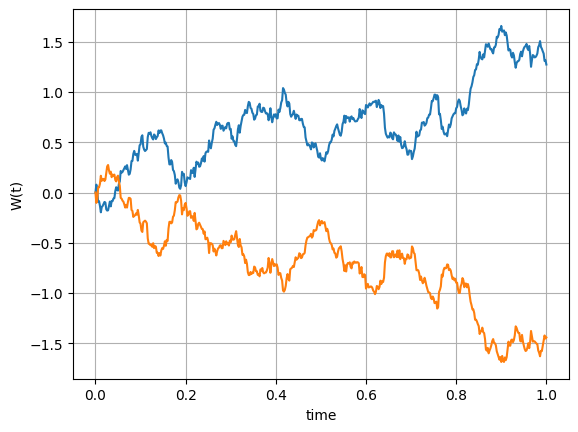

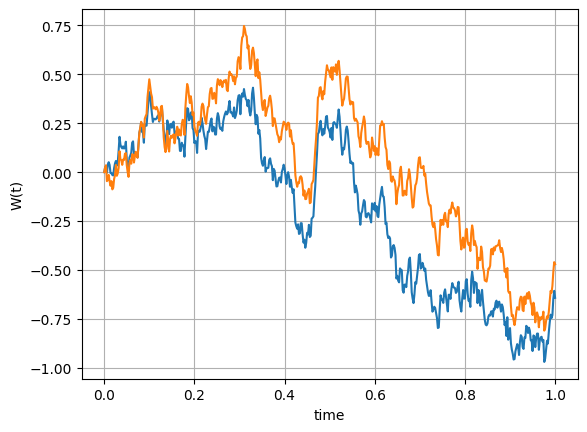

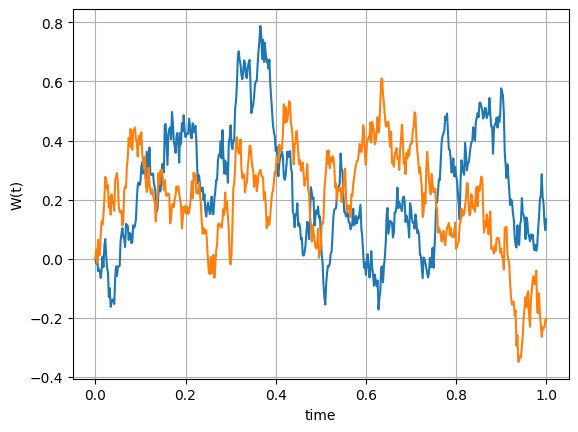

In [62]:
NoOfPaths = 1
NoOfSteps = 500
T = 1.0

############### Negative correlation ######################
rho =-0.9
Paths = GeneratePathsCorrelatedBM(NoOfPaths,NoOfSteps,T,rho)
timeGrid = Paths["time"]
W1 = Paths["W1"]
W2 = Paths["W2"]

plt.figure(1)
plt.plot(timeGrid, np.transpose(W1))
plt.plot(timeGrid, np.transpose(W2))
plt.grid()
plt.xlabel("time")
plt.ylabel("W(t)")

############### Positive correlation ######################
rho =0.9
Paths = GeneratePathsCorrelatedBM(NoOfPaths,NoOfSteps,T,rho)
timeGrid = Paths["time"]
W1 = Paths["W1"]
W2 = Paths["W2"]

plt.figure(2)
plt.plot(timeGrid, np.transpose(W1))
plt.plot(timeGrid, np.transpose(W2))
plt.grid()
plt.xlabel("time")
plt.ylabel("W(t)")

############### Zero correlation ######################
rho =0.0
Paths = GeneratePathsCorrelatedBM(NoOfPaths,NoOfSteps,T,rho)
timeGrid = Paths["time"]
W1 = Paths["W1"]
W2 = Paths["W2"]

plt.figure(3)
plt.plot(timeGrid, np.transpose(W1))
plt.plot(timeGrid, np.transpose(W2))
plt.grid()
plt.xlabel("time")
plt.ylabel("W(t)")


# Characteristic function




## Fourier Transform and Inversion



The characteristic function $ \varphi(u) $ of a random variable $ X $ with probability density function $ f(x) $ is defined as:

$$
\varphi(u) = \mathbb{E}\left[e^{i u X}\right] = \int_{-\infty}^{+\infty} e^{i u x} f(x) \, dx
$$

where $ u \in \mathbb{R} $.

Assuming that $ \varphi(u) $ is in $ L^1 $, the original probability density function can be recovered from its Fourier transform by inversion:

$$
f(x) = \frac{1}{2\pi} \int_{-\infty}^{+\infty} e^{-iux} \varphi(u) \, du.
$$

**Lemma (Inversion Lemma)**

This useful lemma help us in symplifing the computation of density via characteristic function. Let $ \varphi(u) $ be a characteristic function and $ f(x) $ a probability density function of some continuous variable $ X $. Then we have:

$$
f(x) = \frac{1}{\pi} ℜ \left( \int_0^{\infty} e^{-iux} \varphi(u) \, du \right)
\tag{1}
$$


we are in a continuous framework: a discretization of domain both in the x and u dimensions are needed. Suppose that we discretize the domain for $x$, and $u$ into $N$ grid points, then we consider the vectors $f$ and $\phi \in \mathbb{C}^N$:

$$
f =
\begin{pmatrix}
f_1 \\
f_2 \\
\vdots \\
f_{N-1} \\
f_N
\end{pmatrix}
, \quad
\phi =
\begin{pmatrix}
\phi_1 \\
\phi_2 \\
\vdots \\
\phi_{N-1} \\
\phi_N
\end{pmatrix}
\tag{2}
$$


We then apply the discretization to the integral in Eq. (1) and then apply trapezoidal integration over $ [0, u_{max}]$.

Consider the following representation:

$$
\int_{0}^{\infty} e^{-iux} \phi(u) \, du =: \int_{0}^{\infty} \gamma(u) \, du.
$$

We define a Trapezoidal integration over the domain $[0, u_{\text{max}}]$, for which we have:

$$
\int_{0}^{u_{\text{max}}} \gamma(u) \, du \approx \left[\frac{\gamma(u_1)+\gamma(u_2)}{2}\Delta u + \frac{\gamma(u_2)+\gamma(u_3)}{2}\Delta u + ... \frac{\gamma(u_{N-1})+\gamma(u_N)}{2}\Delta u \right] \\ = \frac{\Delta u}{2} \left[ \gamma(u_1) + 2 \sum_{n=2}^{N-1} \gamma(u_n) + \gamma(u_N) \right] = \Delta u \left[ \sum_{n=2}^{N-1} \gamma(u_n) + \frac{1}{2} \left( \gamma(u_1) + \gamma(u_N) \right) \right].
$$





If we set

$$
u_{\text{max}} = N \Delta u,
$$

$$
u_n = (n - 1) \Delta u,
$$

$$
x_k = -b + \Delta x \, (k - 1),
$$

where
- $k = 1, \dots, N$ is the grid in the $x$-domain;
-  b is a tuning parameter which can be freely chosen (typically a low quantile of distribution $ P[X < b] = ϵ $);

We have:

$$
\int_0^{u_{\text{max}}} \gamma(u) \, du \approx \Delta u \left( \sum_{n=1}^{N} e^{-i[(n-1)\Delta u][-b+\Delta x (k-1)]} \phi(u_n) - \frac{1}{2} \left[ e^{-ixu_1} \phi(u_1) + e^{ixu_N} \phi(u_N) \right] \right),
$$

rearranging some terms:

$$
\int_0^{u_{\text{max}}} \gamma(u) \, du \approx \Delta u \left( \sum_{n=1}^{N} e^{-i \Delta x \Delta u (n-1)(k-1)} e^{i(n-1)b\Delta u} \phi(u_n) - \frac{1}{2} \left[ e^{-ixu_1} \phi(u_1) + e^{ixu_N} \phi(u_N) \right] \right).
$$


consider the following framework:
- n roots of unity in the complex plain: $ z^n = 1$
- n subsequent points in the unit cirle that form an angle of $ h\frac{2π}{n}$ with $ h = 1, ..., n $
- the complex number $\omega = e^{i\frac{2\pi}{n}}$

Then, the $k-th$ root of unity can be idenfied as $\omega_k = e^{i\frac{2\pi}{n}*h}$

If we set  $\Delta x \Delta u = \frac{2\pi}{N}$, we obtain

$$
\int_0^{u_{\text{max}}} \gamma(u) \, du \approx \Delta u \left[ \sum_{n=1}^N e^{-i \frac{2 \pi}{N} (n-1)(k-1)} e^{i (n-1) b \Delta u} \phi(u_n) - \frac{1}{2} \left( e^{-i x u_1} \phi(u_1) + e^{i x u_N} \phi(u_N) \right) \right].
$$

Since $u_n = (n - 1) \Delta u$, we further have:

$$
\int_0^{u_{\text{max}}} \gamma(u) \, du \approx \Delta u
\left[
\underbrace{\sum_{n=1}^N e^{-i \frac{2 \pi}{N} (n-1)(k-1)} e^{i b u_n} \phi(u_n)}_{\text{FFT}}
- \frac{1}{2} \left( e^{-i x u_1} \phi(u_1) + e^{i x u_N} \phi(u_N) \right)
\right].
$$




So finally we obtain:
$$
f(x) = \frac{1}{\pi} \Re \left( \int_{0}^{\infty} e^{-iux}\phi(u)du \right)
\approx \frac{\Delta u}{\pi} \Re \left( \sum_{n=1}^{N} e^{-i\frac{2\pi}{N}(n-1)(k-1)} e^{ibun}\phi(un) - \frac{1}{2}(\gamma_1 + \gamma_2) \right).
$$

where $\gamma_1 = e^{-ixu_1}\phi(u_1)$, and $\gamma_2 = e^{ixu_N}\phi(u_N)$.

If we iterated this process for all $x_k$ with $k= 1, ... , N $ we can create a discretized representation of $f(x)$. To approximate a continous version of density, typically an interpolation between grid points of $x_k$ is considered.


This is a matrix multiplication, which requires about $N^2$ (complex)
multiplications and $N^2$ (complex) additions. The number of
arithmetic operations is of order $N^2$, i.e., $O(N^2)$.
I In 1965 Cooley and Tukey showed that it is possible to have the
DFT evaluated in $O(N log_2 N)$ operations.

## Fast Fourier Transformation

consider a grid as in Eq. (2).

The discrete Fourier transform $f$ of $\phi$ is given by the matrix multiplication:

$$
f = M\phi,
$$

or equivalently:

$$
f_k = \sum_{n=1}^{N} \phi_n e^{-i\frac{2\pi}{N}(n-1)(k-1)} = \sum_{n=1}^{N} \phi_n {\omega}^{(n-1)(k-1)}_N \quad k = 1, ... , N
$$

with $\omega_N = e^{-i\frac{2\pi}{N}}$


The discretized Fourier Transform matrix $M \in \mathbb{C}^{N \times N}$ is then defined as:

$$
M =
\begin{pmatrix}
1 & 1 & 1 & \dots & 1 \\
1 & \overline{\omega}_N & \overline{\omega}_N^2 & \dots & \overline{\omega}_N^{N-1} \\
1 & \overline{\omega}_N^2 & \overline{\omega}_N^4 & \dots & \overline{\omega}_N^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \overline{\omega}_N^{N-1} & \overline{\omega}_N^{2(N-1)} & \dots & \overline{\omega}_N^{(N-1)(N-1)}
\end{pmatrix}
$$

with

$$
M_{n,k} = \overline{\omega}_N^{(n-1)(k-1)}.
$$

this matrix contain the exponential of an inverse fourier transform computed in point n ( u-domain) and k ( x-domain, the support of the random variable). It's important to notice the simmetry of the matrix. This is a key aspect for FFT implementation.


The simmetry of the DFT matrix can be used to reduce the computational cost of Density estimation via characteristic function.

if we define odd and even subsequences of $\{\phi_n\}$:
$$
x_n = \phi_{2n-1} \quad and \quad y_n = \phi_{2n} \quad n = 1, \dots, \frac{N}{2}
$$
We get
$$
f_k = \sum_{n=1}^{N/2} \left( x_n \omega_N^{(2n-2)(k-1)} + y_n \omega_N^{(2n-1)(k-1)} \right), \quad \text{for } k = 1, \dots, N.
$$





The crucial equality of FFT is:

$$
\omega_N^{(2n-2)(k-1)} = \omega_{N/2}^{(n-1)(k-1)}
$$

With this equality, we have:

$$
f_k = \sum_{n=1}^{N/2} x_n \overline{\omega}^{(n-1)(k-1)}_{N/2} + \overline{\omega}^{k-1}_N \sum_{n=1}^{N/2} y_n \overline{\omega}^{(n-1)(k-1)}_{N/2} = Z_k + \overline{\omega}^{k-1}_N Y_k
$$

which is, apart from a factor, the sum of two DFTs, each of length $ \frac{N}{2} $.


Now noting that $ Z_{k+N/2} = Z_k $, $ Y_{k+N/2} = Y_k $, and $ \overline{\omega}_{N/2}^N = -1 $, this reduces to:

$$
f_k = Z_k + \overline{\omega}_N^{k-1} Y_k ,
$$

$$
f_{k+N/2} = Z_k - \overline{\omega}_N^{k-1} Y_k , \quad k = 1, \dots, \frac{N}{2}.
$$

These are the butterfly relations. They tell us how the DFT of a sequence can be recovered from the DFT of its odd and even subsequences. This procedure can be repeated using the sequences $ \{x_n\} $ and $ \{y_n\} $, until we have sequences of length 1. The resulting complexity is $ O(N \log_2 N) $.




In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.fft as fft
import scipy.interpolate as interpolate

In [64]:
def RecoverDensity(cf,x,N = 8192, u_max = 20):

    '''
    This function recover the density from the characteristic function by
    using the Fast Fourier Transform.

    Parameters:
    - cf: characteristic function;
    - x: grid of values in the real values domain
    - N = number of discretized points

    Returns:
    - f_xiInterp: interpolated density.

    '''
    # assigning i=sqrt(-1)
    i = complex(0.0,1.0)

    # specification of the grid for u
    du = u_max / N
    u = np.linspace(0,N-1,N) * du

    # grid for x
    b   = np.min(x)
    dx  = 2.0*np.pi / (N*du)
    x_i = b + np.linspace(0,N-1,N) * dx



    # correction terms in the discretized sum
    gamma_1 = np.exp(-i*x_i*u[0])*cf(u[0])
    gamma_2 = np.exp(-i*x_i*u[-1])*cf(u[-1])
    phi_boundary = 0.5 * (gamma_1 + gamma_2)

    # second exponential of the fast fourier transform in the discretized sum
    phi = np.exp(-i*b*u) * cf(u)

    # FFT
    f_xi = du/np.pi * np.real(fft.fft(phi)- phi_boundary)

    # interpolate grid in order to find a continue density
    f_xiInterp = interpolate.interp1d(x_i,f_xi,kind='cubic')

    return f_xiInterp(x)

Example of FFT usage with characteristic function of a normal random variable.

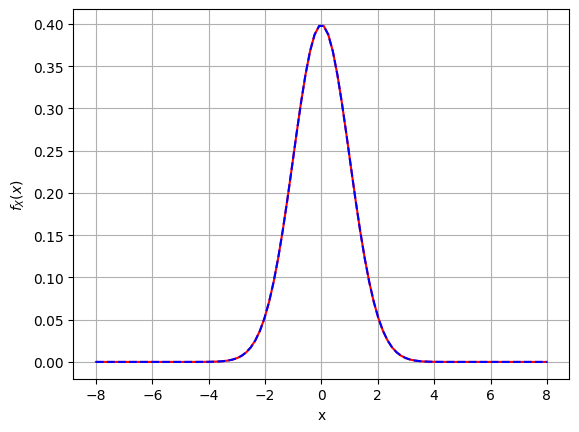

In [65]:
i = complex(0.0, 1.0) #assigning i=sqrt(-1)

# setting for normal distribution
mu = 0.0
sigma = 1.0

# Define characteristic function for the normal distribution
cF = lambda u : np.exp(i * mu * u - 0.5 * sigma**2.0 * u**2.0);

# define domain for density
x = np.linspace(-8.0,8.0,100)
f_XExact = st.norm.pdf(x,mu,sigma)

# recovered density
f_XR = RecoverDensity(cF,x,2**8)

plt.figure(1)
plt.grid()
plt.xlabel("x")
plt.ylabel("$f_X(x)$")
plt.plot(x,f_XExact,'-r')
plt.plot(x,f_XR,'--b')

## Affine Processes

Affine Diffusion models are a class of stochastic dynamics which can be expressed as:

$$
d\mathbf{X}(t) = \bar{\mu}(t, \mathbf{X}(t)) \, dt + \bar{\sigma}(t, \mathbf{X}(t)) \, d\mathbf{\tilde{W}}(t), \quad 0 \leq t_0 < t,
$$

where $ \bar{\mu}(t, \mathbf{X}(t)) : D \to \mathbb{R}^n $, $ \bar{\sigma}(t, \mathbf{X}(t)) : D \to \mathbb{R}^{n \times n} $, and $ \mathbf{\tilde{W}}(t) $ is a column vector of independent Brownian motions. The functions $ \bar{\mu}(t, X(t)) $ and $ \bar{\sigma}(t, X(t)) $ must satisfy certain conditions:
- derivatives of any order exist and are finite;
- drift and covariance parameters are linear w.r.t. $ \mathbf{X}(t) $:


1.   $$
\bar{\mu}(t, \mathbf{X}(t)) = a_0 + a_1 \mathbf{X}(t), \quad ∀ (a_0, a_1) \in \mathbb{R}^n \times \mathbb{R}^{n \times n}
$$

2. $$
(\bar{\sigma}(t, \mathbf{X}(t)) \bar{\sigma}(t, \mathbf{X}(t))^T)_{i,j} = (c_0)_{ij} + (c_1)_{ij}^T \mathbf{X}_j(t)
$$
with $ ((c_0)_{ij}, (c_1)_{ij}) \in \mathbb{R}^n \times \mathbb{R}^{n \times n}$


Since interest rates can be stochastic as well, another condition should be satisfied:

$$
\bar{r}(t, \mathbf{X}(t)) = r_0 + r_1^T \mathbf{X}(t), \quad (r_0, r_1) \in \mathbb{R} \times \mathbb{R}^n
$$

This last condition is crucial for proper discounting of asset value. In the trivial case of Black&Scholes $ \bar{r} = r$

When the dynamics of the state vector $ \mathbf{X}(t) $ are affine, it can be shown that the discounted characteristic function is of the following form:

$$
\varphi_\mathbf{X}(\mathbf{u}; t, T) = \mathbb{E}^Q \left[ e^{ - \int_t^T r(s) \, ds + i \mathbf{u}^T \mathbf{X}(T)} \mid \mathcal{F}(t) \right] = e^{\bar{A}(\mathbf{u}, \tau) + \bar{\mathbf{B}}^T(\mathbf{u}, \tau) \mathbf{X}(t)}
$$

where the expectation is taken under the risk-neutral measure $ Q $, with time lag $ \tau = T - t $, and initial conditions $ \bar{A}(u, 0) = 0 $ and $ \bar{\mathbf{B}}(\mathbf{u}, 0) = i \mathbf{u}^T $.

The coefficients $ \bar{A}(u, \tau) $ and $\bar{\mathbf{B}}(\mathbf{u}, \tau)$ must satisfy Riccati differential equations:

$$
\frac{d\bar{A}}{d\tau} = -r_0 + \bar{B}^T a_0 + \frac{1}{2} \bar{B}^T c_0 \bar{B},
$$

$$
\frac{d\bar{B}}{d\tau} = -r_1 + a_1^T \bar{B} + \frac{1}{2} \bar{B}^T c_1 \bar{B}
$$




## COS method

The Fourier-Cosine expansion of a density function $ f(x) $ on the interval $ [a, b] $ is given by:

$$
f(x) = \sum_{n=0}^{\infty}' F_n \cos \left( n \pi \frac{ (x - a)}{b - a} \right),
$$

with $ x \in [a, b] \subset \mathbb{R} $, and the coefficients are defined as:

$$
F_n := \frac{2}{b - a} \int_a^b f(x) \cos \left( n \pi \frac{ (x - a)}{b - a} \right) \, dx.
$$

with the exeption of $ F_0$:

$$
F_0 := \frac{1}{b - a} \int_a^b f(x) \cos \left( n \pi \frac{ (x - a)}{b - a} \right) \, dx.
$$
The coefficient $ F_n $ has a direct relation to the characteristic function, $ \varphi(u) := \int_{\mathbb{R}} f(x)e^{iux} \, dx $. Assuming $ f(x) \approx 0 $ outside $ [a, b] $, we get:

$$
F_n \approx A_n := \frac{2}{b - a} \int_{\mathbb{R}} f(x) \cos \left( n \pi \frac{x - a}{b - a} \right) \, dx = \frac{2}{b - a} \Re \left( \varphi \left( \frac{n \pi}{b - a} \right) \exp \left( -i \frac{n a \pi}{b - a} \right) \right).
$$


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

def COSDensity(cf,x,N,a,b):

    '''
    This function recover the density from the characteristic function by
    using the Cosine expansions.

    Parameters:
    - cf: characteristic function;
    - x: grid of values in the real values domain
    - N: number of discretized points
    - a: lower bound of the x-domain
    - b: upper bound of the x-domain

    Returns:
    - f_xiInterp: interpolated density.

    '''

    # initialize parameters
    i = complex(0.0,1.0)    # assigning i=sqrt(-1)
    k = np.linspace(0,N-1,N)   # grid for x-domain (random variable)
    u = np.zeros([1,N])        # grid for u-domain ('frequency')
    u = k * np.pi / (b-a)

    #F_k coefficients (output is a vector of cosine expansion coefficients)
    F_k    = 2.0 / (b - a) * np.real(cf(u) * np.exp(-i * u * a));
    F_k[0] = F_k[0] * 0.5; # adjustment for the first term

    # Estimated density (multiply each coefficient to the corresponding cosine
    # term and sum all the N terms)
    f_X = np.matmul(F_k , np.cos(np.outer(u, x - a )))


    return f_X

example with characteristic function of a standard normal random variable

For 2 expanansion terms the error is 0.3489222938339326
For 4 expanansion terms the error is 0.2537377837565189
For 8 expanansion terms the error is 0.10751732725194052
For 16 expanansion terms the error is 0.007172377614980574
For 32 expanansion terms the error is 4.0323407890507923e-07
For 64 expanansion terms the error is 2.6243234631470314e-16
For 128 expanansion terms the error is 2.624323567258811e-16
For 256 expanansion terms the error is 2.624323567258811e-16
For 512 expanansion terms the error is 2.624323567258811e-16


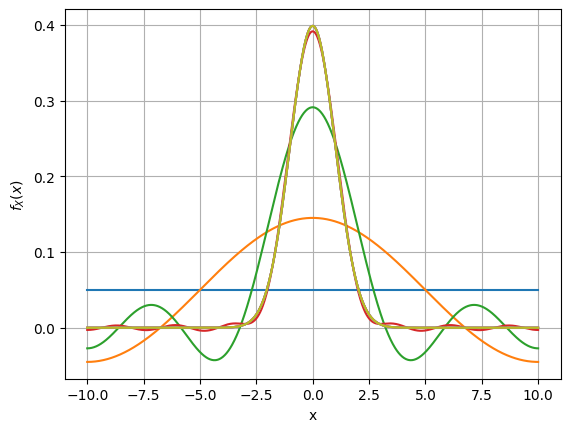

In [67]:
# assigning i=sqrt(-1)
i = complex(0.0, 1.0)

# setting estremes for the COS method (x-domain)
a = -10.0
b = 10.0

#define the number of cosine expansion terms
N = [2**x for x in range(1,10,1)]

# setting for normal distribution
mu = 0.0
sigma = 1.0

# Define characteristic function for the normal distribution
cF = lambda u : np.exp(i * mu * u - 0.5 * np.power(sigma,2.0) * np.power(u,2.0));

# define domain for density
x = np.linspace(-10,10,1000)
f_XExact = st.norm.pdf(x,mu,sigma)

plt.figure(1)
plt.grid()
plt.xlabel("x")
plt.ylabel("$f_X(x)$")
for n in N:
    f_X = COSDensity(cF,x,n,a,b)
    error = np.max(np.abs(f_X-f_XExact))
    print("For {0} expanansion terms the error is {1}".format(n,error))

    plt.plot(x,f_X)

log-normal

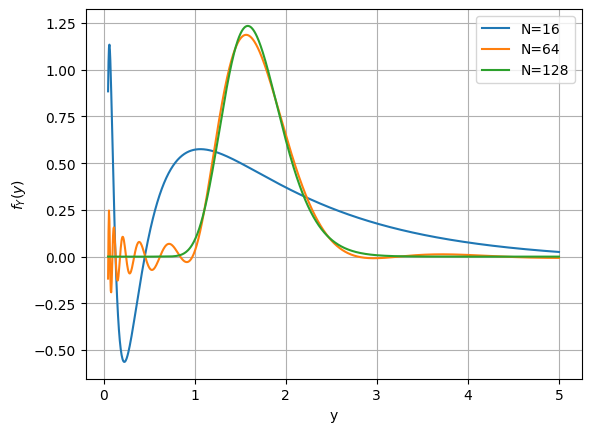

In [68]:
i = complex(0.0, 1.0) #assigning i=sqrt(-1)

# setting for the COS method
a = -10
b = 10

#define the range for the expansion points
N = [16, 64, 128]

# setting for normal distribution
mu = 0.5
sigma = 0.2

# Define characteristic function for the normal distribution
cF = lambda u : np.exp(i * mu * u - 0.5 * np.power(sigma,2.0) * np.power(u,2.0));

# define domain for density
y = np.linspace(0.05,5,1000)

plt.figure(1)
plt.grid()
plt.xlabel("y")
plt.ylabel("$f_Y(y)$")
for n in N:
    f_Y = 1/y * COSDensity(cF,np.log(y),n,a,b)

    plt.plot(y,f_Y)
plt.legend(["N=%.0f"%N[0],"N=%.0f"%N[1],"N=%.0f"%N[2]])

### Pricing European Options with COS method

1. Start from the risk-neutral valuation formula:

   $$
   V(x, t_0) = e^{-r \Delta t} \mathbb{E}^Q \left[ V(y, T) | x \right] = e^{-r \Delta t} \int_{\mathbb{R}} V(y, T) f(y | x) \, dy.
   $$

2. Truncate the integration range:

   $$
   V(x, t_0) = e^{-r \Delta t} \int_{[a, b]} V(y, T) f(y | x) \, dy + \epsilon.
   $$

3. Replace the density by the COS approximation and interchange summation and integration:

   $$
   \hat{V}(x, t_0) = e^{-r \Delta t} \sum_{n=0}^{N-1} \Re \left( \varphi \left( \frac{n \pi}{b - a}; x \right) e^{-i n \pi \frac{ a}{b - a}} \right) H_n,
   $$

   where the series coefficients of the payoff,  $ H_n $, are analytic.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import time

determine chi and psi

In [3]:
def Chi_Psi(a,b,c,d,k):
    psi = np.sin(k * np.pi * (d - a) / (b - a)) - np.sin(k * np.pi * (c - a)/(b - a))
    psi[1:] = psi[1:] * (b - a) / (k[1:] * np.pi)
    psi[0] = d - c

    chi = 1.0 / (1.0 + np.power((k * np.pi / (b - a)) , 2.0))
    expr1 = np.cos(k * np.pi * (d - a)/(b - a)) * np.exp(d)  - np.cos(k * np.pi
                  * (c - a) / (b - a)) * np.exp(c)
    expr2 = k * np.pi / (b - a) * np.sin(k * np.pi *
                        (d - a) / (b - a))   - k * np.pi / (b - a) * np.sin(k
                        * np.pi * (c - a) / (b - a)) * np.exp(c)
    chi = chi * (expr1 + expr2)

    value = {"chi":chi,"psi":psi }
    return value

determine coefficients $ H_k $ for put prices

In [4]:
def CallPutCoefficients(CP,a,b,k):
    '''
    This function compute the analytical solutions of a vanilla option payoffs
    using the Cosine expansions.

    Parameters:
    - CP:  C for call and P for put
    - a: lower bound of the x-domain
    - b: upper bound of the x-domain
    - k:

    Returns:
    - payoff H_k (call or put).
    '''

    if str(CP).lower()=="c" or str(CP).lower()=="1":
        c = 0.0
        d = b
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        if a < b and b < 0.0:
            H_k = np.zeros([len(k),1])
        else:
            H_k      = 2.0 / (b - a) * (Chi_k - Psi_k)

    elif str(CP).lower()=="p" or str(CP).lower()=="-1":
        c = a
        d = 0.0
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        H_k      = 2.0 / (b - a) * (- Chi_k + Psi_k)

    return H_k

In [5]:
def CallPutOptionPriceCOSMthd(cf,CP,S0,r,tau,K,N,L):
    '''
    This function recover the price of a vanilla option by
    using the Cosine expansions.

    Parameters:
    - cf: characteristic function;
    - CP:  C for call and P for put
    - S0: Initial stock price
    - r: interest rate (constant)
    - tau: time to maturity
    - K: list of strikes
    - N: Number of expansion terms
    - L: size of truncation domain (typ.:L=8 or L=10)

    Returns:
    - Price of an european option (call or put).
    '''


    # reshape K to a column vector
    K = np.array(K).reshape([len(K),1])

    # assigning i = sqrt(-1)
    i = complex(0.0,1.0)

    # log scaled price
    x0 = np.log(S0 / K)

    # truncation of x-domain (heuristic rule)
    a = 0.0 - L * np.sqrt(tau)
    b = 0.0 + L * np.sqrt(tau)

    # grid for coefficients of cosine expansion terms (k = 0 to k = N-1)
    k = np.linspace(0,N-1,N).reshape([N,1])
    u = k * np.pi / (b - a);

    # Determine coefficients for Put Prices
    H_k = CallPutCoefficients(CP,a,b,k)

    mat = np.exp(i * np.outer((x0 - a) , u))

    temp = cf(u) * H_k
    temp[0] = 0.5 * temp[0]

    value = np.exp(-r * tau) * K * np.real(mat.dot(temp))

    return value


It took 0.001772160530090332 seconds to price.
Abs error for strike 80.0 is equal to 3.29E-02
Abs error for strike 81.0 is equal to 4.40E-02
Abs error for strike 82.0 is equal to 5.89E-02
Abs error for strike 83.0 is equal to 8.06E-02
Abs error for strike 84.0 is equal to 1.12E-01
Abs error for strike 85.0 is equal to 1.56E-01
Abs error for strike 86.0 is equal to 2.13E-01
Abs error for strike 87.0 is equal to 2.82E-01
Abs error for strike 88.0 is equal to 3.64E-01
Abs error for strike 89.0 is equal to 4.62E-01
Abs error for strike 90.0 is equal to 5.79E-01
Abs error for strike 91.0 is equal to 7.20E-01
Abs error for strike 92.0 is equal to 8.89E-01
Abs error for strike 93.0 is equal to 1.09E+00
Abs error for strike 94.0 is equal to 1.31E+00
Abs error for strike 95.0 is equal to 1.55E+00
Abs error for strike 96.0 is equal to 1.78E+00
Abs error for strike 97.0 is equal to 1.99E+00
Abs error for strike 98.0 is equal to 2.15E+00
Abs error for strike 99.0 is equal to 2.25E+00
Abs error for

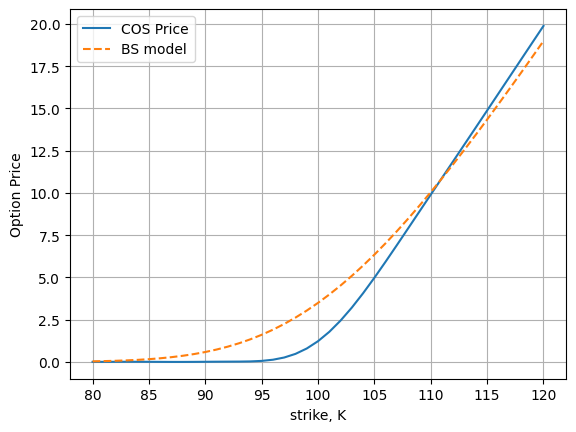

In [18]:
i = complex(0.0,1.0)

CP = "p"
S_0 = 100.0
r = 0.01
q = 0
t = 0
T = 1
sigma = 0.1
K = [float(x) for x in range(80, 121)]
N = 4*32
L = 10

# Definition of the characteristic function for the GBM, this is an input
# for the COS method
# Note that Chf does not include coefficient "+iuX(t_0)" this coefficient
# is included internally in the evaluation
# In the book we denote this function as \varphi(u)

cf = lambda u: np.exp((r - 0.5 * np.power(sigma,2.0)) * i * u * tau - 0.5
                      * np.power(sigma, 2.0) * np.power(u, 2.0) * tau)

# Timing results
NoOfIterations = 100
time_start = time.time()
for k in range(0,NoOfIterations,1):
    val_COS = CallPutOptionPriceCOSMthd(cf,CP,S0,r,tau,K,N,L)
time_stop = time.time()
print("It took {0} seconds to price.".format((time_stop-time_start)/float(NoOfIterations)))

# evaluate analytical Black Scholes equation
val_Exact = BS_Option_Price(CP, S_0, K, sigma, t, T, r, q)
plt.plot(K,val_COS)
plt.plot(K,val_Exact,'--')
plt.xlabel("strike, K")
plt.ylabel("Option Price")
plt.legend(["COS Price","BS model"])
plt.grid()

#Error comuputation
error = []
for i in range(0,len(K)):
    error.append(np.abs(val_COS[i]-val_Exact[i])[0])
    print("Abs error for strike {0} is equal to {1:.2E}".format(K[i],error[i]))

### Cash or nothing pricing with COS method

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import time

In [20]:
def BS_Cash_Or_Nothing_Price(CP,S_0,K,sigma,tau,r):

    '''
    This function compute the price of a cash or nothing option by
    using the Black-Scholes model.

    Parameters:
    - CP (str or int): a flag for Call price (c or 1) or Put (p or -1).
    - S_0 (int or float): starting value of the underlying asset.
    - K (int or float): list of strike prices.
    - sigma (int or float): volatility (annualized).
    - tau (int or float): time to maturity (years)
    - r (int or float): interest rate (annualized).

    Returns:
    - value (float): option price.

    '''

    cp = str(CP).lower()
    K = np.array(K).reshape([len(K),1])
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0))
    * tau) / float(sigma * np.sqrt(tau))
    d2    = d1 - sigma * np.sqrt(tau)
    if cp == "c" or cp == "1":
        # discounted expected value of a cash or nothing call option
        value = K * np.exp(-r * tau) * st.norm.cdf(d2)
    elif cp == "p" or cp =="-1":
        # discounted expected value of a cash or nothing put option
        value = K * np.exp(-r * tau) *(1.0 - st.norm.cdf(d2))
    return value

In [21]:
def CashOrNothingCoefficients(CP,a,b,k):
    if str(CP).lower()=="c" or str(CP).lower()=="1":
        c = 0.0
        d = b
        coef = Chi_Psi(a,b,c,d,k)
        Psi_k = coef["psi"]
        if a < b and b < 0.0:
            H_k = np.zeros([len(k),1])
        else:
            H_k      = 2.0 / (b - a) * (Psi_k)

    elif str(CP).lower()=="p" or str(CP).lower()=="-1":
        c = a
        d = 0.0
        coef = Chi_Psi(a,b,c,d,k)
        Psi_k = coef["psi"]
        H_k      = 2.0 / (b - a) * (Psi_k)

    return H_k

In [22]:
def CashOrNothingPriceCOSMthd(cf,CP,S0,r,tau,K,N,L):

    '''

    '''
    # cf   - characteristic function as a functon, in the book denoted as \varphi
    # CP   - C for call and P for put
    # S0   - Initial stock price
    # r    - interest rate (constant)
    # tau  - time to maturity
    # K    - list of strikes
    # N    - Number of expansion terms
    # L    - size of truncation domain (typ.:L=8 or L=10)

    # reshape K to a column vector
    K = np.array(K).reshape([len(K),1])

    #assigning i=sqrt(-1)
    i = complex(0.0,1.0)

    x0 = np.log(S0 / K)

    # truncation domain
    a = 0.0 - L * np.sqrt(tau)
    b = 0.0 + L * np.sqrt(tau)

    # sumation from k = 0 to k=N-1
    k = np.linspace(0,N-1,N).reshape([N,1])
    u = k * np.pi / (b - a);

    # Determine coefficients for Put Prices
    H_k = CashOrNothingCoefficients(CP,a,b,k)#CallPutCoefficients(CP,a,b,k)

    mat = np.exp(i * np.outer((x0 - a) , u))

    temp = cf(u) * H_k
    temp[0] = 0.5 * temp[0]

    value = np.exp(-r * tau) *K * np.real(mat.dot(temp))

    return value

In [23]:
i = complex(0.0,1.0)

CP    = "p"
S0    = 100.0
r     = 0.05
tau   = 0.1
sigma = 0.2
K     = [120] #np.linspace(10,S0*2.0,50)#[120.0]#
N     = [40, 60, 80, 100, 120, 140]
L     = 6

# Definition of the characteristic function for the GBM, this is an input
# for the COS method
# Note that Chf does not include coefficient "+iuX(t_0)" this coefficient
# is included internally in the evaluation
# In the book we denote this function as \varphi(u)
cf = lambda u: np.exp((r - 0.5 * np.power(sigma,2.0)) * i * u * tau - 0.5
                      * np.power(sigma, 2.0) * np.power(u, 2.0) * tau)

val_COS_Exact = CashOrNothingPriceCOSMthd(cf,CP,S0,r,tau,K,np.power(2,14),L);
print("Reference value is equal to ={0}".format(val_COS_Exact[0][0]))
# Timing results
NoOfIterations = 1000

for n in N:
    time_start = time.time()
    for k in range(0,NoOfIterations):
        val_COS = CashOrNothingPriceCOSMthd(cf,CP,S0,r,tau,K,n,L)[0]
    print("For N={0} the error is ={1}".format(n,val_COS[0]-val_COS_Exact[0]))
    time_stop = time.time()
    print("It took {0} seconds to price.".format((time_stop-time_start)/float(NoOfIterations)))

Reference value is equal to =119.128191006625
For N=40 the error is =[-0.22572124]
It took 0.0001981525421142578 seconds to price.
For N=60 the error is =[0.0026015]
It took 0.00025294184684753417 seconds to price.
For N=80 the error is =[3.58820034e-05]
It took 0.0002686591148376465 seconds to price.
For N=100 the error is =[-4.85160584e-07]
It took 0.00033251643180847167 seconds to price.
For N=120 the error is =[1.29230671e-09]
It took 0.00031458425521850586 seconds to price.
For N=140 the error is =[-1.00897068e-12]
It took 0.00032038474082946776 seconds to price.


# Monte Carlo

The underlying idea of Monte Carlo integration is based on the Law of Large Numbers:

- If $X_i$ for $ i = 1, ... , N$ is a collection of i.i.d. random variables with density $f(x)$, then:
  $$
  \lim_{N \to \infty} \frac{1}{N} \sum_{i=1}^N X_i = \int x f(x) \, dx, \quad \text{a.s.}
  $$

- Furthermore, we know that in this case:
  $$
  \text{Var} \left( \frac{1}{N} \sum_{i=1}^N X_i \right) = \frac{\sigma^2}{N},
  $$
  where $\sigma^2 = \text{Var}(X_i)$.

When $\sigma^2$ is unknown, it can be estimated by an unbiased estimator:
  $$
  \hat{\sigma}^2 = \frac{1}{N - 1} \sum_{i=1}^N \left( X_i - \frac{1}{N} \sum_{i=1}^N X_i \right)^2.
  $$


## Convergence

Speed of convergence is a key aspect of a simulation algorithm. The two main ways to measure convergence are:
-  strong convergence;
-  weak convergence.

Denote by $x_m$ the approximation for $X(T)$, where $\Delta t$ is the time step size, and $m$ corresponds to the last term in the time discretization, $t_i = i \cdot \frac{T}{m}$, $i = 0, \dots, m$. Then, the approximation $x_m$ strongly converges to $X(T)$, with order $\alpha > 0$, if

$$
\epsilon_s(\Delta t) := \mathbb{E}^Q \left[ |x_m - X(T)| \right] = O(h^{\alpha}).
$$

For a sufficiently smooth function $g(\cdot)$, the approximation $x_m$ weakly converges to $X(T)$, with respect to $g(\cdot)$, with order $\beta > 0$, if

$$
\epsilon_w(\Delta t) := \left| \mathbb{E}^Q [g(x_m)] - \mathbb{E}^Q [g(X(T))] \right| = O(h^{\beta}).
$$

In other words, a numerical integration method converges in a strong sense if the asset prices converge, while weak convergence implies a convergent approximation of the probability distribution of $X(T)$ for a given time $T$. The convergence then concerns only the marginal distribution of $X(T)$.


## Monte Carlo Algorithm

1. Partition the time interval $[0,T]$, $0 = t_0 < t_1 < \dots < t_m = T$.

2. Generate asset values, $s_{i,j}$, taking into account the risk-neutral dynamics of the underlying model. Here, $s_{i,j}$ has two indices: the time points and the Monte Carlo path.

3. Compute the $N$ payoff values, $H_j$. For European options, $H_j = H(T, s_{m,j})$, while for path-dependent options, $H_j = H(T, s_{i,j})$ for $i = 1, \dots, m$.

4. Compute the average, $\mathbb{E}^Q \left[ H(T, S) \middle| \mathcal{F}(t_0) \right] \approx \frac{1}{N} \sum_{j=1}^N H_j =: \bar{H}_N$.

5. Calculate the option value as $V(t_0, S) \approx e^{-r (T - t_0)} \frac{1}{N} \sum_{j=1}^N H_j$.

6. Determine the standard error related to the obtained prices in Step 5.
The standard error, $\epsilon_N$, is defined as

$$
\epsilon_N := \frac{\sqrt{\bar{\upsilon}_N}}{\sqrt{N}}.
$$

where $\bar{\upsilon}$ is the sample variance,

$$
\bar{\upsilon}_N := \frac{1}{N - 1} \sum_{j=1}^N \left( X_j - \frac{1}{N} \sum_{j=1}^N X_j \right)^2.
$$

When the number of samples increases by a factor of 4, the error reduces by a factor of 2.


## Euler Discretization

Euler discretization is a simple way to approximate continous stochastic dynamics in a discrete manner. in the following exercise we will show how to discretize a Geometric Brownian Motion and compare the results with the exact solution.

$$
dS(t) = \bar{\mu}(S(t),t) \, dt + \bar{\sigma}(S(t),t) \, dW(t) \quad \text{for} \quad 0 \leq t \leq T.
$$
where the driving process $W(t)$ is a Wiener process. the Euler discretization is defined as:

$$
s_{i+1} = s_i + \bar{\mu}(s_i, t_i) \, \Delta t + \bar{\sigma}(s_i, t_i) \, \Delta W_i, \quad t_i = i \, \Delta t
$$
$$
\Delta W_i = W_{i+1} - W_i = Z \sqrt{\Delta t} \quad \text{with} \quad Z \sim N(0, 1)
$$
where length $h \equiv \Delta t$ is assumed equidistant, i.e., $h \equiv \Delta t = \frac{T}{M}$.

With many simulated paths, the Euler discretization for the $i$th timestep and $j$th path reads:
$$
s_{i+1, j} \approx s_{i, j} + r s_{i, j} \, \Delta t + \sigma s_{i, j} (W_{i+1, j} - W_{i, j}),
$$
with $\Delta t = t_{i+1} - t_i$, for any $i = 1, \ldots, m$, $s_0 = S(t_0)$, and $j = 1, \ldots, N$.

The GBM process with dynamics $dS(t) = r S(t) \, dt + \sigma S(t) \, dW(t)$, has an exact solution for conditional distribution in the time interval $[t_i, t_{i+1}]$:
$$
S(t_{i+1}) = S(t_i) \exp \left( \left(r - \frac{1}{2} \sigma^2 \right) \Delta t + \sigma (W(t_{i+1}) - W(t_i)) \right).
$$



### strong convergence for a GBM

$$
s(\Delta t) = \frac{1}{N} \sum_{j=1}^{N} |S_j(T) - s_{m,j}| = \frac{1}{N} \sum_{j=1}^{N} \left| S(t_0) e^{\left( r - \frac{1}{2} \sigma^2 \right) T + \sigma W_{m,j}} - s_{m,j} \right|
$$

### weak convergence for a GBM

$$
w(\Delta t) = \frac{1}{N} \sum_{j=1}^{N} S_j(T) - \frac{1}{N} \sum_{j=1}^{N} s_{m,j}
= \left| S(t_0) \frac{1}{N} \sum_{j=1}^{N} e^{\left( r - \frac{1}{2} \sigma^2 \right) T + \sigma W_{m,j}} - \frac{1}{N} \sum_{j=1}^{N} s_{m,j} \right|
$$


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [25]:
def GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S_0):

    '''
    This function performs euler discretization of the geometric Brownian motion.
    The discretized path is compared to the exact solution for a GBM.

    Parameters:
    - NoOfPaths: number of random paths;
    - NoOfSteps: number of time steps in each path;
    - T: Maturity;
    - r: risk free rate of return;
    - sigma: volatility;
    - S_0: initial price.

    Returns:
    - paths: dictionary containing the simulated paths of the underlying asset.
    '''

    # Generate a grid of observations from standard normal random variables
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    # initialize the matrix for browian motion paths
    W = np.zeros([NoOfPaths, NoOfSteps+1])

    # Initialize matrix of approximated paths
    S1 = np.zeros([NoOfPaths, NoOfSteps+1])
    S1[:,0] =S_0

    # Exact paths
    S2 = np.zeros([NoOfPaths, NoOfSteps+1])
    S2[:,0] =S_0

    # time steps
    time = np.zeros([NoOfSteps+1])

    # time increment
    dt = T / float(NoOfSteps)

    for i in range(0,NoOfSteps):

        if NoOfPaths > 1:
            # standardize samples to accurately generate increments from normal
            # random variables and improve convergence.
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])

        # compute brownian motion paths
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]

        # compute euler discretized paths
        S1[:,i+1] = S1[:,i] + r * S1[:,i]* dt + sigma * S1[:,i] * (W[:,i+1] - W[:,i])

        # compute exact paths
        S2[:,i+1] = S2[:,i] * np.exp((r - 0.5*sigma**2.0) *dt + sigma * (W[:,i+1] - W[:,i]))
        time[i+1] = time[i] +dt

    # Retun S1 and S2
    paths = {"time":time,"S1":S1,"S2":S2}
    return paths

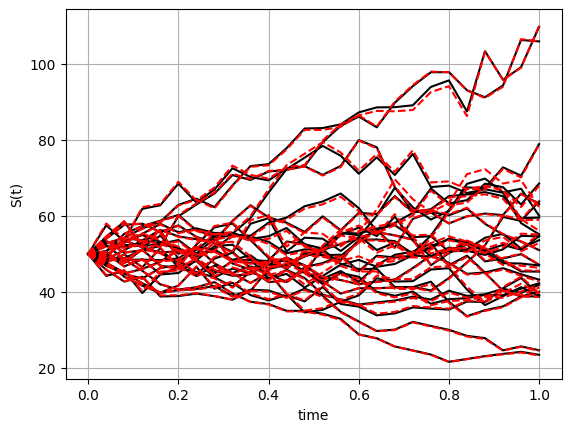

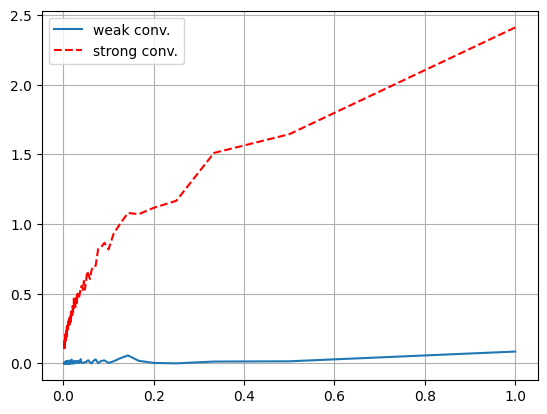

In [26]:

NoOfPaths = 25
NoOfSteps = 25
T = 1
r = 0.06
sigma = 0.3
S_0 = 50

# Simulated paths
Paths = GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
timeGrid = Paths["time"]
S1 = Paths["S1"]
S2 = Paths["S2"]

plt.figure(1)
plt.plot(timeGrid, np.transpose(S1),'k')
plt.plot(timeGrid, np.transpose(S2),'--r')
plt.grid()
plt.xlabel("time")
plt.ylabel("S(t)")

# Weak and strong convergence
NoOfStepsV = range(1,500,1)
NoOfPaths = 250
errorWeak_euler = np.zeros([len(NoOfStepsV),1])
errorStrong_euler = np.zeros([len(NoOfStepsV),1])
dtV = np.zeros([len(NoOfStepsV),1])
for idx, NoOfSteps in enumerate(NoOfStepsV):

    # generate paths with both euler discretization and exact solution
    Paths = GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    # Get the paths at T
    S1_atT = Paths["S1"][:,-1]
    S2_atT = Paths["S2"][:,-1]

    # weak convergence --> convergence in mean
    errorWeak_euler[idx] = np.abs(np.mean(S1_atT)-np.mean(S2_atT))

    # strong convergence --> convergence in sample
    errorStrong_euler[idx] = np.mean(np.abs(S1_atT-S2_atT))

    # time increments
    dtV[idx] = T/NoOfSteps


plt.figure(2)
plt.plot(dtV,errorWeak_euler)
plt.plot(dtV,errorStrong_euler,'--r')
plt.grid()
plt.legend(['weak conv.','strong conv.'])


as you can see euler discretization has very good results in terms of weak convergence but for strong convergence:

$$
\epsilon^s(\Delta t) \leq C \cdot (\Delta t)^{\frac{1}{2}} = O((\Delta t)^{\frac{1}{2}}).
$$


## Milstein Discretization

In the case of deterministic differential equations, one may employ the Taylor expansion to define discretizations by which we may obtain a higher order of convergence. For stochastic differential equations, a similar approach is available, which is based on the stochastic Taylor expansion, or the so-called Itô-Taylor expansion. The stochastic Euler approximation is based on the first two terms of this expansion.

For the Itô process SDE, $dX(t) = \bar{\mu}(t, X(t)) \, dt + \bar{\sigma}(t, X(t)) \, dW(t)$, the discretization under the Milstein scheme is obtained by adding a third term to the Euler discretization, i.e.,
$$
x_{i+1} = x_i + \int_{t_i}^{t_{i+1}} \bar{\mu}(t, X(t)) \, dt + \int_{t_i}^{t_{i+1}} \bar{\sigma}(t, X(t)) \, dW(t)
$$
$$
\approx x_i + \int_{t_i}^{t_{i+1}} \bar{\mu}(t_i, x_i) \, dt + \int_{t_i}^{t_{i+1}} \bar{\sigma}(t_i, x_i) \, dW(t)
+ \frac{1}{2} \bar{\sigma}(t_i, x_i) (W^2(\Delta t) - \Delta t) \frac{\partial \bar{\sigma}}{\partial x} (t_i, x_i),
$$

The additional correction term in the Milstein scheme improves the
speed of convergence compared to the Euler discretization for scalar
SDEs. For the Black-Scholes model, as well as for the local volatility
model, this scheme exhibits both a strong and weak convergence of
order 1:

$$
s(\Delta t) \leq C \cdot \Delta t = O(\Delta t)
$$


Although the Milstein Scheme is definitely manageable in the
one-dimensional case, its extension to multi-dimensional SDE
problems is far from trivial.




In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [28]:
def GeneratePathsGBMMilstein(NoOfPaths,NoOfSteps,T,r,sigma,S_0):
    '''
    This function performs Milstein discretization of the geometric Brownian motion.
    The discretized path is compared to the exact solution for a GBM.

    Parameters:
    - NoOfPaths: number of random paths;
    - NoOfSteps: number of time steps in each path;
    - T: Maturity
    - r: risk free rate of return;
    - sigma: volatility;
    - S_0: initial price.

    Returns:
    - paths: dictionary containing the simulated paths of the underlying asset.
    '''

    # Generate a grid of observations from standard normal random variables
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    # initialize the matrix for browian motion paths
    W = np.zeros([NoOfPaths, NoOfSteps+1])

    # Initialize matrix of approximated paths
    S1 = np.zeros([NoOfPaths, NoOfSteps+1])
    S1[:,0] =S_0

    # Exact paths
    S2 = np.zeros([NoOfPaths, NoOfSteps+1])
    S2[:,0] =S_0

    # time steps
    time = np.zeros([NoOfSteps+1])

    # time increment
    dt = T / float(NoOfSteps)

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        if NoOfPaths > 1:
            # standardize samples to accurately generate increments from normal
            # random variables and improve convergence.
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])

        # compute brownian motion paths
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]

        # compute Milstein discretized paths
        S1[:,i+1] = S1[:,i] + r * S1[:,i]* dt + sigma * S1[:,i] * (W[:,i+1] - W[:,i]) \
                    + 0.5 * sigma**2 * S1[:,i] * (np.power((W[:,i+1] - W[:,i]),2) - dt)

        # compute exact GBM paths
        S2[:,i+1] = S2[:,i] * np.exp((r - 0.5*sigma*sigma) *dt + sigma * (W[:,i+1] - W[:,i]))
        time[i+1] = time[i] +dt

    # Retun S1 and S2
    paths = {"time":time,"S1":S1,"S2":S2}
    return paths

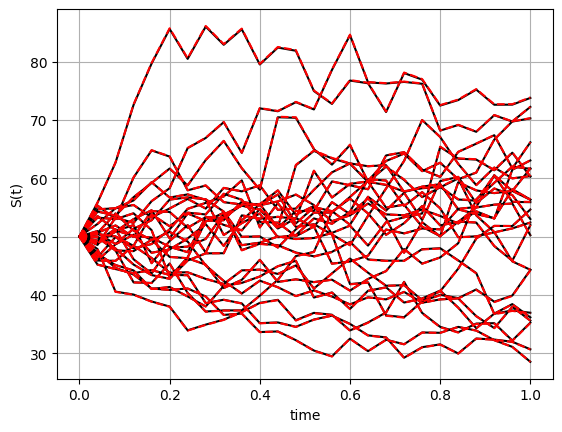

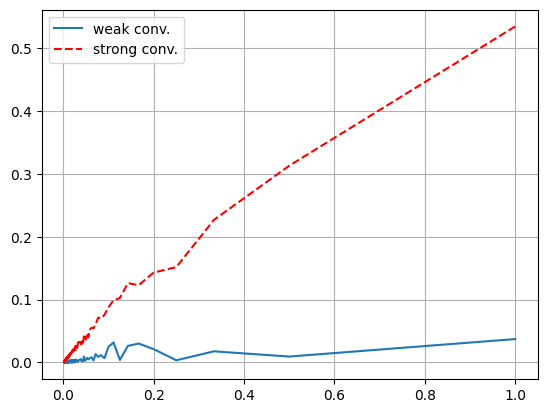

In [29]:
NoOfPaths = 25
NoOfSteps = 25
T = 1
r = 0.06
sigma = 0.3
S_0 = 50

# Simulated paths
Paths = GeneratePathsGBMMilstein(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
timeGrid = Paths["time"]
S1 = Paths["S1"]
S2 = Paths["S2"]

plt.figure(1)
plt.plot(timeGrid, np.transpose(S1),'k')
plt.plot(timeGrid, np.transpose(S2),'--r')
plt.grid()
plt.xlabel("time")
plt.ylabel("S(t)")

# Weak and strong convergence
NoOfStepsV = range(1,500,1)
NoOfPaths = 100
errorWeak_milstein = np.zeros([len(NoOfStepsV),1])
errorStrong_milstein = np.zeros([len(NoOfStepsV),1])
dtV = np.zeros([len(NoOfStepsV),1])
for idx, NoOfSteps in enumerate(NoOfStepsV):
    Paths = GeneratePathsGBMMilstein(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    # Get the paths at T
    S1_atT = Paths["S1"][:,-1]
    S2_atT = Paths["S2"][:,-1]
    errorWeak_milstein[idx] = np.abs(np.mean(S1_atT)-np.mean(S2_atT))
    errorStrong_milstein[idx] = np.mean(np.abs(S1_atT-S2_atT))
    dtV[idx] = T/NoOfSteps

plt.figure(2)
plt.plot(dtV,errorWeak_milstein)
plt.plot(dtV,errorStrong_milstein,'--r')
plt.grid()
plt.legend(['weak conv.','strong conv.'])

Text(0, 0.5, 'frequency')

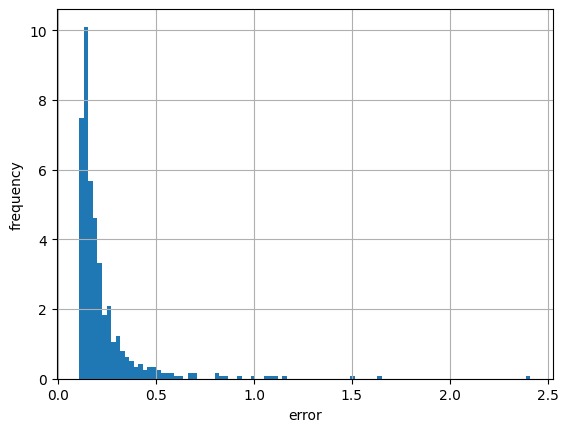

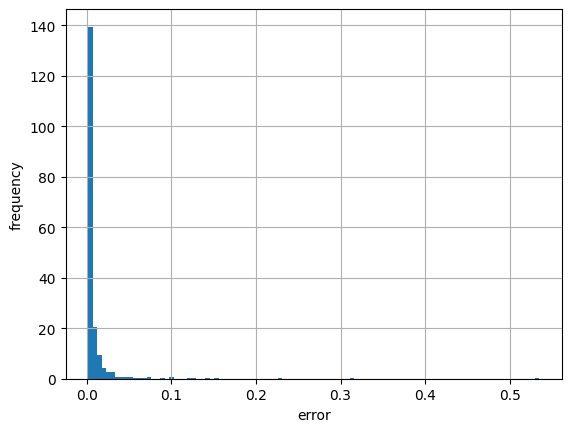

In [30]:
plt.figure(3)
plt.hist(errorStrong_euler, bins = 100, density = True)
plt.grid()
plt.xlabel("error")
plt.ylabel("frequency")

plt.figure(4)
plt.hist(errorStrong_milstein, bins = 100, density = True)
plt.grid()
plt.xlabel("error")
plt.ylabel("frequency")



Text(0, 0.5, 'frequency')

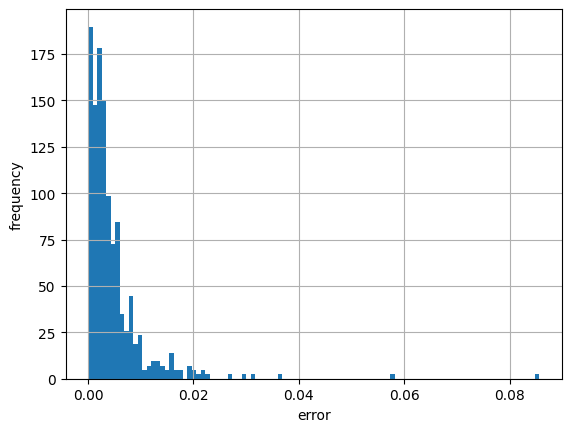

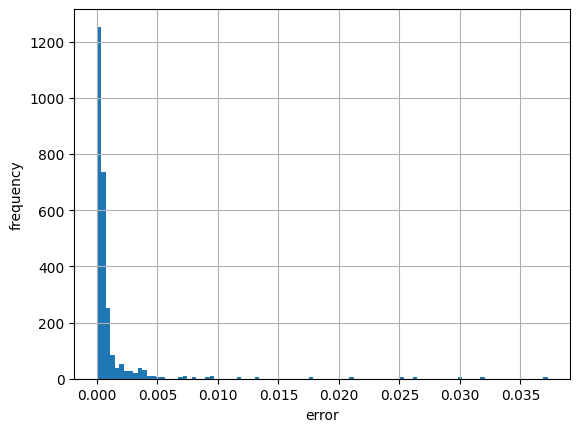

In [31]:
plt.figure(3)
plt.hist(errorWeak_euler, bins = 100, density = True)
plt.grid()
plt.xlabel("error")
plt.ylabel("frequency")

plt.figure(4)
plt.hist(errorWeak_milstein, bins = 100, density = True)
plt.grid()
plt.xlabel("error")
plt.ylabel("frequency")

## Value at Risk

$$
VaR_{\alpha}(X) = - \text{inf} [ x ∈ \mathbb{R}: F_X (x) >= \alpha ]
$$

Value at risk is the lowest loss that can occur at least in the $\alpha$% worst scenarios.

Value at risk is estimated under the $\mathbb{P}$ measure and three main approches are avaliable:

1. parametric distribution assumption
2. empirical distribution
3. montecarlo.



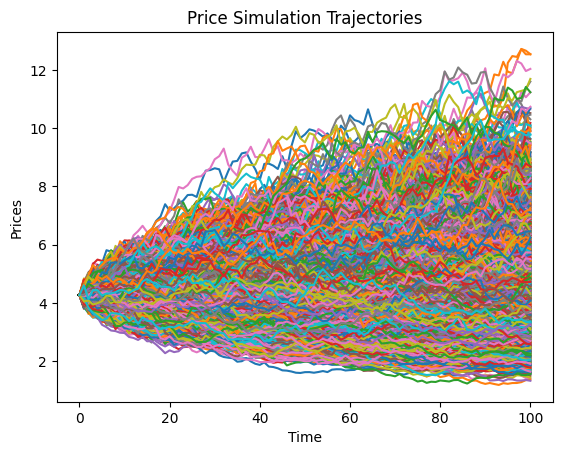

Value at Risk (VaR): 21.88714398763626


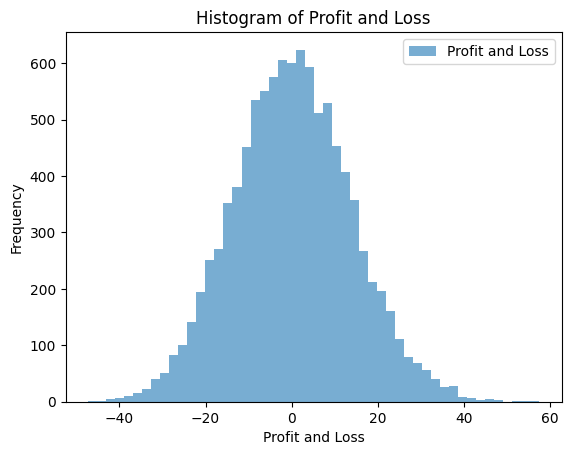

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from numpy.random import default_rng
import pandas as pd


data = pd.read_excel('Input.xlsx', sheet_name='Returns')
returns = data.iloc[:251, 0].values

# parameters under the P measure
med = np.mean(returns)
sig = np.sqrt(np.var(returns))
S_t = np.array([4.264])  # Initial prices
Nstep = 100
Nsim = 10000
dt = 1

# Preallocation
rng = default_rng()  # Random number generator for reproducibility
y = np.full((Nstep, Nsim), np.nan)
prices = np.vstack([np.tile(S_t, (1, Nsim)), np.full((Nstep, Nsim), np.nan)])

# One single trajectory
price = S_t[0]
y_S = []
trajectory = [price]
for t in range(Nstep):
    y_val = med * dt + sig * np.sqrt(dt) * rng.normal()
    y_S.append(y_val)
    price = price * np.exp(y_val)
    trajectory.append(price)

# Price simulation with Nstep and Nsim
for t in range(Nstep):
    for n in range(Nsim):
        y[t, n] = med * dt + sig * np.sqrt(dt) * rng.normal()
        prices[t + 1, n] = prices[t, n] * np.exp(y[t, n])

# Plotting different trajectories
time = np.arange(0, Nstep+1)
fiat = prices
plt.plot(time, fiat)
plt.title('Price Simulation Trajectories')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.show()

# Portfolio calculations
Port_initial = S_t * 100
Port_final = fiat * 100
ProfitAndLoss = Port_final - Port_initial
VaR = -np.percentile(ProfitAndLoss[1, :], 5)

# Display results
print(f"Value at Risk (VaR): {VaR}")

# Histogram and KDE
plt.hist(ProfitAndLoss[1, 1:], bins=50, alpha=0.6, label='Profit and Loss')
plt.title('Histogram of Profit and Loss')
plt.xlabel('Profit and Loss')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Option Pricing with MonteCarlo

The speed of convergence of a montecarlo simulation depends also on the payoff structure of the instrument we would like to price. In particular, discountinous payoffs w.r.t. the underlying asset price can cause a slower rate of convergence.
In the following code we can look at the error obtained with different number of simulated values for a plain vanilla call option and a cash or nothing option.

The payoff for a ** Plain vanilla call option** is defined as:

$$
\text{Payoff} = max{[(S_T - K); 0]}
$$


while the payoff for a **cash-or-nothing call option** is:

$$
\text{Payoff} =
\begin{cases}
K & \text{if } S_T > K \\
0 & \text{if } S_T \leq K
\end{cases}
$$

where:
- $ S_T $ is the underlying asset's price at expiration.
- $ K $ is the strike price of the option.


In [39]:
import numpy as np
import scipy.stats as st
import enum

In [40]:
def GeneratePathsGBMMilstein(NoOfPaths,NoOfSteps,T,r,sigma,S_0):
    '''
    This function performs Milstein discretization of the geometric Brownian motion.
    The discretized path is compared to the exact solution for a GBM.

    Parameters:
    - NoOfPaths: number of random paths;
    - NoOfSteps: number of time steps in each path;
    - T: Maturity
    - r: risk free rate of return;
    - sigma: volatility;
    - S_0: initial price.

    Returns:
    - paths: dictionary containing the simulated paths of the underlying asset.
    '''

    # Generate a grid of observations from standard normal random variables
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    # initialize the matrix for browian motion paths
    W = np.zeros([NoOfPaths, NoOfSteps+1])

    # Initialize matrix of approximated paths
    S1 = np.zeros([NoOfPaths, NoOfSteps+1])
    S1[:,0] =S_0

    # Exact paths
    S2 = np.zeros([NoOfPaths, NoOfSteps+1])
    S2[:,0] =S_0

    # time steps
    time = np.zeros([NoOfSteps+1])

    # time increment
    dt = T / float(NoOfSteps)

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        if NoOfPaths > 1:
            # standardize samples to accurately generate increments from normal
            # random variables and improve convergence.
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])

        # compute brownian motion paths
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]

        # compute Milstein discretized paths
        S1[:,i+1] = S1[:,i] + r * S1[:,i]* dt + sigma * S1[:,i] * (W[:,i+1] - W[:,i]) \
                    + 0.5 * sigma**2 * S1[:,i] * (np.power((W[:,i+1] - W[:,i]),2) - dt)

        # compute exact GBM paths
        S2[:,i+1] = S2[:,i] * np.exp((r - 0.5*sigma*sigma) *dt + sigma * (W[:,i+1] - W[:,i]))
        time[i+1] = time[i] +dt

    # Retun S1 and S2
    paths = {"time":time,"S1":S1,"S2":S2}
    return paths

In [76]:
def EUOptionPriceFromMCpaths(CP,S,K,T,r):
    '''
    This function compute the price of an european option according to
    Monte Carlo simulation.

    Parameters:
    - CP (str or int): a flag for Call price (c or 1) or Put price (p or -1);
    - S (int or float): final values of simulated paths of the underlying asset;
    - K (int or float): list of strike prices;
    - T (int or float): time to maturity;
    - r (int or float): interest rate;

    Returns:
    - value (float): option price.
    '''

    # initialize vector of prices (for different strikes)
    value = np.zeros(len(K))
    std_error = np.zeros(len(K))
    ci = np.zeros((len(K),2))

    if str(CP).lower()=="c" or str(CP).lower()=="1":

        for idx, k in enumerate(K):
            # Call Payoff = max{[S(T) - K]; 0}
            # Call price = e^[-r(T)]*{avg. call payoff}
            value[idx] = np.exp(-r*T)*np.mean(np.maximum(S-k,0.0))
            std_error[idx] = np.std(np.maximum(S-k,0.0), ddof=1) / np.sqrt(len(S))
            ci[idx,:] = st.norm.interval(0.95, loc = value[idx], scale = std_error[idx])  # 95% confidence interval

        return value

    elif str(CP).lower()=="p" or str(CP).lower()=="-1":

        for idx, k in enumerate(K):
            # Put Payoff = max{[K - S(T)]; 0}
            # Put price = e^[-r(T)]*{avg. put payoff}
            value[idx] = np.exp(-r*T)*np.mean(np.maximum(k-S,0.0))
            std_error[idx] = np.std(np.maximum(k-S,0.0), ddof=1) / np.sqrt(len(S))
            ci[idx,:] = norm.interval(0.95, loc = value[idx], scale = std_error[idx])  # 95% confidence interval
    else:
      return print("CP must be specified for call ('c') or put('p')")

    return value, std_error, ci

In [42]:
def CashofNothingPriceFromMCPaths(CP,S,K,T,r):
    '''
    This function compute the price of a cash or nothing option according to
    Monte Carlo simulation.

    Parameters:
    - CP (str or int): a flag for Call price (c or 1) or Put price (p or -1);
    - S (int or float): final values of simulated paths of the underlying asset;
    - K (int or float): list of strike prices;
    - T (int or float): time to maturity;
    - r (int or float): interest rate;

    Returns:
    - value (float): option price.

    '''

    if str(CP).lower()=="c" or str(CP).lower()=="1":
        # CON Call Payoff = K * 1_{S(T) > K}
        # CON Call price = e^[-r(T)]*{avg. CON call payoff}
        return np.exp(-r*T)*K*np.mean((S>K))

    elif str(CP).lower()=="p" or str(CP).lower()=="-1":
        # CON Put Payoff = K * 1_{S(T) < K}
        # CON Put price = e^[-r(T)]*{avg. CON put payoff}
        return np.exp(-r*T)*K*np.mean((S<=K))


In [43]:
CP= 1
t = 0
T = 1
r = 0.06
q = 0
sigma = 0.3
S_0 = 100
K = S_0
NoOfSteps =1000

# Simulated paths
NoOfPathsV = [10,100,1000,5000,10000]

In [53]:
# Define a list to store the results
results = []

# Convert exactPrice to a float to avoid array formatting issues
exactPrice = BS_Option_Price(CP, S_0, K, sigma, t, T, r, 0)
print("EUROPEAN OPTION PRICING")
print("Exact option price = {0}".format(exactPrice))

# Compute and store results
for NoOfPathsTemp in NoOfPathsV:
    np.random.seed(1)
    PathsEuler = GeneratePathsGBMEuler(NoOfPathsTemp, NoOfSteps, T, r, sigma, S_0)
    np.random.seed(1)
    PathsMilstein = GeneratePathsGBMMilstein(NoOfPathsTemp, NoOfSteps, T, r, sigma, S_0)

    S_Euler = PathsEuler["S1"]
    S_Milstein = PathsMilstein["S1"]

    # Calculate prices
    priceEuler = EUOptionPriceFromMCpaths(CP, S_Euler[:, -1], [K], T, r)
    priceMilstein = EUOptionPriceFromMCpaths(CP, S_Milstein[:, -1], [K], T, r)

    # Calculate errors
    errorEuler = priceEuler - exactPrice
    errorMilstein = priceMilstein - exactPrice

    # Store results as a tuple to keep data consistent
    results.append((NoOfPathsTemp, priceEuler, errorEuler, priceMilstein, errorMilstein))

# Print results as a formatted table
print("\n{:^10} {:^15} {:^15} {:^15} {:^15}".format("N", "Euler Price", "Euler Error", "Milstein Price", "Milstein Error"))
print("-" * 70)

# Display each row
for result in results:
    # Extract values from arrays for formatting
    NoOfPathsTemp, priceEuler, errorEuler, priceMilstein, errorMilstein = result
    priceEuler = priceEuler[0]  # Extract value from 1D priceEuler array
    errorEuler = errorEuler[0]  # Extract value from 1D errorEuler array
    priceMilstein = priceMilstein[0]  # Extract value from 1D priceMilstein array
    errorMilstein = errorMilstein[0]  # Extract value from 1D errorMilstein array

    print("{:<10d} {:<15.5f} {:<15.5f} {:<15.5f} {:<15.5f}".format(NoOfPathsTemp, priceEuler, errorEuler, priceMilstein, errorMilstein))




EUROPEAN OPTION PRICING
Exact option price = 14.717072420289298

    N        Euler Price     Euler Error   Milstein Price  Milstein Error 
----------------------------------------------------------------------
10         19.98632        5.26925         20.02124        5.30416        
100        14.57110        -0.14598        14.56888        -0.14819       
1000       14.40116        -0.31591        14.40420        -0.31288       
5000       14.96272        0.24565         14.96281        0.24574        
10000      14.77437        0.05730         14.77345        0.05638        


In [59]:
# Define a list to store the results
results = []

# Cash or nothing option price
print("CASH OR NOTHING PRICING")
exactPrice = float(BS_Cash_Or_Nothing_Price(CP, S_0, [K], sigma, T, r))
print("Exact option price = {0}".format(exactPrice))

# Compute and store results
for NoOfPathsTemp in NoOfPathsV:
    np.random.seed(1)
    PathsEuler = GeneratePathsGBMEuler(NoOfPathsTemp, NoOfSteps, T, r, sigma, S_0)
    np.random.seed(1)
    PathsMilstein = GeneratePathsGBMMilstein(NoOfPathsTemp, NoOfSteps, T, r, sigma, S_0)

    S_Euler = PathsEuler["S1"]
    S_Milstein = PathsMilstein["S1"]

    # Calculate prices for Cash-or-Nothing option
    priceEuler = CashofNothingPriceFromMCPaths(CP, S_Euler[:, -1], K, T, r)
    priceMilstein = CashofNothingPriceFromMCPaths(CP, S_Milstein[:, -1], K, T, r)

    # Calculate errors
    errorEuler = priceEuler - exactPrice
    errorMilstein = priceMilstein - exactPrice

    # Store results as a tuple to keep data consistent
    results.append((NoOfPathsTemp, priceEuler, errorEuler, priceMilstein, errorMilstein))

# Print results as a formatted table
print("\n{:^10} {:^15} {:^15} {:^15} {:^15}".format("N", "Euler Price", "Euler Error", "Milstein Price", "Milstein Error"))
print("-" * 70)

# Display each row
for result in results:
    print("{:<10d} {:<15.5f} {:<15.5f} {:<15.5f} {:<15.5f}".format(*result))


CASH OR NOTHING PRICING
Exact option price = 48.96599269727261


<ipython-input-59-fb349daf71dd>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  exactPrice = float(BS_Cash_Or_Nothing_Price(CP, S_0, [K], sigma, T, r)[0])



    N        Euler Price     Euler Error   Milstein Price  Milstein Error 
----------------------------------------------------------------------
10         47.08823        -1.87777        47.08823        -1.87777       
100        54.62234        5.65635         54.62234        5.65635        
1000       48.87758        -0.08841        48.68923        -0.27677       
5000       48.48204        -0.48395        48.44437        -0.52163       
10000      48.44437        -0.52163        48.44437        -0.52163       


## Variance reduction


We can calculate the confidence interval for the montecarlo price as follows:  

$$
\left[P_{mc} - 1.96 \frac{s_n}{\sqrt{n}}, \; P_{mc} + 1.96 \frac{s_n}{\sqrt{n}}\right]
$$  

where the sample variance $ s_n $ is calculated as:  

$$
s_n^2 = \frac{\sum_{i=1}^n \left( \left(K - S_{T,i}\right)^+ e^{-r (T - t)} - P_{mc} \right)^2}{n - 1}
$$  

The simulation error can be reduced both by a larger number of simulations or via variance reduction techiques.

### antithetic variates

We simulate $n/2$ perfectly negatively correlated values.

$$
\begin{bmatrix}
S_{T,1} \\
S_{T,2} \\
...     \\
S_{T,N}
\end{bmatrix}
\ →
\begin{bmatrix}
- S_{T,1} \\
- S_{T,2} \\
...     \\
- S_{T,N}
\end{bmatrix}
$$

which give antithetic vector of prices $\mathbf{P}_1$ and $\mathbf{P}_2$. to reduce variance, the simulated prices are $ \mathbf{P} = \frac{\mathbf{P}_1 + \mathbf{P}_2}{2}$

The sample mean converge to the true price as usual but the variance is know reduced by the negative correlation between samples:

$$
\sigma^2_{AV} = Var[\frac{P_1 + P_2}{2}] = \frac{Var[P_1]}{4} + \frac{Cov[P_1, P_2]}{2} + \frac{Var[P_2]}{4}
$$

### control variates

We use the price of a second derivative to to improve the MonteCarlo simulation of our target price.

$$
P_X = P_X^{MC} + \beta \frac{\sum_i^N [P_Y^i - \mathbb{E}(P_Y)]}{N}
$$

where $\beta = -\frac{Cov(P_X^{MC} P_Y^{MC})}{Var(P_Y^{MC})} $


No variance reduction

In [60]:
import numpy as np
from scipy.stats import norm

def european_option_price(S0, K, r, T, sigma, Nsim, flag):
    """
    Price a European call or put option using Monte Carlo simulation.

    Parameters:
    S0 (float): Initial asset price
    K (float): Strike price
    r (float): Risk-free interest rate
    T (float): Time to maturity (in years)
    sigma (float): Volatility (standard deviation of asset returns)
    Nsim (int): Number of simulations
    flag (int): 1 for call, -1 for put

    Returns:
    tuple: (Price, Confidence Interval (lower, upper))
    """
    # Simulate end-of-period asset prices using geometric Brownian motion
    Z = np.random.randn(Nsim)  # Standard normal random variables
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)  # Simulated prices at maturity

    # Calculate discounted payoffs
    payoffs = np.exp(-r * T) * np.maximum(flag * (ST - K), 0)

    # Estimate the price and confidence interval
    price = np.mean(payoffs)
    std_error = np.std(payoffs, ddof=1) / np.sqrt(Nsim)
    ci = norm.interval(0.95, loc=price, scale=std_error)  # 95% confidence interval

    return price, ci

In [61]:

S0 = 100
K = 110
r = 0.05
T = 1
sigma = 0.2
Nsim = 10000
flag = -1

price, ci = european_option_price(S0, K, r, T, sigma, Nsim, flag)
print(f"Option Price: {price:.4f}")
print(f"95% Confidence Interval: {ci}")

Option Price: 10.8341
95% Confidence Interval: (10.59823047754853, 11.069998042843945)


variance reduction techniques (example with european put)

In [62]:
import numpy as np
from scipy.stats import norm

def MC_price_VR(S0, r, T, sigma, Nsim, payoff, flag, Nsim2=None):
    """
    Price a European option using Monte Carlo simulation with variance reduction
    (antithetic or control variates) for a user-defined payoff.

    Parameters:
    S0 (float): Initial asset price
    r (float): Risk-free interest rate
    T (float): Time to maturity (in years)
    sigma (float): Volatility (standard deviation of asset returns)
    Nsim (int): Number of simulations for pricing
    payoff (function): Function that defines the option payoff
    flag (int): 1 for antithetic variates, 2 for control variates
    Nsim2 (int, optional): Number of simulations for control variates (used only if flag=2)

    Returns:
    dict: Contains 'Price', 'Variance', and 'Confidence Interval'
    """
    nuT = (r - 0.5 * sigma**2) * T
    sigmaT = sigma * np.sqrt(T)

    # Simulate standard normal random variables
    temp = np.random.randn(Nsim)

    if flag == 1:  # Antithetic Variates
        X1 = S0 * np.exp(nuT + sigmaT * temp)
        X2 = S0 * np.exp(nuT - sigmaT * temp)  # Antithetic variates
        Payoff1 = payoff(X1)
        Payoff2 = payoff(X2)
        DiscPayoff = np.exp(-r * T) * (Payoff1 + Payoff2) / 2
        price = np.mean(DiscPayoff)
        variance = np.var(DiscPayoff, ddof=1)
        ci = norm.interval(0.95, loc=price, scale=np.sqrt(variance / Nsim))

    elif flag == 2:  # Control Variates
        if Nsim2 is None:
            raise ValueError("Nsim2 must be provided for control variates.")

        # Step 1: Compute parameters alpha and Ef
        temp2 = np.random.randn(Nsim2)
        f = S0 * np.exp(nuT + sigmaT * temp2)  # Underlying asset
        g = np.exp(-r * T) * payoff(f)  # Payoff
        Ef = S0 * np.exp(r * T)  # Expected value of f
        Var_f = S0**2 * np.exp(2 * r * T) * (np.exp(T * sigma**2) - 1)  # Variance of f
        Cov_fg = np.cov(f, g, bias=True)[0, 1]  # Covariance between f and g
        alpha = -Cov_fg / Var_f  # Minimize variance

        # Step 2: Compute the price with control variates
        New_f = S0 * np.exp(nuT + sigmaT * temp)
        New_g = np.exp(-r * T) * payoff(New_f)
        DiscPayoff = New_g + alpha * (New_f - Ef)
        price = np.mean(DiscPayoff)
        variance = np.var(DiscPayoff, ddof=1)
        ci = norm.interval(0.95, loc=price, scale=np.sqrt(variance / Nsim))

    else:
        raise ValueError("Invalid flag. Must be 1 (antithetic) or 2 (control).")

    return {
        "Price": price,
        "Variance": variance,
        "Confidence Interval": ci
    }



In [63]:
S0 = 100
K = 100
r = 0.05
T = 1
sigma = 0.09
Nsim = 1000
flag = 1

payoff = lambda S: np.maximum(K - S, 0)

price = MC_price_VR(S0, r, T, sigma, Nsim, payoff=payoff, flag=1)
print(price)

{'Price': 1.6274360076790275, 'Variance': 4.2262080943327, 'Confidence Interval': (1.500020135975133, 1.754851879382922)}


# Heston Model with MonteCarlo

CIR Process and Probability Mass Around Zero

the CIR process is used to model variance in the Heston stochastic volatility model. The dynamics of the CIR process are given by:

$$
dv(t) = \kappa(\bar{v} - v(t)) \, dt + \gamma \sqrt{v(t)} \, dW(t), \quad v(t_0) > 0.
$$

It is well-known that if the **Feller condition**, $ 2 \kappa \bar{v} > \gamma^2 $, is satisfied, the process $ v(t) $ cannot reach zero.
If this condition does not hold, the origin is accessible and strongly reflecting.

In both cases, the $ v(t) $ process cannot become negative.

## Modified Euler Discretizations

To prevent the process from crossing the axis, we need to handle possible negative path realizations $ v_{i+1} $. Two simple corrections to discretized processes are **Truncated Euler Scheme** and **Reflecting Principle**.
The truncated Euler scheme is based on the standard Euler discretization.  The scheme can be summarized as follows:

$$
\hat{v}_{i+1} = v_i + \kappa(\bar{v} - v_i) \Delta t + \gamma \sqrt{v_i \Delta t} Z,
$$
$$
v_{i+1} = \max(\hat{v}_{i+1}, 0).
$$

Although this scheme ensures nonnegative paths, its accuracy is parameter-dependent. When the Feller condition is not satisfied and the density is expected to accumulate near zero, the truncation may introduce significant bias. By applying truncation, a different process than the original CIR process is represented numerically. When truncation occurs frequently in Monte Carlo simulations, the accuracy may be limited, as discretization bias could be high.

An alternative approach for simulating the CIR process, particularly useful when the Feller condition is not satisfied, is the reflecting principle. In this method, variance paths are forced to move upwards to avoid negative values.The reflecting scheme adjusts the Euler discretization as follows:

$$
\hat{v}_{i+1} = v_i + \kappa(\bar{v} - v_i) \Delta t + \gamma \sqrt{v_i \Delta t} Z,
$$
$$
v_{i+1} = |\hat{v}_{i+1}|.
$$

This modification reflects any negative values, ensuring nonnegative paths throughout the simulation.




In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
def CIR_paths_Truncated(NoOfPaths,NoOfSteps,T,kappa,v0,vbar,gamma):

    '''
    This function generates
    CIR paths with truncated boundary condition.

    If v(t) < 0 --> v(t) = 0

    Parameteters:
    - NoOfPaths: number of random paths;
    - NoOfSteps: number of time steps in each path;
    - T: Maturity;
    - kappa: strength of mean reversion;
    - v0: starting value of variance;
    - vbar: long-term variance;
    - gamma: volatility of volatility.

    Returns:
    - paths: dictionary containing the simulated paths of the underlying asset.

    '''
    np.random.seed(12)
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
    V1 = np.zeros([NoOfPaths, NoOfSteps+1])
    V1[:,0]=v0
    time = np.zeros([NoOfSteps+1])

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        # Truncated boundary condition
        V1[:,i+1] = V1[:,i] + kappa*(vbar - V1[:,i]) * dt + gamma* np.sqrt(V1[:,i]) * (W[:,i+1]-W[:,i])
        V1[:,i+1] = np.maximum(V1[:,i+1],0.0)
        time[i+1] = time[i] +dt


    # Outputs
    paths = {"time":time,"Vtruncated":V1}
    return paths

In [66]:
def CIR_paths_reflected(NoOfPaths,NoOfSteps,T,kappa,v0,vbar,gamma):

    '''
    This function generates
    CIR paths with reflected boundary condition.

    If v(t) < 0 --> v(t) = v(t-1)

    Parameteters:
    - NoOfPaths: number of random paths;
    - NoOfSteps: number of time steps in each path;
    - T: Maturity;
    - kappa: strength of mean reversion;
    - v0: starting value of variance;
    - vbar: long-term variance;
    - gamma: volatility of volatility.

    Returns:
    - paths: dictionary containing the simulated paths of the underlying asset.

    '''
    np.random.seed(12)
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
    V2 = np.zeros([NoOfPaths, NoOfSteps+1])
    V2[:,0]=v0
    time = np.zeros([NoOfSteps+1])

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]

        # Reflecting boundary condition
        V2[:,i+1] = V2[:,i] + kappa*(vbar - V2[:,i]) * dt + gamma* np.sqrt(V2[:,i]) * (W[:,i+1]-W[:,i])
        V2[:,i+1] = np.absolute(V2[:,i+1])
        time[i+1] = time[i] +dt

    # Outputs
    paths = {"time":time,"Vreflected":V2}
    return paths

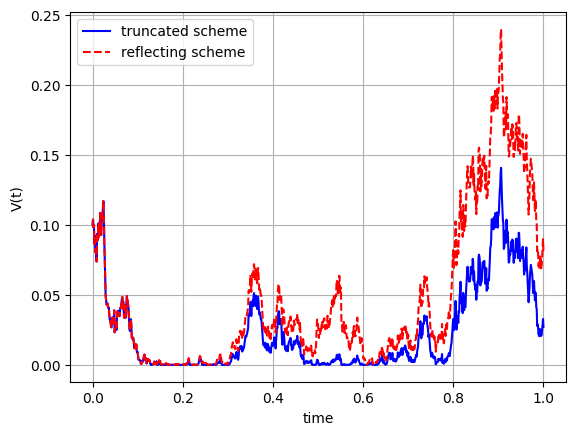

In [67]:
NoOfPaths = 1
NoOfSteps = 1000
T     = 1
kappa =0.5
v0    =0.1
vbar  =0.1
gamma =0.8
np.random.seed(210)
Paths_truncated = CIR_paths_Truncated(NoOfPaths,NoOfSteps,T,kappa,v0,vbar,gamma)
Paths_reflected = CIR_paths_reflected(NoOfPaths,NoOfSteps,T,kappa,v0,vbar,gamma)

timeGrid = Paths_truncated["time"]
V_truncated = Paths_truncated["Vtruncated"]
V_reflected = Paths_reflected["Vreflected"]

plt.figure(1)
plt.plot(timeGrid, np.transpose(V_truncated),'b')
plt.plot(timeGrid, np.transpose(V_reflected),'--r')
plt.grid()
plt.xlabel("time")
plt.ylabel("V(t)")
plt.legend(['truncated scheme', 'reflecting scheme'])

## Exact simulation of Cox-Ingersoll-Ross process


A different approach for simulating paths from the CIR process takes
into account the fact that variance process $ v(t) $, follows the
noncentral chi-squared distribution. We can perform an exact simulation scheme for the path realizations of the CIR process. For $ i = 0, \dots, m - 1 $:

$$
\bar{c}(t_{i+1}, t_i) = \frac{\gamma^2}{4 \kappa} \left(1 - e^{-\kappa (t_{i+1} - t_i)}\right),
$$
$$
\bar{\kappa}(t_{i+1}, t_i) = \frac{4 \kappa e^{-\kappa (t_{i+1} - t_i)} v_i}{\gamma^2 \left(1 - e^{-\kappa (t_{i+1} - t_i)}\right)}.
$$

Then, the next step $ v_{i+1} $ can be expressed as:

$$
v_{i+1} = \bar{c}(t_{i+1}, t_i) \chi^2(\delta, \bar{\kappa}(t_{i+1}, t_i)),
$$

where $ \delta = \frac{4 \kappa \bar{v}}{\gamma^2} $ is a constant parameter, and the initial value $ v(t_0) = v_0 $ is given.


In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
def CIR_Sample(NoOfPaths,kappa,gamma,vbar,s,t,v_s):

    '''
    This function return n samples (NoOfPaths) at time t from a conditional
    non-central chi-square distribution (conditional on time s).

    A chi-square random variable is a sum of indipendent random variables,
    previosly scaled by their respective standard deviation and squared.

    Parameters:
    - NoOfPaths: number of random paths;
    - kappa: strength of mean reversion;
    - gamma: volatility of volatility;
    - vbar: long-term variance;
    - s: start time;
    - t: time of simulation;

     Returns:
    - n samples from a non-central chi-square distribution.
    '''

    # non centrality parameter: {4*k*vbar}/{gamma^2}
    delta = 4.0 *kappa*vbar/gamma/gamma

    # constant c: {gamma^2 / 4*k} * {1 - e^[-k(t-s)]}
    c= 1.0/(4.0*kappa)*gamma*gamma*(1.0-np.exp(-kappa*(t-s)))

    # degrees of freedom: {4*k*e^[-k(t-s)]} / {gamma^2 * {1 - e^[-k(t-s)]}}
    kappaBar = 4.0*kappa*v_s*np.exp(-kappa*(t-s))/(gamma*gamma*(1.0-np.exp(-kappa*(t-s))))

    # NoOfPaths samples from a chi square distribution
    sample = c* np.random.noncentral_chisquare(delta,kappaBar,NoOfPaths)

    return  sample


In [70]:
def GeneratePathsCIRExact(NoOfPaths,NoOfSteps,T,kappa,v0,vbar,gamma):

    '''
    This function generates CIR paths according to exact simulation.

    Parameters:
    - NoOfPaths: number of random paths;
    - NoOfSteps: number of time steps in each path;
    - T: Maturity;
    - kappa: strength of mean reversion;
    - v0: starting value of variance;
    - vbar: long-term variance;
    - gamma: volatility of volatility.

    Returns:
    - paths: dictionary containing the simulated paths of the underlying asset.
    '''

    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
    V = np.zeros([NoOfPaths, NoOfSteps+1])
    V[:,0]=v0

    time = np.zeros([NoOfSteps+1])

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]

        # Exact simualtion
        V[:,i+1] = CIR_Sample(NoOfPaths,kappa,gamma,vbar,0,dt,V[:,i])

        time[i+1] = time[i] +dt

    # Outputs
    paths = {"time":time,"VExact":V}
    return paths

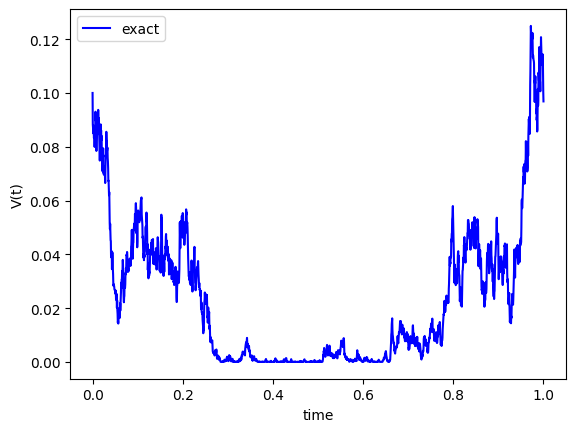

In [71]:
NoOfPaths = 1
NoOfSteps = 2000
T     = 1
kappa =0.7
v0    =0.1
vbar  =0.1
gamma =0.7

np.random.seed(10)
Paths = GeneratePathsCIRExact(NoOfPaths,NoOfSteps,T,kappa,v0,vbar,gamma)
timeGrid = Paths["time"]
V_exact = Paths["VExact"]

plt.figure(1)
plt.plot(timeGrid, np.transpose(V_exact),'b')
plt.xlabel("time")
plt.ylabel("V(t)")
plt.legend(['exact'])

## Heston Model Simulation

We can use the previously described methods to simulated heston model paths
- Exact simulation (Cos Method via Characteristic function);
- Almost exact simulation;
- Euler Simulations;


The Heston model is governed by the following dynamics:

$$
dS(t) = rS(t)dt + \sqrt{v(t)} S(t) dW_x(t)
$$
$$
dv(t) = \kappa(\bar{v} - v(t)) \ dt + \gamma \sqrt{v(t)} dW_v(t)
$$

Which for $ X(t) = \log S(t) $, becomes:

$$
dX(t) = (r-1/2v(t))dt + \sqrt{v(t)}dW_x(t)
$$

$$
dv(t) = \kappa(\bar{v} - v(t)) \ dt + \gamma \sqrt{v(t)} dW_v(t)
$$

since $ W_x $ and $ W_v $ are correlated, we can re-express the model as:

$$
dX(t) = (r-1/2v(t))dt + \sqrt{v(t)} [\rho_{x,v} dW^~_v(t) + \sqrt{1 - \rho_{x,v}^2} d\tilde{W}_x(t)]
$$

$$
dv(t) = \kappa(\bar{v} - v(t)) \ dt + \gamma \sqrt{v(t)} d\tilde{W}_v(t)
$$


After integration of both processes in a certain time interval $[t_i, t_{i+1}]$, the following discretization scheme is obtained:

$$
x_{i+1} = x_i + \int_{t_i}^{t_{i+1}} \left( r - \frac{1}{2} v(t) \right) dt + \rho_{x,v} \int_{t_i}^{t_{i+1}} \sqrt{v(t)} d\tilde{W}_{v}(t) + \sqrt{1 - \rho_{x,v}^2} \int_{t_i}^{t_{i+1}} \sqrt{v(t)} d\tilde{W}_{x}(t),
$$

and

$$
v_{i+1} = v_i + \kappa \int_{t_i}^{t_{i+1}} (\bar{v} - v(t)) dt + \gamma \int_{t_i}^{t_{i+1}} \sqrt{v(t)} d\tilde{W}_{v}(t).
$$

The two integrals with $ \tilde{W}_{v}(t) $ in the SDEs above are the same, and in terms of the variance realizations they are given by:

$$
\int_{t_i}^{t_{i+1}} \sqrt{v(t)} dW^{f}_{v}(t) = \frac{1}{\gamma} \left( v_{i+1} - v_i - \kappa \int_{t_i}^{t_{i+1}} (\bar{v} - v(t)) dt \right).
$$

The variance $ v_{i+1} $ can then be simulated, for a given value of $ v_i $, by means of the CIR process, or equivalently, by either the noncentral chi-squared distribution or by the QE scheme (the techniques described in the book).

As a final step in the Heston model simulation, the discretization for $ x_{i+1} $ is given by:

$$
x_{i+1} = x_i + \int_{t_i}^{t_{i+1}} \left( r - \frac{1}{2} v(t) \right) dt + \frac{\rho_{x,v}}{\gamma} \left( v_{i+1} - v_i - \kappa \int_{t_i}^{t_{i+1}} (\bar{v} - v(t)) dt \right) + \sqrt{1 - \rho_{x,v}^2} \int_{t_i}^{t_{i+1}} \sqrt{v(t)} d\tilde{W}_{x}(t).
$$


In [72]:
def ChF_Heston(r,tau,kappa,gamma,vbar,v0,rho):

    '''
    This function returns the characteristic function of the Heston model.
    Ref.: ' 8.3 The Heston SV discounted characteristic function '

    Parameters:
    - r: risk free rate;
    - tau: time to maturity;
    - kappa: strength of mean reversion;
    - gamma: volatility of volatility;
    - vbar: long-term variance;
    - v0: starting value of variance;
    - rho: correlation between brownian motions.

    Returns:
    - cf: characteristic function of the Heston model.
    '''
    i = complex(0.0,1.0)

    D1 = lambda u: np.sqrt(np.power(kappa-gamma*rho*i*u,2)+(u*u
    +i*u)*gamma*gamma)
    g = lambda u: (kappa-gamma*rho*i*u-D1(u))/(kappa-gamma*rho*i*u+D1(u))
    C = lambda u: (1.0-np.exp(-D1(u)*tau))/(gamma*gamma*(1.0-g(u)*np.exp(-
    D1(u)*tau)))\
    *(kappa-gamma*rho*i*u-D1(u))
    # Note that we exclude the term -r*tau, as the discounting is performed in
    # the COS method
    A = lambda u: r * i*u *tau + kappa*vbar*tau/gamma/gamma *(kappa-gamma*rho*i*u-D1(u))\
    - 2*kappa*vbar/gamma/gamma*np.log((1.0-g(u)*np.exp(-D1(u)*tau))/(1.0-
    g(u)))
    # Characteristic function for the Heston model
    cf = lambda u: np.exp(A(u) + C(u)*v0)
    return cf

In [73]:
def Paths_Heston_Euler(NoOfPaths,NoOfSteps,T,r,S_0,kappa,gamma,rho,vbar,v0):

    '''
    This function generates Heston paths using Euler scheme.

    Parameters:
    - NoOfPaths: number of random paths;
    - NoOfSteps: number of time steps in each path;
    - T: Maturity;
    - r: risk free rate;
    - S_0: initial value of the underlying asset;
    - kappa: strength of mean reversion;
    - gamma: volatility of volatility;
    - rho: correlation between brownian motions;
    - vbar: long-term variance;
    - v0: starting value of variance;

    Returns:
    - paths: dictionary containing the simulated paths of the underlying asset.
    '''

    # matrices of samples from standard normal random variable
    Z1 = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    Z2 = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])

    # initialize matrices for Wiener Processes
    W1 = np.zeros([NoOfPaths, NoOfSteps+1])
    W2 = np.zeros([NoOfPaths, NoOfSteps+1])

    # matrix for variance process of Heston model
    V = np.zeros([NoOfPaths, NoOfSteps+1])

    # matrix for log-price
    X = np.zeros([NoOfPaths, NoOfSteps+1])

    # initialize variance and log-price paths
    V[:,0]=v0
    X[:,0]=np.log(S_0)

    # time steps
    time = np.zeros([NoOfSteps+1])

    # time increments
    dt = T / float(NoOfSteps)

    for i in range(0,NoOfSteps):

        if NoOfPaths > 1:
            # standardize samples at time i to improve convergence
            Z1[:,i] = (Z1[:,i] - np.mean(Z1[:,i])) / np.std(Z1[:,i])
            Z2[:,i] = (Z2[:,i] - np.mean(Z2[:,i])) / np.std(Z2[:,i])

        # correlated brownian motion (of variance process)
        Z2[:,i] = rho * Z1[:,i] + np.sqrt(1.0-rho**2)*Z2[:,i]

        # correlated wiener processes
        W1[:,i+1] = W1[:,i] + np.power(dt, 0.5)*Z1[:,i]
        W2[:,i+1] = W2[:,i] + np.power(dt, 0.5)*Z2[:,i]

        # variance process with reflecting boundary condition
        V[:,i+1] = np.absolute(V[:,i] + kappa*(vbar - V[:,i]) * dt + gamma*np.sqrt(V[:,i]) * (W1[:,i+1]-W1[:,i]))

        # log-price process
        X[:,i+1] = X[:,i] + (r - 0.5*V[:,i])*dt + np.sqrt(V[:,i])*(W2[:,i+1]-W2[:,i])

        # increase time step
        time[i+1] = time[i] + dt

    # stock prices
    S = np.exp(X)
    paths = {"time":time,"S":S}

    return paths


In [74]:
def Paths_Heston_AES(NoOfPaths,NoOfSteps,T,r,S_0,kappa,gamma,rho,vbar,v0):
    '''
    This function generates Heston paths according to almost exact simulation.

    Parameters:
    - NoOfPaths: number of generated paths;
    - noOfSteps: number of time steps in each path;
    - T: Maturity;
    - r: risk free rate;
    - S_0: initial stock price;
    - kappa: strength of mean reversion;
    - gamma: volatility of volatility;
    - rho: correlation between brownian motions;
    - vbar: long-term variance;
    - v0: starting value of variance.

    Returns:
    - simulated paths of Heston model.
    '''

    # matrices of samples from standard normal random variable
    Z1 = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])

    # initialize matrix for Wiener Process
    W1 = np.zeros([NoOfPaths, NoOfSteps+1])

    # matrix for variance process
    V = np.zeros([NoOfPaths, NoOfSteps+1])

    # matrix for log-price process
    X = np.zeros([NoOfPaths, NoOfSteps+1])

    # initialize variance and log-price
    V[:,0]=v0
    X[:,0]=np.log(S_0)

    # time steps
    time = np.zeros([NoOfSteps+1])

    # time increments
    dt = T / float(NoOfSteps)

    for i in range(0,NoOfSteps):

        if NoOfPaths > 1:
            # standardize samples at time i to improve convergence
            Z1[:,i] = (Z1[:,i] - np.mean(Z1[:,i])) / np.std(Z1[:,i])

        W1[:,i+1] = W1[:,i] + np.power(dt, 0.5)*Z1[:,i]

        # Exact samples for the variance process (chi-square distribution)
        V[:,i+1] = CIR_Sample(NoOfPaths,kappa,gamma,vbar,0,dt,V[:,i])
        k0 = (r -rho/gamma*kappa*vbar)*dt
        k1 = (rho*kappa/gamma -0.5)*dt - rho/gamma
        k2 = rho / gamma

        # log-price
        X[:,i+1] = X[:,i] + k0 + k1*V[:,i] + k2 *V[:,i+1] + np.sqrt((1.0-rho**2)*V[:,i])*(W1[:,i+1]-W1[:,i])

        # increase time steps
        time[i+1] = time[i] +dt

    # Stock Prices
    S = np.exp(X)

    paths = {"time":time,"S":S}
    return paths


Euler Scheme, K =[100.], dt = 1.0 = [0.7275073]
Euler Scheme, K =[100.], dt = 0.25 = [4.26038573]
Euler Scheme, K =[100.], dt = 0.125 = [4.65988847]
Euler Scheme, K =[100.], dt = 0.0625 = [4.25820782]
Euler Scheme, K =[100.], dt = 0.03125 = [3.5063478]
Euler Scheme, K =[100.], dt = 0.015625 = [2.50909422]
AES Scheme, K =[100.], dt = 1.0 = [-1.8548082]
AES Scheme, K =[100.], dt = 0.25 = [-0.1321746]
AES Scheme, K =[100.], dt = 0.125 = [-0.21398418]
AES Scheme, K =[100.], dt = 0.0625 = [-0.13571459]
AES Scheme, K =[100.], dt = 0.03125 = [-0.1696131]
AES Scheme, K =[100.], dt = 0.015625 = [0.04563912]


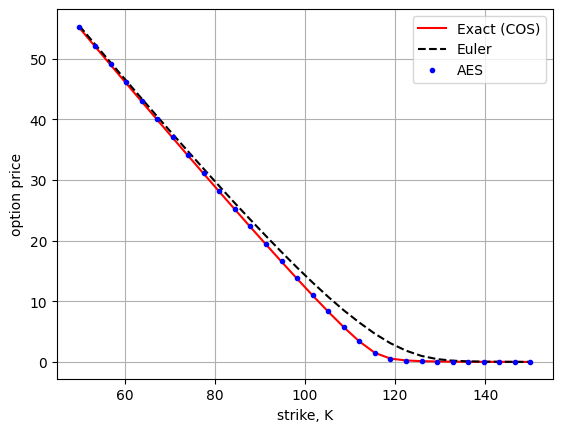

In [79]:

NoOfPaths = 1000
NoOfSteps = 500

# Heston model parameters
gamma = 1.0
kappa = 0.5
vbar  = 0.04
rho   = -0.9
v0    = 0.04
T     = 1.0
S_0   = 100.0
r     = 0.1
CP    = 1

# First we define a range of strikes and check the convergence
K = np.linspace(S_0*0.5,S_0*1.5,30)

# Exact solution with the COS method
cf = ChF_Heston(r,T,kappa,gamma,vbar,v0,rho)

# The COS method
optValueExact = CallPutOptionPriceCOSMthd(cf, CP, S_0, r, T, K, 1000, 8)

# Euler simulation
pathsEULER = Paths_Heston_Euler(NoOfPaths,NoOfSteps,T,r,S_0,kappa,gamma,rho,vbar,v0)
S_Euler = pathsEULER["S"]

# Almost exact simulation
pathsAES = Paths_Heston_AES(NoOfPaths,NoOfSteps,T,r,S_0,kappa,gamma,rho,vbar,v0)
S_AES = pathsAES["S"]

OptPrice_EULER = EUOptionPriceFromMCpaths(CP,S_Euler[:,-1],K,T,r)
OptPrice_AES = EUOptionPriceFromMCpaths(CP,S_AES[:,-1],K,T,r)

plt.figure(1)
plt.plot(K,optValueExact,'-r')
plt.plot(K,OptPrice_EULER,'--k')
plt.plot(K,OptPrice_AES,'.b')
plt.legend(['Exact (COS)','Euler','AES'])
plt.grid()
plt.xlabel('strike, K')
plt.ylabel('option price')

# Here we will analyze the convergence for particular dt
dtV = np.array([1.0, 1.0/4.0, 1.0/8.0,1.0/16.0,1.0/32.0,1.0/64.0])
NoOfStepsV = [int(T/x) for x in dtV]

# Specify strike for analysis
K = np.array([100.0])

# Exact
optValueExact = CallPutOptionPriceCOSMthd(cf, CP, S_0, r, T, K, 1000, 8)
errorEuler = np.zeros([len(dtV),1])
errorAES = np.zeros([len(dtV),1])

for (idx,NoOfSteps) in enumerate(NoOfStepsV):
    # Euler
    np.random.seed(3)
    pathsEULER = Paths_Heston_Euler(NoOfPaths,NoOfSteps,T,r,S_0,kappa,gamma,rho,vbar,v0)
    S_Euler = pathsEULER["S"]
    OptPriceEULER = EUOptionPriceFromMCpaths(CP,S_Euler[:,-1],K,T,r)
    errorEuler[idx] = OptPriceEULER-optValueExact
    # AES
    np.random.seed(3)
    pathsAES = Paths_Heston_AES(NoOfPaths,NoOfSteps,T,r,S_0,kappa,gamma,rho,vbar,v0)
    S_AES = pathsAES["S"]
    OptPriceAES   = EUOptionPriceFromMCpaths(CP,S_AES[:,-1],K,T,r)
    errorAES[idx] = OptPriceAES-optValueExact

# Print the results
for i in range(0,len(NoOfStepsV)):
    print("Euler Scheme, K ={0}, dt = {1} = {2}".format(K,dtV[i],errorEuler[i]))

for i in range(0,len(NoOfStepsV)):
    print("AES Scheme, K ={0}, dt = {1} = {2}".format(K,dtV[i],errorAES[i]))

# Hedging

Derivatives can be used to hedge a portfolio from different sources of risk. In this section we analyse how to perform classical types of hedging:
- Delta h.
- gamma h.
- vega h.

The examples consider a simple Black&Scholes framework for a single underlying asset. However, traders tend to perform hedging on a portfolio level. A benefit from netting can be seen, and therefore the hedging costs are much lower.

## Delta Hedging

The objective of delta hedging is that the value of a portfolio does not change when the value of underlying assets moves. consider the following portfolio:

$$
\Pi(t, S) = V(t, S) - \Delta S. \tag{1}
$$

Where $V$ is the value of a derivative and $S$ is one single underlying asset.
The sensitivity (first derivative) of portfolio $ \Pi(t, S) $ with respect to $S$ needs to be equal to 0:

$$
\frac{\partial \Pi(t, S)}{\partial S} = \frac{\partial V(t, S)}{\partial S} - \Delta = 0
\Rightarrow \Delta = \frac{\partial V}{\partial S}.
$$


At the starting point ($t_0$) we sell 1 unit of the derivative and we buy $Δ(t_0)$ units of the underlying $S$.

We want to perform dynamic hedging from $t_0$ to $T$. To do that, we need to modify the amount of $S$ in our portfolio to keep the value of the porfolio close to zero as much as possible.
We make use of a funding account, $ PnL(t) $. $ PnL(t) $ records all the net profits occured in each sub-period between $t_0$ and $t$. This value may be negative.

At some time $t_1 > t_0$, we then receive (or pay) interest
over the time period $[t_0,t_1]$, which will amount to $ PnL(t_0)e^{r(t_1−t_0)}$.
Every sub-period we may need to re-balance the position and hedge the
portfolio.

at $t_1$:
$$
\text{PnL}(t_1) = \underbrace{\text{PnL}(t_0)e^{r (t_1 - t_0)}}_{\text{interest}} - \underbrace{(\Delta(t_1) - \Delta(t_0)) S(t_1)}_{\text{borrow}}
$$

at $t_2$:

$$
\text{PnL}(t_2) = \underbrace{\text{PnL}(t_1)e^{r (t_2 - t_1)}}_{\text{interest}} - \underbrace{(\Delta(t_2) - \Delta(t_1)) S(t_2)}_{\text{borrow}}
$$

for a general period $t_i$ before maturity:

$$
\text{PnL}(t_i) = \underbrace{\text{PnL}(t_{i-1}))e^{r (t_i - t_{i-1})}}_{\text{interest}} - \underbrace{(\Delta(t_i) - \Delta(t_{i-1})) S(t_i)}_{\text{borrow}}.
$$

At maturity we need to take into account the payoff of the derivative and the final sell of the underlying. Assume that $V$ is the value of an European Call Option with payoff $ max[S(t) - K; 0]$.
The final $PnL(T)$:

$$
\text{PnL}(T) = \underbrace{\text{PnL}(T-1)e^{r (T - (T-1))}}_{\text{interest}} - \underbrace{\max[S(T) - K, 0]}_{\text{payoff}} + \underbrace{ \Delta(T-1) S(T)}_{\text{stock revenue}}.
$$

In a perfect world (with continuous re-balancing, perfect divisibility of the underlying, no transaction costs...) $$
\text{E[PnL(T)]} = 0
$$





In [89]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import enum
from mpl_toolkits import mplot3d
from scipy.interpolate import RegularGridInterpolator
from scipy.stats import norm

In [94]:
NoOfPaths = 1000
NoOfSteps = 1000

T = 1.0
t = 0
r = 0.01
q = 0
sigma = 0.1
S_0 = 100
K = 100
CP = 1

<ipython-input-85-f307c240b6d4>:27: RuntimeWarning: divide by zero encountered in divide
  d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * \
<ipython-input-87-1d07d8cd77cf>:24: RuntimeWarning: invalid value encountered in sqrt
  d1 = (np.log(S_0 / K) + (r - q + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
<ipython-input-87-1d07d8cd77cf>:25: RuntimeWarning: invalid value encountered in sqrt
  d2 = d1 - sigma * np.sqrt(tau)


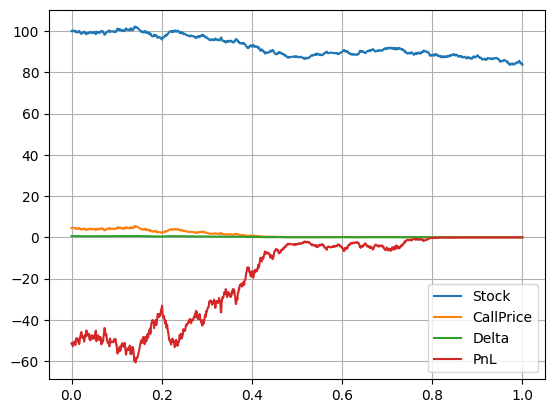

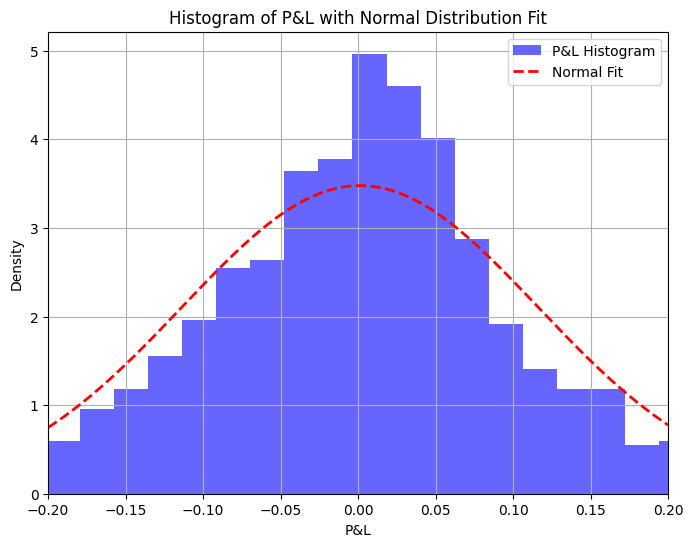

In [102]:
# generate paths of a geometric brownian motion
Paths = Paths_ABMGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
time  = Paths["time"]
S     = Paths["S"]

# Compute call prices and Deltas for different times to maturity, strikes
# and initial value of the underlying asset
C = lambda t,K,S0: BS_Option_Price(CP, S0, K, sigma, t, T, r, q)
Delta = lambda t,K,S0: BS_Delta(CP,S0,K,sigma,t,T,r)

# Setting up Profit and loss for different times for each simulated path
PnL = np.zeros([NoOfPaths,NoOfSteps+1])

# initialize delta: t_0, the strike and S_0
delta_init= Delta(0.0,K,S_0)

# Initial profit and Loss: PnL = V - delta*S_0
PnL[:,0] = C(0.0,K,S_0) - delta_init * S_0

# initialize matrix of call prices for different times for each simulated path
CallM      = np.zeros([NoOfPaths,NoOfSteps+1])
CallM[:,0] = C(0.0,K,S_0)

# initialize matrix of Delta values for different times for each simulated path
DeltaM     = np.zeros([NoOfPaths,NoOfSteps+1])
DeltaM[:,0] = Delta(0,K,S_0)


for i in range(1,NoOfSteps+1):

    # time increment (from i-1 to i)
    dt = time[i] - time[i-1]

    # delta of time i-1
    delta_old  = Delta(time[i-1],K,S[:,i-1])

    # delta of time i
    delta_curr = Delta(time[i],K,S[:,i])

    # Call price of time i (all paths)
    CallM[:,i]  = C(time[i],K,S[:,i])

    # Delta value of time i (all paths)
    DeltaM[:,i] = delta_curr

    # Profit and Loss of time i (interest and hedging component) (all paths)
    PnL[:,i]    =  PnL[:,i-1]*np.exp(r*dt) - (delta_curr-delta_old)*S[:,i]



# Final Profit and Loss, payment of the option (if in the money) and selling the hedge
PnL[:,-1] = PnL[:,-1] -np.maximum(S[:,-1]-K,0) +  DeltaM[:,-1]*S[:,-1]

# We plot only one path at the time
path_id = 13
plt.figure(1)
plt.plot(time,S[path_id,:])
plt.plot(time,CallM[path_id,:])
plt.plot(time,DeltaM[path_id,:])
plt.plot(time,PnL[path_id,:])
plt.legend(['Stock','CallPrice','Delta','PnL'])
plt.grid()


# Assume PnL data is provided as PnL[:,-1]
pnl_data = PnL[:, -1]  # Extract the last column of PnL data

# Step 1: Calculate mean and standard deviation of the data
mean, std_dev = np.mean(pnl_data), np.std(pnl_data)

# Step 2: Generate points on the x-axis for plotting the normal distribution
x = np.linspace(-0.2, 0.2, 1000)  # x-axis values over the range of interest
pdf = norm.pdf(x, mean, std_dev)   # Compute the normal distribution PDF

# Step 3: Plot the histogram and the fitted normal distribution
plt.figure(figsize=(8, 6))
plt.hist(pnl_data, bins=50, density=True, alpha=0.6, color='b', label='P&L Histogram')
plt.plot(x, pdf, 'r--', linewidth=2, label='Normal Fit')  # Overlay normal distribution
plt.grid()
plt.xlim([-0.2, 0.2])
plt.title('Histogram of P&L with Normal Distribution Fit')
plt.xlabel('P&L')
plt.ylabel('Density')
plt.legend()
plt.show()

# Analysis for each path
#for i in range(0,NoOfPaths):
#    print('path_id = {0:2d}, PnL(t_0)={1:0.4f}, PnL(Tm-1) ={2:0.4f}, S(t_m) = {3:0.4f}, max(S(tm)-K,0)= {4:0.4f}, PnL(t_m) = {5:0.4f}'.format(i,PnL[0,0],
#          PnL[i,-2],S[i,-1],np.max(S[i,-1]-K,0),PnL[i,-1]))

### Hedging with jumps

Jump diffusion process:

$$
\frac{dS(t)}{S(t)} = (r - ξ\mathbb{E}[e^J -1])dt + σdW_x^Q(t) + (e^J - 1)dX_p^Q(t)
$$

Jump dynamic is much more difficult to hedge, even with an high frequency of rebalance. --> negative skew.

In [117]:
NoOfPaths = 1000
NoOfSteps = 1000

# initialize parameters
T = 1
t = 0
r = 0.1
q = 0
sigma = 0.1
S_0 = 100
K = 100
CP = 1
xiP = 3
muJ = 0
sigmaJ = 0.3

<ipython-input-85-f307c240b6d4>:27: RuntimeWarning: divide by zero encountered in divide
  d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * \
<ipython-input-87-1d07d8cd77cf>:24: RuntimeWarning: invalid value encountered in sqrt
  d1 = (np.log(S_0 / K) + (r - q + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
<ipython-input-87-1d07d8cd77cf>:25: RuntimeWarning: invalid value encountered in sqrt
  d2 = d1 - sigma * np.sqrt(tau)


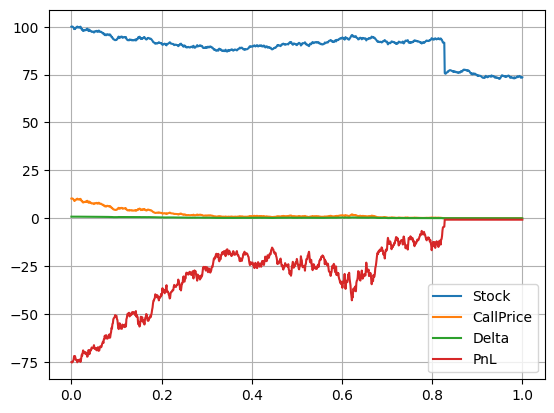

In [118]:
np.random.seed(1)

# generate paths of a geometric brownian motion
Paths = Jump_processes(NoOfPaths, NoOfSteps, S_0, T, xiP, muJ, sigmaJ,r, sigma)
time  = Paths["time"]
S     = Paths["S"]

# Compute call prices and Deltas for different times to maturity, strikes
# and initial value of the underlying asset
C = lambda t,K,S0: BS_Option_Price(CP,S0,K,sigma,t,T,r,q)
Delta = lambda t,K,S0: BS_Delta(CP,S0,K,sigma,t,T,r)

# Setting up Profit and loss for different times for each simulated path
PnL = np.zeros([NoOfPaths,NoOfSteps+1])

# initialize delta: t_0, the strike and S_0
delta_init= Delta(0.0,K,S_0)

# Initial profit and Loss: PnL = V - delta*S_0
PnL[:,0] = C(0.0,K,S_0) - delta_init * S_0

# initialize matrix of call prices for different times for each simulated path
CallM      = np.zeros([NoOfPaths,NoOfSteps+1])
CallM[:,0] = C(0.0,K,S_0)

# initialize matrix of Delta values for different times for each simulated path
DeltaM     = np.zeros([NoOfPaths,NoOfSteps+1])
DeltaM[:,0] = Delta(0,K,S_0)


for i in range(1,NoOfSteps+1):

    # time increment (from i-1 to i)
    dt = time[i] - time[i-1]

    # delta of time i-1
    delta_old  = Delta(time[i-1],K,S[:,i-1])

    # delta of time i
    delta_curr = Delta(time[i],K,S[:,i])

    # Call price of time i (all paths)
    CallM[:,i]  = C(time[i],K,S[:,i])

    # Delta value of time i (all paths)
    DeltaM[:,i] = delta_curr

    # Profit and Loss of time i (interest and hedging component) (all paths)
    PnL[:,i]    =  PnL[:,i-1]*np.exp(r*dt) - (delta_curr-delta_old)*S[:,i]



# Final Profit and Loss, payment of the option (if in the money) and selling the hedge
PnL[:,-1] = PnL[:,-1] -np.maximum(S[:,-1]-K,0) +  DeltaM[:,-1]*S[:,-1]

# We plot only one path at the time
path_id = 13
plt.figure(1)
plt.plot(time,S[path_id,:])
plt.plot(time,CallM[path_id,:])
plt.plot(time,DeltaM[path_id,:])
plt.plot(time,PnL[path_id,:])
plt.legend(['Stock','CallPrice','Delta','PnL'])
plt.grid()


# Assume PnL data is provided as PnL[:,-1]
pnl_data = PnL[:, -1]  # Extract the last column of PnL data

# Step 1: Calculate mean and standard deviation of the data
mean, std_dev = np.mean(pnl_data), np.std(pnl_data)

# Step 2: Generate points on the x-axis for plotting the normal distribution
x = np.linspace(-0.2, 0.2, 1000)  # x-axis values over the range of interest
pdf = norm.pdf(x, mean, std_dev)   # Compute the normal distribution PDF


## Gamma Hedging

If a trader want to $\Delta - \Gamma$ hedge the portfolio, he need to trade an instrument with a non-null $\Gamma$. The underlying is not useful in this context, we need a non linear payoff w.r.t. $S$ such as an option payoff.

Second order approximation of $V(t)$:

$$
V[S(t+\Delta t)] ≈ V[S(t)] + \Delta S \frac{\partial V}{\partial S} + \frac{1}{2} (\Delta S)^2 \frac{\partial^2 V}{\partial S^2}
$$
$$
V[S(t+\Delta t)] ≈ V[S(t)] + \Delta S \Delta_V + \frac{1}{2} (\Delta S)^2 \Gamma_V
$$

Consider a portfolio:

$$
α_1 S - C_1 + α_3 C_2  \\
\frac{\partial P}{\partial S} = \alpha_1 - \Delta_{C_1} + \alpha_3 \Delta_{C_2} \\
\frac{\partial^2 P}{\partial S^2} = - \Gamma_{C_1} + \alpha_3 \Gamma_{C_2}
$$

To perform $\Delta - \Gamma $ hedging we need to solve the system:

$$
\begin{cases}
    \alpha_1  - \Delta_{C_1} + \alpha_3 \Delta_{C_2} = 0 \\
    - \Gamma_{C_1} + \alpha_3 \Gamma_{C_2} = 0
\end{cases}
$$

which gives:

$$
\begin{cases}
    \alpha_1 =  \Delta_{C_1} - \frac{\Gamma_{C_1}}{\Gamma_{C_2}} \Delta_{C_2} \\
    \alpha_3 = \frac{\Gamma_{C_1}}{\Gamma_{C_2}}
\end{cases}
$$





In [119]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


In [123]:
# path parameters
S0 = 1
r = 0.01
q = 0
sigma = 0.3 # vola
xiP = 1     # intensity of the poisson process
muJ = 0     # mean of jump
sigmaJ = 0.3 # std of jump

# options parameters
T1 = 1.5   # time to maturity first option
T2 = 2     # time to maturity second option
T_S = 1    # period of simulation for the stock process
K  = 1
CP = 'c'

# simulation parameters
NoOfPaths = 1000 # number of simulations
NoOfSteps = 1000 # number of time steps


# Compute call prices, Deltas, and Gammas for different times to maturity, strikes
# and initial value of the underlying asset
C = lambda t, T, s0: BS_Option_Price(CP, s0, K, sigma, t, T, r, q)
Delta = lambda t, T, s0: BS_Delta(CP, s0, K, sigma, t, T, r)
Gamma = lambda t, T, s0: BS_Gamma(s0, K, sigma, t, T, r)

PnL = np.zeros([NoOfPaths, NoOfSteps + 1])

# initialize delta and gamma: t_0, the strike and S_0
delta_1_init = Delta(0.0, T1, S0)
gamma_1_init = Gamma(0.0, T1, S0)
delta_2_init = Delta(0.0, T2, S0)
gamma_2_init = Gamma(0.0, T2, S0)

alpha3_init = gamma_1_init / gamma_2_init
alpha1_init = delta_1_init - alpha3_init * delta_2_init

#np.random.seed(1)

# generate paths of a geometric brownian motion
Paths = Jump_processes(NoOfPaths, NoOfSteps, S0, T_S, xiP, muJ, sigmaJ, r, sigma)
#Paths = GeneratePathsGBMMilstein(NoOfPaths,NoOfSteps,T,r,sigma,S0)
time  = Paths["time"]
S     = Paths["S"]


# Initial profit and Loss
PnL[:,0] = - alpha1_init*S0 + C(0.0, T1, S0) - alpha3_init*C(0.0, T2, S0)

# initialize matrix of call prices for different times for each simulated path
Call_1 = np.zeros([NoOfPaths,NoOfSteps+1])
Call_2 = np.zeros([NoOfPaths,NoOfSteps+1])

Call_1[:,0] = C(0.0, T1, S0)
Call_2[:,0] = C(0.0, T2, S0)

# initialize matrix of Delta values for different times for each simulated path
alpha3 = np.zeros([NoOfPaths,NoOfSteps+1])
alpha1 = np.zeros([NoOfPaths,NoOfSteps+1])

alpha3[:,0] = alpha3_init
alpha1[:,0] = alpha1_init


for i in range(1,NoOfSteps+1):

    # time increment (from i-1 to i)
    dt = time[i] - time[i-1]

    # delta of time i-1
    delta_1_old  = Delta(time[i-1], T1, S[:,i-1])
    delta_2_old  = Delta(time[i-1], T2, S[:,i-1])

    # Gamma value of time i - 1
    gamma_1_old = Gamma(time[i-1], T1, S[:,i-1])
    gamma_2_old = Gamma(time[i-1], T2, S[:,i-1])

    # coefficients of time i - 1
    alpha3_old = gamma_1_old / gamma_2_old
    alpha1_old = delta_1_old - alpha3_old * delta_2_old

    # delta of time i
    delta_1_curr = Delta(time[i], T1, S[:,i])
    delta_2_curr = Delta(time[i], T2, S[:,i])

    # Gamma value of time i
    gamma_1_curr = Gamma(time[i], T1, S[:,i])
    gamma_2_curr = Gamma(time[i], T2, S[:,i])

    # coefficients of time i
    alpha3_curr = gamma_1_curr / gamma_2_curr
    alpha1_curr = delta_1_curr - alpha3_curr * delta_2_curr


    # Call price of time i (all paths)
    Call_1[:,i]  = C(time[i], T1, S[:,i])
    Call_2[:,i]  = C(time[i], T2, S[:,i])

    # Delta value of time i (all paths)
    alpha3[:,i] = alpha3_curr
    alpha1[:,i] = alpha1_curr


    # Profit and Loss of time i (interest and hedging component) (all paths)
    PnL[:,i] = PnL[:,i-1]*np.exp(r*dt) - (alpha3_curr - alpha3_old)*Call_2[:,i] - (alpha1_curr - alpha1_old)*S[:,i]


# Final Profit and Loss, payment of the option (if in the money) and selling the hedge
PnL[:,-1] = PnL[:,-1] - Call_1[:,-1] + alpha1[:,-1]*S[:,-1] + alpha3[:,-1]*Call_2[:,-1]

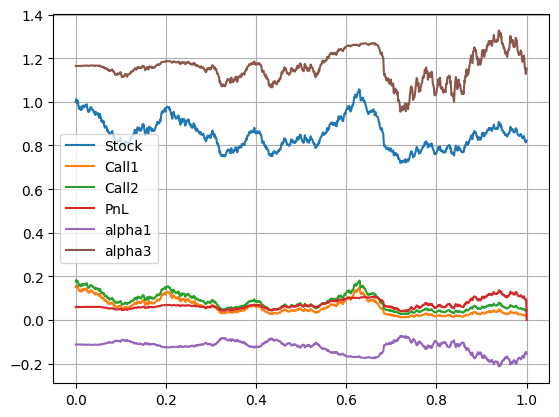

In [124]:
# We plot only one path at the time
path_id = 16
plt.figure(1)
plt.plot(time,S[path_id,:])
plt.plot(time,Call_1[path_id,:])
plt.plot(time,Call_2[path_id,:])
plt.plot(time,PnL[path_id,:])
plt.plot(time,alpha1[path_id,:])
plt.plot(time,alpha3[path_id,:])
plt.legend(['Stock','Call1', 'Call2','PnL', 'alpha1', 'alpha3'])
plt.grid()

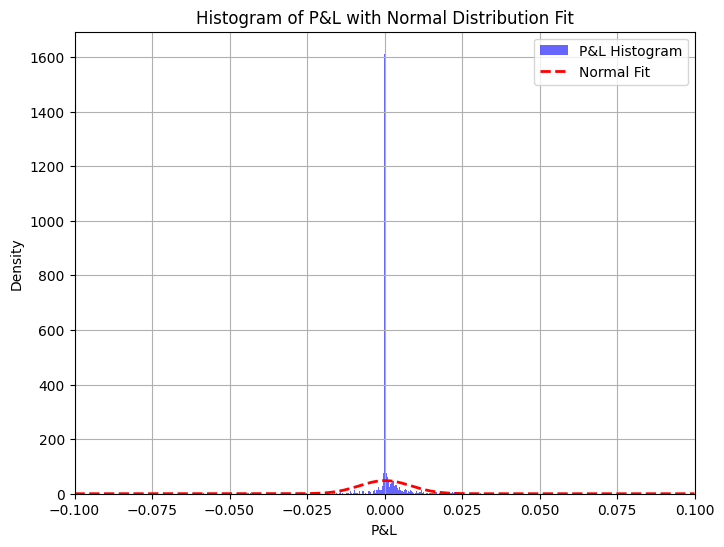

In [125]:
# Assume PnL data is provided as PnL[:,-1]
pnl_data = PnL[:, -1]  # Extract the last column of PnL data

# Step 1: Calculate mean and standard deviation of the data
mean, std_dev = np.mean(pnl_data), np.std(pnl_data)

# Step 2: Generate points on the x-axis for plotting the normal distribution
x = np.linspace(-0.1, 0.1, 1000)  # x-axis values over the range of interest
pdf = st.norm.pdf(x, mean, std_dev)   # Compute the normal distribution PDF

# Step 3: Plot the histogram and the fitted normal distribution
plt.figure(figsize=(8, 6))
plt.hist(pnl_data, bins=500, density=True, alpha=0.6, color='b', label='P&L Histogram')
plt.plot(x, pdf, 'r--', linewidth=2, label='Normal Fit')  # Overlay normal distribution
plt.grid()
plt.xlim([-0.1, 0.1])
plt.title('Histogram of P&L with Normal Distribution Fit')
plt.xlabel('P&L')
plt.ylabel('Density')
plt.legend()
plt.show()

## Vega Hedging

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import enum

### Pathwise Montecarlo Hedging

Finite difference is a general approach used to estimate price sensitivity of any kind of derivative w.r.t to any sort of parameter, but when the model gives useful informations regarding the dynamic of the underlying or the payoff, other approaches can be followed.

One of the alternatives is the estimation of pathwise sensitivity.  The pathwise sensitivity method can estimate sensitivities at time 0. It is applicable with continuous functions of the parameter of interest and is based on interchanging the differentiation and expectation operators:

$$
\frac{\partial V}{\partial \theta} = \frac{\partial}{\partial \theta} \mathbb{E}^Q \left[ \frac{V(T, S; \theta)}{M(T)} \mid \mathcal{F}(t_0) \right] = \mathbb{E}^Q \left[ \frac{\partial}{\partial \theta} \frac{V(T, S; \theta)}{M(T)} \mid \mathcal{F}(t_0) \right]. \tag{10}
$$

$\theta$ can be the underlying $S$ itself or a different parameter.

Assuming a constant interest rate, the discount factor can be taken out of the expectation. Applying the chain rule of derivatives:

$$
\frac{\partial V}{\partial \theta} = e^{-r (T - t_0)} \mathbb{E}^Q \left[ \frac{\partial V(T, S; \theta)}{\partial S} \frac{\partial S}{\partial \theta} \mid \mathcal{F}(t_0) \right]
$$

As an example, we can take the derivative of an european call option w.r.t. the underlying asset at maturity:

$$
\frac{\partial V}{\partial S(T)} = \mathbb{1}_{\{S(T) - K\}}
$$
In the Black&Scholes model, the marginal distribution of $S(T)$ is:

$$
S(T) = S(t_0) e^{\left(r - \frac{1}{2} \sigma^2 \right)(T - t_0) + \sigma (W(T) - W(t_0))}
$$

This implies

$$
\frac{\partial S(T)}{\partial S(t_0)} = e^{\left(r - \frac{1}{2} \sigma^2\right)(T - t_0) + \sigma (W(T) - W(t_0))}
$$

$$
\frac{\partial S(T)}{\partial \sigma} = S(T) \left(-\sigma (T - t_0) + W(T) - W(t_0)\right)
$$









In [127]:
def PathwiseDelta(S0,S,K,r,T):

    # select all positive payoffs
    temp1 = S[:,-1]>K
    delta_S0 = np.exp(-r*T)*np.mean(S[:,-1]/S0*temp1)
    return delta_S0

def PathwiseVega(S0,S,sigma,K,r,T):
    temp1 = S[:,-1]>K
    temp2 = 1.0/sigma* S[:,-1]*(np.log(S[:,-1]/S0)-(r+0.5*sigma**2.0)*T)
    vega_BS = np.exp(-r*T)*np.mean(temp1*temp2)
    return vega_BS

Running simulation with 5.0 paths
Running simulation with 25.0 paths
Running simulation with 46.0 paths
Running simulation with 66.0 paths
Running simulation with 86.0 paths
Running simulation with 107.0 paths
Running simulation with 127.0 paths
Running simulation with 147.0 paths
Running simulation with 167.0 paths
Running simulation with 188.0 paths
Running simulation with 208.0 paths
Running simulation with 228.0 paths
Running simulation with 249.0 paths
Running simulation with 269.0 paths
Running simulation with 289.0 paths
Running simulation with 310.0 paths
Running simulation with 330.0 paths
Running simulation with 350.0 paths
Running simulation with 371.0 paths
Running simulation with 391.0 paths
Running simulation with 411.0 paths
Running simulation with 431.0 paths
Running simulation with 452.0 paths
Running simulation with 472.0 paths
Running simulation with 492.0 paths
Running simulation with 513.0 paths
Running simulation with 533.0 paths
Running simulation with 553.0 path

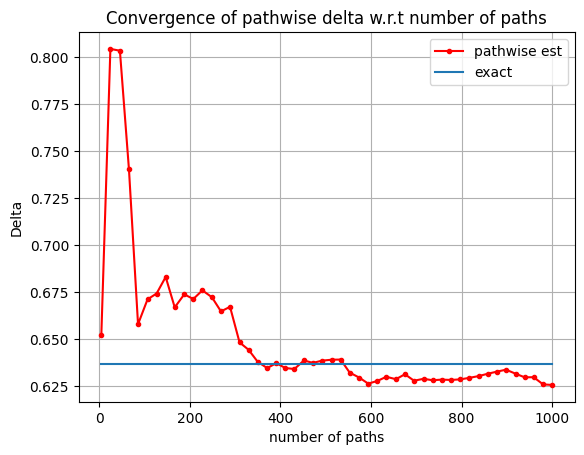

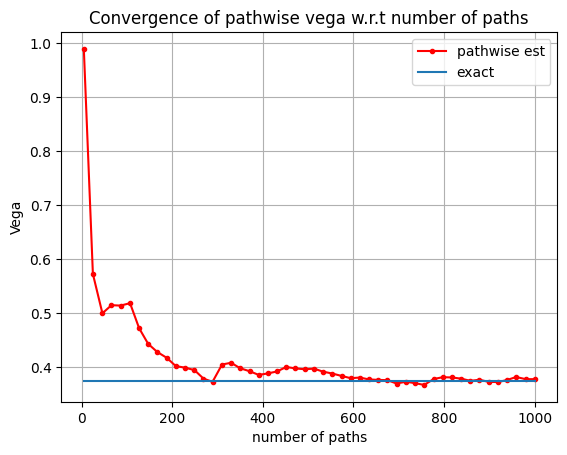

In [130]:
CP        = 'C'
S0        = 1
r         = 0.06
sigma     = 0.3
T         = 1
K         = np.array([S0])
t         = 0.0

NoOfSteps = 1000
delta_Exact = BS_Delta(CP,S0,K,sigma,t,T,r)
vega_Exact  = BS_Vega(S0,K,sigma,t,T,r)

NoOfPathsV = np.round(np.linspace(5,1000,50))
deltaPathWiseV = np.zeros(len(NoOfPathsV))
vegaPathWiseV  = np.zeros(len(NoOfPathsV))

for (idx,nPaths) in enumerate(NoOfPathsV):
    print('Running simulation with {0} paths'.format(nPaths))
    np.random.seed(3)
    paths1 = Paths_ABMGBM(int(nPaths),NoOfSteps,T,r,sigma,S0)
    S = paths1["S"]
    delta_pathwise = PathwiseDelta(S0,S,K,r,T)
    deltaPathWiseV[idx]= delta_pathwise

    vega_pathwise = PathwiseVega(S0,S,sigma,K,r,T)
    vegaPathWiseV[idx] =vega_pathwise

plt.figure(1)
plt.grid()
plt.plot(NoOfPathsV,deltaPathWiseV,'.-r')
plt.plot(NoOfPathsV,delta_Exact*np.ones([len(NoOfPathsV),1]))
plt.xlabel('number of paths')
plt.ylabel('Delta')
plt.title('Convergence of pathwise delta w.r.t number of paths')
plt.legend(['pathwise est','exact'])

plt.figure(2)
plt.grid()
plt.plot(NoOfPathsV,vegaPathWiseV,'.-r')
plt.plot(NoOfPathsV,vega_Exact*np.ones([len(NoOfPathsV),1]))
plt.xlabel('number of paths')
plt.ylabel('Vega')
plt.title('Convergence of pathwise vega w.r.t number of paths')
plt.legend(['pathwise est','exact'])

# Exotic Derivatives

In the previous sections we have seen risk-neutral procedure to estimate the price of european options, where the right can be exercised only at maturity.
Many other categories of options are available in the market:

1. exercise period :
  -  American options: they can be exercised on any trading day between effective date and expiration date;
  -  Bermuda options: the early exercise can be made only on specific dates

2. Payoff structure w.r.t. $S(T)$:
  - Binary/Digital options
  - Compound options
  - Chooser options
  - Multi-asset Options

2. Payoff structure w.r.t. the path of $S $-> Exotic options: the payoff does not depend only on the price of the underlying at the exercise date but also on the previous path:
  - Barrier Options
  - Asian options
  - lookback options

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import enum

In [147]:
NoOfPaths = 10000
NoOfSteps = 250

S0    = 100.0
r     = 0.05
T    = 5
sigma = 0.2
Su = 150

paths = GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S0)
S_paths= paths["S2"]
S_T = S_paths[:,-1]

## Digital Payoffs

Binary/Digital options: they have discountinous payoff w.r.t. to the underlying. Classic examples are the Cash-or-Nothing option
$$
V(S,T) = Q \mathbf{1}_{S(T) >K}
$$
with $Q$ a fixed amount of money. Asset-or-Nothing
$$
V(S,T) =  S(T) \mathbf{1}_{S(T) >K}
$$
where the indicator function $\mathbf{1}_{(.)}$ can have different conditions.


In [148]:
def Payoff_MCprice(S,T,r,payoff):

    '''
    This function computes the MonteCarlo estimated price for a generic
    plain vanilla option. The specific payoff structure must be specified.

    Parameters:
    - S: vector of MonteCarlo samples at time T;
    - T: time to maturity;
    - r: interest rate;
    - payoff: payoff function.

    Output:
    - price of a Binary Option with a specified payoff (parameter
    'payoff').
    '''

    # S is a vector of Monte Carlo samples at T
    return np.exp(-r*T) * np.mean(payoff(S))

Value of the contract at t0 =2.376569810105157


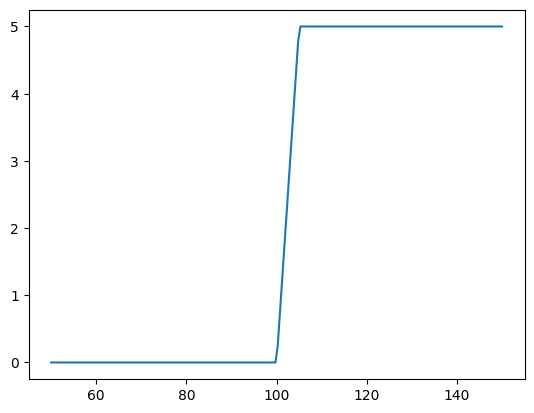

In [149]:
# Payoff setting
K  = 100.0
K2 = 105.0

# Payoff specification (spread option, approximate a digital)
payoff = lambda S: np.maximum(S-K,0.0) - np.maximum(S-K2,0)

#Plot
S_T_grid = np.linspace(50,S0*1.5,200)

plt.figure(1)
plt.plot(S_T_grid,payoff(S_T_grid))

# Valuation
val_t0 = Payoff_MCprice(S_T,T,r,payoff)
print("Value of the contract at t0 ={0}".format(val_t0))

## Barrier Options

Barrier options are options that either can be exercised or not
when predetermined trigger points (barriers) are reached the underlying asset price. They can be seen as digital options, where the digitality is shifted from the final payoff to the path of the underlying stock.
This kind of option is very popular because allow investors to reduce the premium by limiting the upside (or downside) potential of final payoff.

Apart from the barrier, the payoffs are the usual ones.

The barrier can be also path dependent.


### Up / Down

A barrier option is an 'up option' if the barrier is fixed above the starting value of the underlying and it is a 'down option' if the barrier is below the initial value.

### Knock in / Knock out

knock in Barrier options can be exercised when the barrier is excedeed before expiry. take an up-and-in call option as an example:

$$
V(S_u, T) = max[S(T) - K;0] \mathbb{1}_{[S(t) > S_u]} \quad \text{with} \quad S_u > S(t_0), \quad t < T
$$

Knock out options pays off only if the barrier is not reached before expiration. The payoff of a up-and-out call option is:

$$
V(S_u, T) = max[S(T) - K;0] \mathbb{1}_{[S(t) < S_u]} \quad \text{with} \quad S_u > S(t_0), \quad t < T
$$

It can be shown that the combination of 'in' and 'out' options with the same barrier $S_b$ and strike $K$ are equivalent to a plain vanilla option.

For knock out options, the purchaser expects that the barrier will not be excedeed, and he/she is not willing to pay the full premium of a plain vanilla call or put.

for knock in options, the purchaser expects a significant increase/decrease in the underlying price, such that he/she can benefit from large movements in the price.

Barrier options have discontinuous delta at the barrier. The value of an option goes from 0 to V (or from V to 0) when the barrier is triggered.
A discontinuity in the delta means that the gamma is instantaneously infinite at the barrier.
Delta hedging through the
barrier is virtually impossible, and costly. There have been a number of suggestions made for ways to
statically hedge barrier options. These methods try to mimic as
closely as possible the value of a barrier option with vanilla calls and
puts or with binary options.


In [150]:
def OutBarrier_MCprice(S, T, r, payoff, Su, Up_Down, In_Out):

    '''
    This function computes the payoff of an Up/Down and In/out
    generic Barrier option (UpAndOut, DownAndOut, UpAndIn or DownAndIn).
    The payoff of the option must be specified.

    Parameters:
    - S: matrix of MonteCarlo paths;
    - T: time to maturity;
    - r: interest rate;
    - payoff: payoff function;
    - Su: barrier value.
    - Up/Down: barrier location.
    - In/Out: option type (knock in or knock out)

    Output:
    - price of a Up/Down and In/Out Barrier option with a specified payoff (parameter
    'payoff').
    '''

    # Matrix for barrier condition (all cells have the barrier value)
    n1,n2 = S.shape
    barrier= np.zeros([n1,n2]) + Su

    if Up_Down == 1 or Up_Down == 'up':
      # check all the barrier exceedings in each path
      hitM = S > barrier
    elif Up_Down == 0 or Up_Down == 'down':
      # check all the barrier exceedings in each path
      hitM = S < barrier

    # verify if barrier has been reached at least one time
    hitVec = np.sum(hitM, 1)

    if In_Out == 1 or In_Out == 'in':
      # paths with at least one exceeding
      hitVec = (hitVec == 1).astype(int)
    elif In_Out == 0 or In_Out == 'out':
      # paths with no exceddings
      hitVec = (hitVec == 0).astype(int)


    # payoff estimation
    V_0 = np.exp(-r*T) * np.mean(payoff(S[:,-1]*hitVec))


    return V_0


In [151]:
import numpy as np

NoOfPaths = 1000
NoOfSteps = 1000
T = 1
r = 0.05
sigma = 0.15
S_0 = 100

paths = GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S0)
S_paths= paths["S2"]


# Payoff setting
K  = 100.0
K2 = 105.0
level = 'down'
knock = 'out'
Su = 90

# Payoff specification (spread option, approximate a digital)
payoff = lambda S: np.maximum(S-K,0.0) - np.maximum(S-K2,0)



# barrier pricing
barrier_price = OutBarrier_MCprice(S_paths,T,r,payoff,Su, level, knock)

print("Value of the barrier contract at t0 ={0}".format(barrier_price))

Value of the barrier contract at t0 =2.274421311654755


## Asian Options

The payoff does not depend only on the final value of the underlying, but also on an average value between effective date and expiration. The average can determine the strike or the final average value of the underlying.
Possible payoffs are:

1. fixed strike call: $ V(T) = max[A(T) - K;0] $
2. floating strike call: $ V(T) = max[S(T) - A(T); 0] $

3. equivalent formulas for puts

A(T) is an average of stock value $S(t)$ for  $ t < T $:

- Arithmetic Average
$$
A_n = \frac{1}{n} \sum_{i=1}^{n} S(t_i)
$$

- Geometric Average
$$
A_n = \left( \prod_{i=1}^{n} S(t_i)^{\frac{1}{n}} \right)
$$

- Continuous Average
$$
A(t) = \frac{1}{t} \int_0^t S(u) du
$$

A problem with arithmetic average (or integral) occur if we try to model the conditional distribution of $S(t)$ as a log-normal (as we do with a geometric brownian motions): a sum of log-normals is not a log-normal.
The geometric average helps by simplyfing density estimation.

The Black&Scholes model can still be used but with some modifications in the PDEs. With a new variable $ I(t) = \int_0^t f(S,u) \, du $, we can find a similar Black-Scholes equation for Asian options.

Value of the contract is now function of three variables $ V(S, I, t) $. As already seen in B&S we try to create a replicating portfolio of a money saving account with rate $r$:

$$
\Pi = V(S, I, t) - \Delta \cdot S
$$


The change in the value of this portfolio is given by
$$
\begin{cases}
  d\Pi = \left( \frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} \right) dt + \frac{\partial V}{\partial I} \, dI + \left( \frac{\partial V}{\partial S} - \Delta \right) dS \\
  d\Pi = rS(t)dt
\end{cases}
$$

By choosing $ \Delta = \frac{\partial V}{\partial S} $ to hedge the risk, we find:
$$
d\Pi = \left( \frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + f(S, t) \frac{\partial V}{\partial I} \right) dt
$$


$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS \frac{\partial V}{\partial S} + S \frac{\partial V}{\partial I} - rV = 0
$$

Note: There is no diffusion term in the $ I $-direction.



In [152]:
# Payoff specification
payoff1 = lambda S: np.maximum(S-K,0.0) - np.maximum(S-K2,0)
payoff2 = lambda S: np.maximum(S-K,0.0)


import numpy as np

NoOfPaths = 1000
NoOfSteps = 1000
T = 1
r = 0.05
sigma = 0.15
S_0 = 100
K = 100

paths = GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S0)
S_paths= paths["S2"]

# mean price for asian option payoff
A_T= np.mean(S_paths,1)

# Valuation
valAsian_binary = Payoff_MCprice(A_T,T,r,payoff1)
print("Value of the contract at t0 ={0}".format(valAsian_binary))



# decrease volatility of the underlying path
print('variance of S(T) = {0}'.format(np.var(S_T)))
print('variance of A(T) = {0}'.format(np.var(A_T)))

Value of the contract at t0 =2.2766686566518395
variance of S(T) = 3802.9286117607767
variance of A(T) = 81.56997531698212


In [153]:
import numpy as np

def price_asian_option(S0, K, T, r, sigma, Nsim, Nsteps):
    """
    Prices an Asian call option using Monte Carlo simulation,
    with and without a control variate.

    Parameters:
    - S0 (float): Initial stock price
    - K (float): Strike price
    - T (float): Time to maturity (in years)
    - r (float): Risk-free interest rate
    - sigma (float): Volatility of the stock
    - Nsim (int): Number of Monte Carlo simulations
    - Nsteps (int): Number of time steps

    Returns:
    - dict: Results containing the price and error with and without the control
    variate,and the percentage variance reduction.
    """
    dt = T / Nsteps  # Time step size

    # Simulating the stock price paths
    S = np.zeros((Nsim, Nsteps + 1))
    S[:, 0] = S0
    sum_S = S0

    for i in range(1, Nsteps + 1):
        S[:, i] = S[:, i - 1] * np.exp((r - sigma**2 / 2) * dt + sigma * np.sqrt(dt) * np.random.randn(Nsim))
        sum_S += S[:, i]

    # Calculate the average stock price (arithmetic mean)
    A = sum_S / (Nsteps + 1)

    # Monte Carlo pricing without control variate
    payoff = np.maximum(A - K, 0)
    price = np.exp(-r * T) * np.mean(payoff)
    err = np.sqrt(np.var(np.exp(-r * T) * payoff) / Nsim)

    # Monte Carlo pricing with control variate
    F = S0 * np.sum(np.exp(r * dt * np.arange(Nsteps + 1))) / (Nsteps + 1)  # Expected value of the control variate
    F_hat = np.mean(A)  # Mean of the simulated control variate

    # Covariance matrix between discounted payoff and control variate
    cov_matrix = np.cov(np.exp(-r * T) * payoff, A, ddof=1)
    alpha_hat = cov_matrix[0, 1] / np.sum((A - F_hat) ** 2)  # Optimal alpha

    # Adjusted payoff with control variate
    payoffCV = payoff + alpha_hat * (A - F)
    priceCV = np.exp(-r * T) * np.mean(payoffCV)
    errCV = np.sqrt(np.var(np.exp(-r * T) * payoffCV) / Nsim)

    # Percent variance reduction
    rid_perc = 100 * (np.var(np.exp(-r * T) * payoffCV) / np.var(np.exp(-r * T) * payoff))

    return {
        "price_no_cv": price,
        "error_no_cv": err,
        "price_with_cv": priceCV,
        "error_with_cv": errCV,
        "variance_reduction_percent": rid_perc
    }



In [154]:
S0 = 100
K = 100
T = 1
r = 0.05
sigma = 0.2
Nsim = 1000
Nsteps = 1
results = price_asian_option(S0, K, T, r, sigma, Nsim, Nsteps)
print(f"Monte Carlo Price (no control variate): {results['price_no_cv']:.4f}, Error: {results['error_no_cv']:.4f}")
print(f"Monte Carlo Price (with control variate): {results['price_with_cv']:.4f}, Error: {results['error_with_cv']:.4f}")
print(f"Variance reduction (%): {results['variance_reduction_percent']:.2f}")


Monte Carlo Price (no control variate): 5.0213, Error: 0.2168
Monte Carlo Price (with control variate): 5.0212, Error: 0.2170
Variance reduction (%): 100.16
